In [1]:
from database.spotify import Spotify
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
spotify = Spotify()

In [3]:
spotify.connect()
songs = spotify.retrieve("songs")
spotify.disconnect()

In [6]:
current = songs.iloc[13499]

In [7]:
current

_id                         6102ec7966e814b21bbede87
pos                                               26
artist_name                         The Chainsmokers
track_uri       spotify:track:72jbDTw1piOOj770jWNeaG
artist_uri     spotify:artist:69GGBxA162lTqCwzJG5jLp
track_name                                     Paris
album_uri       spotify:album:4JPguzRps3kuWDD5GS6oXr
duration_ms                                   221506
album_name                    Memories...Do Not Open
pid                                           269999
Name: 13499, dtype: object

In [67]:
report = []
artist_rep_interval = 0
max_songs = 210
song_rep_interval = max_songs
for follower_based in [True,False]:
    for song in tqdm(range(3,1000)):
        current = song_analysis.iloc[song]
        artist = current["artist_name"]
        song = current["track_name"]
        current_pid = current["pid"]
        ex = []
        ex_a = []
        playlist = []
        print(artist,song,current_pid)
        for i in range(max_songs):
            try:
                spotify.connect()
                t = spotify.find_song_uri(artist,song).iloc[0]
                current_pid = t["pid"]
                ex_a.append(artist)
                uri = t["track_uri"]
                included_playlists = spotify.find_included_playlists(uri)["pid"]
                aggregate = []
                pl_aggregate = []
                for pid in included_playlists:
                    if pid != current_pid:
                        playlist_info = spotify.find_playlist_info(pid)
                        songs = spotify.find_playlist_songs(pid) 
                        aggregate.append(songs)
                        pl_aggregate.append(playlist_info)
                spotify.disconnect()
                s = pd.concat(aggregate)
                p = pd.concat(pl_aggregate)
                if follower_based:
                    s = s.merge(p[["pid","num_followers"]],on="pid",how="left")
                    max_follower = s["num_followers"].max()
                    s["follower_percentage"] = s["num_followers"] / max_follower
                    s["count"] = 1 * s["follower_percentage"]
                else:
                    s["count"] = 1
                analysis = s.groupby(["track_uri","artist_uri","artist_name","track_name"]).sum().reset_index()
                recs = analysis.sort_values("count",ascending=False)
                rec = recs[(~recs["artist_name"].isin(ex_a)) & (recs["track_name"] != song) & (~recs["track_uri"].isin(ex))].sort_values("count",ascending=False).iloc[0]
                playlist.append(rec[["track_uri","artist_uri","artist_name","track_name","count"]])
                existing_uri = rec["track_uri"]
                ex.append(existing_uri)
                artist = rec["artist_name"]
                song = rec["track_name"]
                pid = rec["pid"]
                if len(ex_a) > artist_rep_interval:
                    ex_a.pop(0)
                if len(ex) > song_rep_interval:
                    ex.pop(0)
            except Exception as e:
                print(str(e))
                break
        final = pd.DataFrame(playlist)
        final["artist_rep_interval"] = artist_rep_interval
        final["song_rep_interval"] = song_rep_interval
        final["playlist_size"] = final.index.size
        final["follower_based"] = follower_based
        final["seed_song"] = f'{current["track_name"]}_by_{current["artist_name"]}'
        final.reset_index(inplace=True,drop=True)
        if final.index.size > 1:
            spotify.connect()
            spotify.store("created_lists",final[["seed_song","artist_name","track_name","count","playlist_size","follower_based"]])
            spotify.disconnect()

  0%|                                                                                                                     | 0/997 [00:00<?, ?it/s]

Drake One Dance 22853957


  0%|                                                                                                           | 1/997 [00:08<2:28:52,  8.97s/it]

No objects to concatenate
Khalid Location 23429958


  0%|▏                                                                                                          | 2/997 [00:27<3:17:09, 11.89s/it]

Lil Uzi Vert XO TOUR Llif3 18754960


  0%|▎                                                                                                          | 3/997 [00:48<4:01:07, 14.56s/it]

Future Mask Off 19511961


  0%|▍                                                                                                          | 4/997 [01:08<4:28:08, 16.20s/it]

Aminé Caroline 20682961


  1%|▌                                                                                                          | 5/997 [01:18<3:54:51, 14.21s/it]

No objects to concatenate
Vance Joy Riptide 16932961


  1%|▋                                                                                                          | 6/997 [01:19<2:49:49, 10.28s/it]

No objects to concatenate
Childish Gambino Redbone 18097961


  1%|▊                                                                                                          | 7/997 [01:40<3:43:02, 13.52s/it]

KYLE iSpy (feat. Lil Yachty) 21922962


  1%|▊                                                                                                          | 8/997 [02:01<4:20:03, 15.78s/it]

The Weeknd Starboy 14430964


  1%|▉                                                                                                          | 9/997 [02:17<4:24:04, 16.04s/it]

No objects to concatenate
Fetty Wap Trap Queen 17456964


  1%|█                                                                                                         | 10/997 [02:27<3:53:32, 14.20s/it]

No objects to concatenate
Drake Fake Love 19282964


  1%|█▏                                                                                                        | 11/997 [02:48<4:24:36, 16.10s/it]

Migos Bad and Boujee (feat. Lil Uzi Vert) 15824965


  1%|█▎                                                                                                        | 12/997 [03:09<4:47:15, 17.50s/it]

Kanye West Gold Digger 18414965


  1%|█▍                                                                                                        | 13/997 [03:29<5:03:08, 18.48s/it]

Desiigner Panda 18256965


  1%|█▍                                                                                                        | 14/997 [03:40<4:23:06, 16.06s/it]

No objects to concatenate
The Chainsmokers Closer 18984965


  2%|█▌                                                                                                        | 15/997 [03:49<3:51:17, 14.13s/it]

No objects to concatenate
Queen Bohemian Rhapsody - Remastered 2011 16267965


  2%|█▋                                                                                                        | 16/997 [03:54<3:02:51, 11.18s/it]

No objects to concatenate
J. Cole No Role Modelz 17192966


  2%|█▊                                                                                                        | 17/997 [04:14<3:48:05, 13.97s/it]

JAY Z Ni**as In Paris 14260966


  2%|█▉                                                                                                        | 18/997 [04:35<4:22:42, 16.10s/it]

Travis Scott goosebumps 16138966


  2%|██                                                                                                        | 19/997 [04:56<4:46:42, 17.59s/it]

R. Kelly Ignition - Remix 16013966


  2%|██▏                                                                                                       | 20/997 [05:06<4:05:08, 15.05s/it]

No objects to concatenate
A Boogie Wit da Hoodie Drowning (feat. Kodak Black) 13794967


  2%|██▏                                                                                                       | 21/997 [05:26<4:31:49, 16.71s/it]

The Weeknd The Hills 15519968


  2%|██▎                                                                                                       | 22/997 [05:41<4:23:04, 16.19s/it]

No objects to concatenate
Rae Sremmurd Black Beatles 13626968


  2%|██▍                                                                                                       | 23/997 [05:51<3:53:09, 14.36s/it]

No objects to concatenate
Drake Passionfruit 16537968


  2%|██▌                                                                                                       | 24/997 [06:12<4:24:09, 16.29s/it]

DJ Khaled I'm the One 16339968


  3%|██▋                                                                                                       | 25/997 [06:33<4:45:46, 17.64s/it]

Calvin Harris Slide 18581968


  3%|██▊                                                                                                       | 26/997 [06:47<4:28:59, 16.62s/it]

No objects to concatenate
Chance The Rapper No Problem (feat. Lil Wayne & 2 Chainz) 18523968


  3%|██▊                                                                                                       | 27/997 [06:57<3:57:13, 14.67s/it]

No objects to concatenate
Kendrick Lamar DNA. 16299968


  3%|██▉                                                                                                       | 28/997 [07:18<4:28:18, 16.61s/it]

Drake Jumpman 16922969


  3%|███                                                                                                       | 29/997 [07:39<4:48:06, 17.86s/it]

No objects to concatenate
Luis Fonsi Despacito - Remix 16187969


  3%|███▏                                                                                                      | 30/997 [08:00<5:02:12, 18.75s/it]

Big Sean Bounce Back 16039969


  3%|███▎                                                                                                      | 31/997 [08:21<5:14:09, 19.51s/it]

Migos T-Shirt 16447969


  3%|███▍                                                                                                      | 32/997 [08:42<5:22:40, 20.06s/it]

The Weeknd Can't Feel My Face 15635970


  3%|███▌                                                                                                      | 33/997 [08:53<4:35:53, 17.17s/it]

No objects to concatenate
Post Malone rockstar 17501970


  3%|███▌                                                                                                      | 34/997 [09:14<4:56:03, 18.45s/it]

Journey Don't Stop Believin' 13698970


  4%|███▋                                                                                                      | 35/997 [09:17<3:38:19, 13.62s/it]

No objects to concatenate
Justin Bieber Love Yourself 16399970


  4%|███▊                                                                                                      | 36/997 [09:32<3:46:20, 14.13s/it]

No objects to concatenate
G-Eazy Me, Myself & I 13212971


  4%|███▉                                                                                                      | 37/997 [09:53<4:18:04, 16.13s/it]

Bryson Tiller Don't 13205971


  4%|████                                                                                                      | 38/997 [10:08<4:12:51, 15.82s/it]

No objects to concatenate
Migos Slippery (feat. Gucci Mane) 14482971


  4%|████▏                                                                                                     | 39/997 [10:30<4:41:34, 17.64s/it]

Kendrick Lamar m.A.A.d city 12618971


  4%|████▎                                                                                                     | 40/997 [10:40<4:07:35, 15.52s/it]

No objects to concatenate
The Chainsmokers Roses 15109971


  4%|████▎                                                                                                     | 41/997 [10:42<3:00:02, 11.30s/it]

No objects to concatenate
Justin Bieber What Do You Mean? 16280971


  4%|████▍                                                                                                     | 42/997 [10:52<2:55:16, 11.01s/it]

No objects to concatenate
Logic 1-800-273-8255 14150971


  4%|████▌                                                                                                     | 43/997 [11:14<3:46:13, 14.23s/it]

Sam Smith Stay With Me 13366972


  4%|████▋                                                                                                     | 44/997 [11:15<2:42:32, 10.23s/it]

No objects to concatenate
Miley Cyrus Party In The U.S.A. 16449972


  5%|████▊                                                                                                     | 45/997 [11:36<3:33:33, 13.46s/it]

No objects to concatenate
Rob $tone Chill Bill 14562972


  5%|████▉                                                                                                     | 46/997 [11:57<4:08:44, 15.69s/it]

Post Malone White Iverson 14598972


  5%|████▉                                                                                                     | 47/997 [12:07<3:41:32, 13.99s/it]

No objects to concatenate
Kanye West Stronger 13253973


  5%|█████                                                                                                     | 48/997 [12:27<4:10:04, 15.81s/it]

No objects to concatenate
Major Lazer Lean On (feat. MØ & DJ Snake) 12065973


  5%|█████▏                                                                                                    | 49/997 [12:42<4:06:28, 15.60s/it]

No objects to concatenate
Future Low Life 12542973


  5%|█████▎                                                                                                    | 50/997 [12:57<4:04:37, 15.50s/it]

No objects to concatenate
Ed Sheeran Shape of You 13412973


  5%|█████▍                                                                                                    | 51/997 [13:07<3:38:37, 13.87s/it]

No objects to concatenate
Earth, Wind & Fire September 12380973


  5%|█████▌                                                                                                    | 52/997 [13:09<2:39:51, 10.15s/it]

No objects to concatenate
Khalid Young Dumb & Broke 16481973


  5%|█████▋                                                                                                    | 53/997 [13:30<3:30:40, 13.39s/it]

Post Malone Go Flex 12886973


  5%|█████▋                                                                                                    | 54/997 [13:45<3:41:45, 14.11s/it]

No objects to concatenate
Lil Uzi Vert Money Longer 14722973


  6%|█████▊                                                                                                    | 55/997 [13:55<3:22:34, 12.90s/it]

No objects to concatenate
Waka Flocka Flame No Hands (feat. Roscoe Dash and Wale) - Explicit Album Version 12068973


  6%|█████▉                                                                                                    | 56/997 [14:16<3:58:31, 15.21s/it]

Justin Bieber Sorry 14466973


  6%|██████                                                                                                    | 57/997 [14:26<3:31:11, 13.48s/it]

No objects to concatenate
M83 Midnight City 11300974
No objects to concatenate


  6%|██████▏                                                                                                   | 58/997 [14:26<2:28:36,  9.50s/it]

Twenty One Pilots Ride 11718974


  6%|██████▎                                                                                                   | 59/997 [14:35<2:28:12,  9.48s/it]

No objects to concatenate
Sam Hunt Body Like A Back Road 13132974


  6%|██████▍                                                                                                   | 60/997 [14:38<1:55:25,  7.39s/it]

No objects to concatenate
French Montana Unforgettable 12362974


  6%|██████▍                                                                                                   | 61/997 [14:58<2:57:46, 11.40s/it]

Flo Rida My House 12033974


  6%|██████▌                                                                                                   | 62/997 [15:20<3:42:59, 14.31s/it]

Mike Posner I Took A Pill In Ibiza - Seeb Remix 11053975


  6%|██████▋                                                                                                   | 63/997 [15:34<3:43:25, 14.35s/it]

No objects to concatenate
Milky Chance Stolen Dance 13746975


  6%|██████▊                                                                                                   | 64/997 [15:35<2:43:07, 10.49s/it]

No objects to concatenate
Fetty Wap 679 (feat. Remy Boyz) 13194975


  7%|██████▉                                                                                                   | 65/997 [15:56<3:30:05, 13.53s/it]

Lynyrd Skynyrd Sweet Home Alabama 12823975


  7%|███████                                                                                                   | 66/997 [15:58<2:33:45,  9.91s/it]

No objects to concatenate
Hozier Take Me To Church 10511975


  7%|███████                                                                                                   | 67/997 [15:58<1:51:28,  7.19s/it]

No objects to concatenate
Frank Ocean Thinkin Bout You 12559975


  7%|███████▏                                                                                                  | 68/997 [16:19<2:54:45, 11.29s/it]

Childish Gambino V. 3005 12902975


  7%|███████▎                                                                                                  | 69/997 [16:29<2:46:41, 10.78s/it]

No objects to concatenate
Rae Sremmurd Come Get Her 11706975


  7%|███████▍                                                                                                  | 70/997 [16:39<2:43:22, 10.57s/it]

No objects to concatenate
Childish Gambino IV. sweatpants 14642975


  7%|███████▌                                                                                                  | 71/997 [16:47<2:33:31,  9.95s/it]

No objects to concatenate
Big Sean I Don't Fuck With You 15067975


  7%|███████▋                                                                                                  | 72/997 [17:09<3:25:18, 13.32s/it]

Jeremih oui 10027975


  7%|███████▊                                                                                                  | 73/997 [17:18<3:05:43, 12.06s/it]

No objects to concatenate
Major Lazer Cold Water (feat. Justin Bieber & MØ) 14845975


  7%|███████▊                                                                                                  | 74/997 [17:27<2:54:59, 11.37s/it]

No objects to concatenate
Drake Hotline Bling 13667975


  8%|███████▉                                                                                                  | 75/997 [17:38<2:49:09, 11.01s/it]

No objects to concatenate
A$AP Rocky Everyday 13789975


  8%|████████                                                                                                  | 76/997 [17:47<2:43:10, 10.63s/it]

No objects to concatenate
Travis Scott Antidote 11393975


  8%|████████▏                                                                                                 | 77/997 [17:57<2:39:59, 10.43s/it]

No objects to concatenate
Kiiara Gold 11017975


  8%|████████▎                                                                                                 | 78/997 [17:59<1:58:22,  7.73s/it]

No objects to concatenate
Bruno Mars That's What I Like 13443975


  8%|████████▍                                                                                                 | 79/997 [18:09<2:07:33,  8.34s/it]

No objects to concatenate
The Chainsmokers Don't Let Me Down 10523975


  8%|████████▌                                                                                                 | 80/997 [18:18<2:13:11,  8.71s/it]

No objects to concatenate
21 Savage Bank Account 14316975


  8%|████████▌                                                                                                 | 81/997 [18:33<2:43:09, 10.69s/it]

No objects to concatenate
Shawn Mendes Stitches 11902976


  8%|████████▋                                                                                                 | 82/997 [18:49<3:04:56, 12.13s/it]

No objects to concatenate
Fifth Harmony Work from Home 12214976


  8%|████████▊                                                                                                 | 83/997 [18:59<2:53:08, 11.37s/it]

No objects to concatenate
Rihanna Needed Me 11704976


  8%|████████▉                                                                                                 | 84/997 [19:08<2:45:03, 10.85s/it]

No objects to concatenate
Guns N' Roses Sweet Child O' Mine 11745976


  9%|█████████                                                                                                 | 85/997 [19:10<2:05:48,  8.28s/it]

No objects to concatenate
Macklemore & Ryan Lewis Can't Hold Us - feat. Ray Dalton 10696976
No objects to concatenate


  9%|█████████▏                                                                                                | 86/997 [19:11<1:28:48,  5.85s/it]

Usher Yeah! 12854976


  9%|█████████▏                                                                                                | 87/997 [19:32<2:37:54, 10.41s/it]

Imagine Dragons Radioactive 10308977


  9%|█████████▎                                                                                                | 88/997 [19:52<3:22:35, 13.37s/it]

No objects to concatenate
The Killers Mr. Brightside 11569977


  9%|█████████▍                                                                                                | 89/997 [19:53<2:28:14,  9.80s/it]

No objects to concatenate
Miley Cyrus We Can't Stop 11357977
No objects to concatenate


  9%|█████████▌                                                                                                | 90/997 [19:54<1:44:26,  6.91s/it]

Kodak Black Tunnel Vision 9217977


  9%|█████████▋                                                                                                | 91/997 [20:14<2:47:13, 11.07s/it]

The Notorious B.I.G. Hypnotize - 2014 Remastered Version 12518977


  9%|█████████▊                                                                                                | 92/997 [20:23<2:38:08, 10.48s/it]

No objects to concatenate
Cardi B Bodak Yellow 12708977


  9%|█████████▉                                                                                                | 93/997 [20:39<3:00:43, 11.99s/it]

No objects to concatenate
Thomas Rhett Die A Happy Man 10195977


  9%|█████████▉                                                                                                | 94/997 [20:42<2:17:52,  9.16s/it]

No objects to concatenate
Bryson Tiller Exchange 12157977


 10%|██████████                                                                                                | 95/997 [20:58<2:52:11, 11.45s/it]

No objects to concatenate
The Weeknd Often 12167977


 10%|██████████▏                                                                                               | 96/997 [21:08<2:43:44, 10.90s/it]

No objects to concatenate
Young Thug pick up the phone 9170977


 10%|██████████▎                                                                                               | 97/997 [21:29<3:28:32, 13.90s/it]

Van Morrison Brown Eyed Girl 11515977


 10%|██████████▍                                                                                               | 98/997 [21:33<2:45:18, 11.03s/it]

No objects to concatenate
Flume Never Be Like You 10382977


 10%|██████████▌                                                                                               | 99/997 [21:42<2:33:47, 10.28s/it]

No objects to concatenate
Drake Controlla 11783977


 10%|██████████▌                                                                                              | 100/997 [21:50<2:25:20,  9.72s/it]

No objects to concatenate
Zedd Stay (with Alessia Cara) 12549978


 10%|██████████▋                                                                                              | 101/997 [22:00<2:26:27,  9.81s/it]

No objects to concatenate
Jack Johnson Better Together 10526978


 10%|██████████▋                                                                                              | 102/997 [22:02<1:52:10,  7.52s/it]

No objects to concatenate
James Bay Let It Go 12828978


 10%|██████████▊                                                                                              | 103/997 [22:03<1:21:51,  5.49s/it]

No objects to concatenate
Shaggy It Wasn't Me 13501978


 10%|██████████▉                                                                                              | 104/997 [22:24<2:32:17, 10.23s/it]

Marvin Gaye Ain't No Mountain High Enough 11401978


 11%|███████████                                                                                              | 105/997 [22:26<1:54:34,  7.71s/it]

No objects to concatenate
Lil Uzi Vert You Was Right 10940978


 11%|███████████▏                                                                                             | 106/997 [22:43<2:36:33, 10.54s/it]

No objects to concatenate
J. Cole Wet Dreamz 10822978


 11%|███████████▎                                                                                             | 107/997 [22:52<2:28:27, 10.01s/it]

No objects to concatenate
Rick Springfield Jessie's Girl 10040978


 11%|███████████▎                                                                                             | 108/997 [22:54<1:54:22,  7.72s/it]

No objects to concatenate
Twenty One Pilots Stressed Out 11020978


 11%|███████████▍                                                                                             | 109/997 [23:04<2:04:05,  8.38s/it]

No objects to concatenate
Snoop Dogg Young, Wild & Free (feat. Bruno Mars) - feat. Bruno Mars 13446978


 11%|███████████▌                                                                                             | 110/997 [23:15<2:15:47,  9.19s/it]

No objects to concatenate
Drake Too Good 11414978


 11%|███████████▋                                                                                             | 111/997 [23:25<2:18:41,  9.39s/it]

No objects to concatenate
Kendrick Lamar Swimming Pools (Drank) 9723978


 11%|███████████▊                                                                                             | 112/997 [23:35<2:21:13,  9.57s/it]

No objects to concatenate
Toto Africa 8286978


 11%|███████████▉                                                                                             | 113/997 [23:38<1:49:33,  7.44s/it]

No objects to concatenate
Kendrick Lamar Bitch, Don’t Kill My Vibe 9962978


 11%|████████████                                                                                             | 114/997 [23:48<2:00:11,  8.17s/it]

No objects to concatenate
Ed Sheeran Thinking Out Loud 10787979


 12%|████████████                                                                                             | 115/997 [23:49<1:27:51,  5.98s/it]

No objects to concatenate
DJ Khaled Wild Thoughts 9256979


 12%|████████████▏                                                                                            | 116/997 [24:10<2:35:22, 10.58s/it]

Kendrick Lamar LOYALTY. FEAT. RIHANNA. 11362979


 12%|████████████▎                                                                                            | 117/997 [24:31<3:22:40, 13.82s/it]

Post Malone Candy Paint 12719979


 12%|████████████▍                                                                                            | 118/997 [24:53<3:57:04, 16.18s/it]

A$AP Rocky F**kin' Problems 9832979


 12%|████████████▌                                                                                            | 119/997 [25:14<4:16:35, 17.54s/it]

Red Hot Chili Peppers Californication 11369979


 12%|████████████▋                                                                                            | 120/997 [25:14<3:01:09, 12.39s/it]

No objects to concatenate
B.o.B HeadBand (feat. 2 Chainz) 9299979


 12%|████████████▋                                                                                            | 121/997 [25:24<2:49:50, 11.63s/it]

No objects to concatenate
Future Where Ya At 11460979


 12%|████████████▊                                                                                            | 122/997 [25:39<3:03:57, 12.61s/it]

No objects to concatenate
The Lumineers Ho Hey 11301979


 12%|████████████▉                                                                                            | 123/997 [25:39<2:10:59,  8.99s/it]

No objects to concatenate
The Jackson 5 I Want You Back 8477980


 12%|█████████████                                                                                            | 124/997 [25:41<1:39:15,  6.82s/it]

No objects to concatenate
Rihanna Work 9475980


 13%|█████████████▏                                                                                           | 125/997 [25:51<1:50:59,  7.64s/it]

No objects to concatenate
Kendrick Lamar LOVE. FEAT. ZACARI. 10173980


 13%|█████████████▎                                                                                           | 126/997 [26:13<2:56:42, 12.17s/it]

Sam Hunt House Party 9297980


 13%|█████████████▍                                                                                           | 127/997 [26:16<2:14:28,  9.27s/it]

No objects to concatenate
The Weeknd Earned It (Fifty Shades Of Grey) 10163980


 13%|█████████████▍                                                                                           | 128/997 [26:32<2:44:29, 11.36s/it]

No objects to concatenate
Kanye West Waves 9635980


 13%|█████████████▌                                                                                           | 129/997 [26:48<3:03:07, 12.66s/it]

No objects to concatenate
Kanye West POWER 9991980


 13%|█████████████▋                                                                                           | 130/997 [27:09<3:38:40, 15.13s/it]

Adele Someone Like You 9481980


 13%|█████████████▊                                                                                           | 131/997 [27:10<2:37:12, 10.89s/it]

No objects to concatenate
2 Chainz It's A Vibe 9780980


 13%|██████████████                                                                                           | 133/997 [27:30<2:19:04,  9.66s/it]

OutKast Hey Ya! - Radio Mix / Club Mix 9216980
No objects to concatenate
Rae Sremmurd No Type 10109980


 13%|██████████████                                                                                           | 134/997 [27:51<3:08:12, 13.09s/it]

The Temptations My Girl 8774980


 14%|██████████████▏                                                                                          | 135/997 [27:53<2:18:56,  9.67s/it]

No objects to concatenate
Train Hey, Soul Sister 10771980


 14%|██████████████▎                                                                                          | 136/997 [27:55<1:44:52,  7.31s/it]

No objects to concatenate
Alessia Cara Here 11239980


 14%|██████████████▍                                                                                          | 137/997 [28:10<2:17:21,  9.58s/it]

No objects to concatenate
Rae Sremmurd Swang 8879980


 14%|██████████████▌                                                                                          | 138/997 [28:30<3:04:07, 12.86s/it]

J. Cole Deja Vu 9735980


 14%|██████████████▋                                                                                          | 139/997 [28:52<3:40:23, 15.41s/it]

Lil Yachty One Night 9522980


 14%|██████████████▋                                                                                          | 140/997 [29:01<3:16:30, 13.76s/it]

No objects to concatenate
J. Cole Power Trip 9635981


 14%|██████████████▊                                                                                          | 141/997 [29:11<3:00:08, 12.63s/it]

No objects to concatenate
Ayo & Teo Rolex 9753981


 14%|██████████████▉                                                                                          | 142/997 [29:32<3:34:18, 15.04s/it]

Russ What They Want 10670981


 14%|███████████████                                                                                          | 143/997 [29:47<3:34:41, 15.08s/it]

No objects to concatenate
Mark Ronson Uptown Funk 9095981


 14%|███████████████▏                                                                                         | 144/997 [30:07<3:55:09, 16.54s/it]

No objects to concatenate
Jack Ü Where Are Ü Now (with Justin Bieber) 10673981


 15%|███████████████▎                                                                                         | 145/997 [30:22<3:48:37, 16.10s/it]

No objects to concatenate
Drake Energy 11670981


 15%|███████████████▍                                                                                         | 146/997 [30:43<4:09:53, 17.62s/it]

BØRNS Electric Love 9042981


 15%|███████████████▍                                                                                         | 147/997 [31:05<4:24:33, 18.68s/it]

Calvin Harris Rollin 10242981


 15%|███████████████▌                                                                                         | 148/997 [31:26<4:36:40, 19.55s/it]

John Legend All of Me 9415981


 15%|███████████████▋                                                                                         | 149/997 [31:27<3:15:22, 13.82s/it]

No objects to concatenate
gnash i hate u, i love u (feat. olivia o'brien) 7859981


 15%|███████████████▊                                                                                         | 150/997 [31:29<2:25:39, 10.32s/it]

No objects to concatenate
Kendrick Lamar Backseat Freestyle 7045981


 15%|███████████████▉                                                                                         | 151/997 [31:39<2:25:35, 10.33s/it]

No objects to concatenate
Bon Jovi Livin' On A Prayer 8463981


 15%|████████████████                                                                                         | 152/997 [31:41<1:51:23,  7.91s/it]

No objects to concatenate
Drake Portland 10070981


 15%|████████████████                                                                                         | 153/997 [32:03<2:47:20, 11.90s/it]

Kygo It Ain't Me (with Selena Gomez) 11037981


 15%|████████████████▏                                                                                        | 154/997 [32:13<2:38:49, 11.30s/it]

No objects to concatenate
Drake Best I Ever Had 8666981


 16%|████████████████▎                                                                                        | 155/997 [32:33<3:17:01, 14.04s/it]

Adele Hello 6902981


 16%|████████████████▍                                                                                        | 156/997 [32:34<2:21:17, 10.08s/it]

No objects to concatenate
Ice Cube It Was A Good Day 8772981


 16%|████████████████▌                                                                                        | 157/997 [32:54<3:04:29, 13.18s/it]

Justin Timberlake CAN'T STOP THE FEELING! (Original Song from DreamWorks Animation's "TROLLS") 9730981


 16%|████████████████▋                                                                                        | 158/997 [32:55<2:10:38,  9.34s/it]

No objects to concatenate
Coldplay Viva La Vida 7889982


 16%|████████████████▋                                                                                        | 159/997 [32:56<1:38:50,  7.08s/it]

No objects to concatenate
Lil Wayne Love Me 6853982


 16%|████████████████▊                                                                                        | 160/997 [33:17<2:34:56, 11.11s/it]

Thomas Rhett T-Shirt 7749982


 16%|████████████████▉                                                                                        | 161/997 [33:20<1:59:12,  8.56s/it]

No objects to concatenate
Weezer Island In The Sun 9626982


 16%|█████████████████                                                                                        | 162/997 [33:21<1:28:58,  6.39s/it]

No objects to concatenate
Zac Brown Band Chicken Fried 9589982


 16%|█████████████████▌                                                                                         | 164/997 [33:24<51:26,  3.71s/it]

No objects to concatenate
blink-182 All The Small Things 9445982
No objects to concatenate
Kid Cudi Day 'N' Nite (nightmare) 7314982


 17%|█████████████████▍                                                                                       | 165/997 [33:33<1:16:10,  5.49s/it]

No objects to concatenate
Drake Headlines 10764982


 17%|█████████████████▍                                                                                       | 166/997 [33:43<1:34:04,  6.79s/it]

No objects to concatenate
Kid Cudi Pursuit Of Happiness (nightmare) 8153982


 17%|█████████████████▌                                                                                       | 167/997 [33:53<1:47:50,  7.80s/it]

No objects to concatenate
Migos Get Right Witcha 8734982


 17%|█████████████████▋                                                                                       | 168/997 [34:14<2:43:42, 11.85s/it]

Russ Losin Control 9223982


 17%|█████████████████▊                                                                                       | 169/997 [34:32<3:05:39, 13.45s/it]

No objects to concatenate
Darius Rucker Wagon Wheel 7482982


 17%|█████████████████▉                                                                                       | 170/997 [34:35<2:21:50, 10.29s/it]

No objects to concatenate
Disclosure Latch 7733982
No objects to concatenate


 17%|██████████████████                                                                                       | 171/997 [34:35<1:39:58,  7.26s/it]

Train Drops of Jupiter 8611982


 17%|██████████████████                                                                                       | 172/997 [34:46<1:54:31,  8.33s/it]

No objects to concatenate
Lorde Royals 10399982


 17%|██████████████████▏                                                                                      | 173/997 [34:46<1:21:05,  5.90s/it]

No objects to concatenate
Drake Pop Style 8885982


 17%|██████████████████▎                                                                                      | 174/997 [34:56<1:38:26,  7.18s/it]

No objects to concatenate
Billy Joel Piano Man 9491982


 18%|██████████████████▍                                                                                      | 175/997 [34:58<1:18:43,  5.75s/it]

No objects to concatenate
Foster The People Pumped Up Kicks 10240982


 18%|██████████████████▌                                                                                      | 176/997 [35:00<1:01:06,  4.47s/it]

No objects to concatenate
Kevin Gates 2 Phones 8913982


 18%|██████████████████▋                                                                                      | 177/997 [35:15<1:45:24,  7.71s/it]

No objects to concatenate
Sam Smith I'm Not The Only One 10724982


 18%|██████████████████▋                                                                                      | 178/997 [35:25<1:53:53,  8.34s/it]

No objects to concatenate
Kanye West Black Skinhead 8043982


 18%|██████████████████▊                                                                                      | 179/997 [35:46<2:44:52, 12.09s/it]

Zara Larsson Never Forget You 10133982


 18%|██████████████████▉                                                                                      | 180/997 [35:48<2:02:45,  9.02s/it]

No objects to concatenate
DJ Snake You Know You Like It 8090982


 18%|███████████████████                                                                                      | 181/997 [35:50<1:33:47,  6.90s/it]

No objects to concatenate
Chance The Rapper Juke Jam (feat. Justin Bieber & Towkio) 11072982


 18%|███████████████████▏                                                                                     | 182/997 [36:10<2:30:11, 11.06s/it]

Drake Gyalchester 7397982


 18%|███████████████████▎                                                                                     | 183/997 [36:31<3:09:41, 13.98s/it]

Drake 0 To 100 / The Catch Up 10247982


 19%|███████████████████▍                                                                                     | 185/997 [36:46<2:16:13, 10.07s/it]

No objects to concatenate
Calvin Harris Summer 9151982
No objects to concatenate
T-Pain Buy U a Drank (Shawty Snappin') 9771982


 19%|███████████████████▌                                                                                     | 186/997 [37:07<3:00:33, 13.36s/it]

The Neighbourhood Sweater Weather 7561982


 19%|███████████████████▋                                                                                     | 187/997 [37:28<3:30:18, 15.58s/it]

Boston More Than a Feeling 9012982


 19%|███████████████████▊                                                                                     | 188/997 [37:31<2:36:23, 11.60s/it]

No objects to concatenate
Creedence Clearwater Revival Have You Ever Seen The Rain? 9597982


 19%|███████████████████▉                                                                                     | 189/997 [37:33<1:59:49,  8.90s/it]

No objects to concatenate
Bruno Mars Locked Out Of Heaven 7046982


 19%|████████████████████                                                                                     | 190/997 [37:34<1:25:55,  6.39s/it]

No objects to concatenate
The Lumineers Ophelia 8712982


 19%|████████████████████                                                                                     | 191/997 [37:54<2:23:52, 10.71s/it]

Queen Don't Stop Me Now - Remastered 9810982


 19%|████████████████████▏                                                                                    | 192/997 [37:57<1:51:14,  8.29s/it]

No objects to concatenate
MadeinTYO Uber Everywhere 8649982


 19%|████████████████████▎                                                                                    | 193/997 [38:12<2:19:18, 10.40s/it]

No objects to concatenate
Bryan Adams Summer Of '69 9251982


 19%|████████████████████▍                                                                                    | 194/997 [38:15<1:46:31,  7.96s/it]

No objects to concatenate
Jack Johnson Banana Pancakes 8880983


 20%|████████████████████▌                                                                                    | 195/997 [38:17<1:23:05,  6.22s/it]

No objects to concatenate
ZAYN PILLOWTALK 9886983


 20%|████████████████████▋                                                                                    | 196/997 [38:38<2:21:06, 10.57s/it]

Kanye West Father Stretch My Hands Pt. 1 8523983


 20%|████████████████████▋                                                                                    | 197/997 [38:47<2:17:05, 10.28s/it]

No objects to concatenate
The Notorious B.I.G. Juicy 6553983


 20%|████████████████████▊                                                                                    | 198/997 [39:08<2:59:24, 13.47s/it]

Playboi Carti Magnolia 7767983


 20%|████████████████████▉                                                                                    | 199/997 [39:30<3:31:54, 15.93s/it]

Calvin Harris This Is What You Came For 8697983


 20%|█████████████████████                                                                                    | 200/997 [39:45<3:28:10, 15.67s/it]

No objects to concatenate
DJ Snake Let Me Love You 9101983


 20%|█████████████████████▏                                                                                   | 201/997 [39:55<3:05:22, 13.97s/it]

No objects to concatenate
ScHoolboy Q Collard Greens 7592983


 20%|█████████████████████▎                                                                                   | 202/997 [40:05<2:50:43, 12.88s/it]

No objects to concatenate
Lukas Graham 7 Years 6568983


 20%|█████████████████████▍                                                                                   | 203/997 [40:15<2:39:25, 12.05s/it]

No objects to concatenate
Kent Jones Don't Mind 8504983


 20%|█████████████████████▍                                                                                   | 204/997 [40:26<2:34:39, 11.70s/it]

No objects to concatenate
Matoma Old Thing Back (feat. Ja Rule and Ralph Tresvant) 8335983


 21%|█████████████████████▌                                                                                   | 205/997 [40:37<2:29:28, 11.32s/it]

No objects to concatenate
Bon Jovi You Give Love A Bad Name 7740983


 21%|█████████████████████▋                                                                                   | 206/997 [40:39<1:54:02,  8.65s/it]

No objects to concatenate
Jon Bellion All Time Low 6908983


 21%|█████████████████████▊                                                                                   | 207/997 [41:01<2:45:50, 12.60s/it]

The Weeknd In The Night 6744983


 21%|█████████████████████▉                                                                                   | 208/997 [41:10<2:32:54, 11.63s/it]

No objects to concatenate
Fleetwood Mac Go Your Own Way - 2004 Remastered Edition 9112983


 21%|██████████████████████                                                                                   | 209/997 [41:13<1:56:24,  8.86s/it]

No objects to concatenate
Aerosmith Dream On 7871983


 21%|██████████████████████                                                                                   | 210/997 [41:15<1:29:11,  6.80s/it]

No objects to concatenate
Disclosure You & Me - Flume Remix 8176983


 21%|██████████████████████▏                                                                                  | 211/997 [41:30<2:01:18,  9.26s/it]

No objects to concatenate
Of Monsters and Men Little Talks 7250983


 21%|██████████████████████▎                                                                                  | 212/997 [41:40<2:05:51,  9.62s/it]

No objects to concatenate
Red Hot Chili Peppers Snow (Hey Oh) - Hey Oh Album Version 8658983


 21%|██████████████████████▍                                                                                  | 213/997 [41:42<1:37:04,  7.43s/it]

No objects to concatenate
Eminem Rap God 7319983


 21%|██████████████████████▌                                                                                  | 214/997 [42:03<2:26:52, 11.25s/it]

No objects to concatenate
Brett Young In Case You Didn't Know 9642983


 22%|██████████████████████▋                                                                                  | 215/997 [42:05<1:52:17,  8.62s/it]

No objects to concatenate
Kygo Firestone 7474983


 22%|██████████████████████▋                                                                                  | 216/997 [42:08<1:28:21,  6.79s/it]

No objects to concatenate
Niall Horan Slow Hands 8550983


 22%|██████████████████████▊                                                                                  | 217/997 [42:23<2:03:29,  9.50s/it]

No objects to concatenate
Maroon 5 Sugar 8343983


 22%|██████████████████████▉                                                                                  | 218/997 [42:38<2:23:56, 11.09s/it]

No objects to concatenate
Calvin Harris How Deep Is Your Love 7964983


 22%|███████████████████████                                                                                  | 219/997 [42:53<2:39:44, 12.32s/it]

No objects to concatenate
Queen Under Pressure - Remastered 2011 9105983


 22%|███████████████████████▏                                                                                 | 220/997 [42:56<2:03:07,  9.51s/it]

No objects to concatenate
Lil Wayne 6 Foot 7 Foot 6847983


 22%|███████████████████████▎                                                                                 | 221/997 [43:17<2:46:47, 12.90s/it]

No objects to concatenate
Portugal. The Man Feel It Still 7140983


 22%|███████████████████████▍                                                                                 | 222/997 [43:28<2:37:01, 12.16s/it]

No objects to concatenate
Semisonic Closing Time 9558983


 22%|███████████████████████▍                                                                                 | 223/997 [43:28<1:52:11,  8.70s/it]

No objects to concatenate
Eminem Lose Yourself - Soundtrack Version 8257983


 23%|███████████████████████▋                                                                                 | 225/997 [43:49<1:50:40,  8.60s/it]

No objects to concatenate
Maroon 5 She Will Be Loved - Radio Mix 9669983
No objects to concatenate
Dexys Midnight Runners Come On Eileen 9309983


 23%|███████████████████████▊                                                                                 | 226/997 [43:54<1:35:39,  7.44s/it]

No objects to concatenate
Travis Scott Butterfly Effect 8833983


 23%|███████████████████████▉                                                                                 | 227/997 [44:15<2:29:58, 11.69s/it]

Guns N' Roses Paradise City 7586983


 23%|████████████████████████                                                                                 | 228/997 [44:18<1:54:38,  8.94s/it]

No objects to concatenate
Kodak Black Too Many Years 9461983


 23%|████████████████████████                                                                                 | 229/997 [44:35<2:27:09, 11.50s/it]

No objects to concatenate
Sia Cheap Thrills 8778983


 23%|████████████████████████▏                                                                                | 230/997 [44:45<2:21:31, 11.07s/it]

No objects to concatenate
Beyoncé Crazy In Love 9824984


 23%|████████████████████████▎                                                                                | 231/997 [45:06<2:58:46, 14.00s/it]

No objects to concatenate
Drake Childs Play 9244984


 23%|████████████████████████▍                                                                                | 232/997 [45:28<3:27:03, 16.24s/it]

Drake Right Hand 9448984


 23%|████████████████████████▌                                                                                | 233/997 [45:37<3:00:17, 14.16s/it]

No objects to concatenate
G-Eazy I Mean It 8342984


 23%|████████████████████████▋                                                                                | 234/997 [45:53<3:08:04, 14.79s/it]

No objects to concatenate
Rae Sremmurd Look Alive 6843984


 24%|████████████████████████▋                                                                                | 235/997 [46:14<3:31:51, 16.68s/it]

Ed Sheeran Photograph 7573984


 24%|████████████████████████▊                                                                                | 236/997 [46:24<3:07:06, 14.75s/it]

No objects to concatenate
Alessia Cara Wild Things 8288984


 24%|████████████████████████▉                                                                                | 237/997 [46:34<2:47:28, 13.22s/it]

No objects to concatenate
Kanye West Fade 7821984
No objects to concatenate
Chris Brown Party 9584984


 24%|█████████████████████████▏                                                                               | 239/997 [46:44<2:15:59, 10.76s/it]

No objects to concatenate
Flo Rida Low (feat T-Pain) - Feat T-Pain Album Version 9952984


 24%|█████████████████████████▎                                                                               | 240/997 [46:55<2:16:33, 10.82s/it]

No objects to concatenate
Jonas Blue Fast Car 7468984


 24%|█████████████████████████▍                                                                               | 241/997 [46:57<1:44:06,  8.26s/it]

No objects to concatenate
Passenger Let Her Go 7321984


 24%|█████████████████████████▍                                                                               | 242/997 [47:08<1:51:42,  8.88s/it]

No objects to concatenate
Florida Georgia Line Cruise 6102984


 24%|█████████████████████████▌                                                                               | 243/997 [47:10<1:28:07,  7.01s/it]

No objects to concatenate
Drake Forever 6941984


 24%|█████████████████████████▋                                                                               | 244/997 [47:31<2:20:27, 11.19s/it]

Kanye West Ultralight Beam 7074984


 25%|█████████████████████████▊                                                                               | 245/997 [47:52<2:55:34, 14.01s/it]

Shakira Hips Don't Lie 9781984


 25%|█████████████████████████▉                                                                               | 246/997 [48:03<2:43:56, 13.10s/it]

No objects to concatenate
Bruno Mars Treasure 7494984


 25%|██████████████████████████                                                                               | 247/997 [48:13<2:33:28, 12.28s/it]

No objects to concatenate
Bruno Mars When I Was Your Man 7582984


 25%|██████████████████████████                                                                               | 248/997 [48:14<1:50:18,  8.84s/it]

No objects to concatenate
Alicia Keys If I Ain't Got You 8625984
No objects to concatenate


 25%|██████████████████████████▏                                                                              | 249/997 [48:14<1:17:55,  6.25s/it]

DJ Snake Middle 8824984


 25%|██████████████████████████▎                                                                              | 250/997 [48:24<1:29:56,  7.22s/it]

No objects to concatenate
Kodak Black No Flockin 5993984


 25%|██████████████████████████▍                                                                              | 251/997 [48:33<1:36:43,  7.78s/it]

No objects to concatenate
X Ambassadors Unsteady 6783984


 25%|██████████████████████████▌                                                                              | 252/997 [48:47<2:01:00,  9.75s/it]

No objects to concatenate
ScHoolboy Q Man Of The Year 6768984


 25%|██████████████████████████▊                                                                              | 254/997 [49:08<1:53:23,  9.16s/it]

Justin Timberlake Mirrors 7088984
No objects to concatenate
Jason Mraz I'm Yours 6953984


 26%|██████████████████████████▊                                                                              | 255/997 [49:10<1:26:35,  7.00s/it]

No objects to concatenate
Eminem 'Till I Collapse 6705984


 26%|██████████████████████████▉                                                                              | 256/997 [49:31<2:19:16, 11.28s/it]

Tom Petty Free Fallin' 8729984


 26%|███████████████████████████▏                                                                             | 258/997 [49:34<1:14:28,  6.05s/it]

No objects to concatenate
Miley Cyrus Wrecking Ball 6151984
No objects to concatenate
Rae Sremmurd This Could Be Us 7560984


 26%|███████████████████████████▎                                                                             | 259/997 [49:49<1:48:40,  8.84s/it]

No objects to concatenate
Liam Payne Strip That Down 7175984


 26%|███████████████████████████▍                                                                             | 260/997 [49:51<1:25:00,  6.92s/it]

No objects to concatenate
Khalid 8TEEN 7699984


 26%|███████████████████████████▍                                                                             | 261/997 [50:13<2:17:50, 11.24s/it]

Jeremih Planez 6943984


 26%|███████████████████████████▌                                                                             | 262/997 [50:34<2:52:55, 14.12s/it]

Creedence Clearwater Revival Fortunate Son 7951984


 26%|███████████████████████████▋                                                                             | 263/997 [50:36<2:09:32, 10.59s/it]

No objects to concatenate
Jimmy Eat World The Middle 8219984


 26%|███████████████████████████▊                                                                             | 264/997 [50:37<1:36:18,  7.88s/it]

No objects to concatenate
Martin Garrix In the Name of Love 7477984


 27%|███████████████████████████▉                                                                             | 265/997 [50:47<1:43:21,  8.47s/it]

No objects to concatenate
Sublime Santeria 8533984


 27%|████████████████████████████                                                                             | 266/997 [50:49<1:18:32,  6.45s/it]

No objects to concatenate
John Mellencamp Jack & Diane 6816984


 27%|████████████████████████████                                                                             | 267/997 [50:51<1:03:45,  5.24s/it]

No objects to concatenate
J. Cole G.O.M.D. 7680984


 27%|████████████████████████████▏                                                                            | 268/997 [51:02<1:22:15,  6.77s/it]

No objects to concatenate
Fetty Wap Again 8657984


 27%|████████████████████████████▎                                                                            | 269/997 [51:18<1:56:31,  9.60s/it]

No objects to concatenate
Galantis Runaway (U & I) 8039984


 27%|████████████████████████████▍                                                                            | 270/997 [51:39<2:37:26, 12.99s/it]

Rihanna We Found Love 8725984
No objects to concatenate


 27%|████████████████████████████▌                                                                            | 271/997 [51:39<1:50:47,  9.16s/it]

Chance The Rapper All Night (feat. Knox Fortune) 9483984


 27%|████████████████████████████▋                                                                            | 272/997 [51:56<2:18:01, 11.42s/it]

No objects to concatenate
Big Sean Blessings 10272984


 27%|████████████████████████████▊                                                                            | 273/997 [52:11<2:31:47, 12.58s/it]

No objects to concatenate
Grouplove Tongue Tied 6204985


 27%|████████████████████████████▊                                                                            | 274/997 [52:21<2:23:11, 11.88s/it]

No objects to concatenate
Bryson Tiller Sorry Not Sorry 6611985
No objects to concatenate
Beyoncé Halo 8580985


 28%|█████████████████████████████                                                                            | 276/997 [52:31<1:57:22,  9.77s/it]

No objects to concatenate
alt-J Breezeblocks 8972985


 28%|█████████████████████████████▏                                                                           | 277/997 [52:32<1:26:47,  7.23s/it]

No objects to concatenate
Jason Derulo Trumpets 7274985


 28%|█████████████████████████████▎                                                                           | 278/997 [52:33<1:01:34,  5.14s/it]

No objects to concatenate
Imagine Dragons Believer 6680985


 28%|█████████████████████████████▍                                                                           | 279/997 [52:45<1:28:45,  7.42s/it]

No objects to concatenate
The Fray How to Save a Life 7049985


 28%|█████████████████████████████▍                                                                           | 280/997 [52:47<1:08:16,  5.71s/it]

No objects to concatenate
The Beatles Here Comes The Sun - Remastered 6737985


 28%|██████████████████████████████▏                                                                            | 281/997 [52:50<56:50,  4.76s/it]

No objects to concatenate
Michael Jackson P.Y.T. (Pretty Young Thing) 6654985


 28%|█████████████████████████████▋                                                                           | 282/997 [53:05<1:33:33,  7.85s/it]

No objects to concatenate
PARTYNEXTDOOR Come and See Me (feat. Drake) 6064985


 28%|█████████████████████████████▊                                                                           | 283/997 [53:13<1:36:43,  8.13s/it]

No objects to concatenate
Tears For Fears Everybody Wants To Rule The World 5637985


 28%|█████████████████████████████▉                                                                           | 284/997 [53:16<1:16:09,  6.41s/it]

No objects to concatenate
Post Malone Deja Vu 7395985


 29%|██████████████████████████████                                                                           | 285/997 [53:36<2:05:53, 10.61s/it]

Big Sean I Know 6275985


 29%|██████████████████████████████                                                                           | 286/997 [53:57<2:41:27, 13.62s/it]

Red Hot Chili Peppers Under The Bridge 7080985


 29%|██████████████████████████████▏                                                                          | 287/997 [53:57<1:54:05,  9.64s/it]

No objects to concatenate
Drake Hold On, We're Going Home 7818985


 29%|██████████████████████████████▎                                                                          | 288/997 [54:07<1:52:57,  9.56s/it]

No objects to concatenate
Cherub Doses & Mimosas 9570985


 29%|██████████████████████████████▍                                                                          | 289/997 [54:08<1:23:32,  7.08s/it]

No objects to concatenate
AC/DC Back In Black 6735985


 29%|██████████████████████████████▌                                                                          | 290/997 [54:10<1:06:05,  5.61s/it]

No objects to concatenate
Donnie Trumpet & The Social Experiment Sunday Candy 9237985


 29%|██████████████████████████████▋                                                                          | 291/997 [54:31<1:58:38, 10.08s/it]

Future Selfish 7952985


 29%|██████████████████████████████▊                                                                          | 292/997 [54:51<2:35:33, 13.24s/it]

Savage Garden Crash and Burn 869985
No objects to concatenate
Metallica Enter Sandman 9021985


 29%|██████████████████████████████▉                                                                          | 294/997 [54:54<1:52:37,  9.61s/it]

No objects to concatenate
Lynyrd Skynyrd Free Bird 7300985


 30%|███████████████████████████████                                                                          | 295/997 [54:56<1:26:37,  7.40s/it]

No objects to concatenate
Bobby Shmurda Hot N*gga 8461985


 30%|███████████████████████████████▏                                                                         | 296/997 [55:11<1:52:53,  9.66s/it]

No objects to concatenate
Charlie Puth Attention 7162985


 30%|███████████████████████████████▎                                                                         | 297/997 [55:23<2:03:05, 10.55s/it]

No objects to concatenate
Gwen Stefani The Sweet Escape 9226985


 30%|███████████████████████████████▍                                                                         | 298/997 [55:34<2:02:30, 10.52s/it]

No objects to concatenate
Rihanna FourFiveSeconds 9008985


 30%|███████████████████████████████▍                                                                         | 299/997 [55:35<1:28:21,  7.60s/it]

No objects to concatenate
Julia Michaels Issues 7348985


 30%|███████████████████████████████▌                                                                         | 300/997 [55:50<1:55:12,  9.92s/it]

No objects to concatenate
Ty Dolla $ign Blasé (feat. Future & Rae Sremmurd) 8270985


 30%|███████████████████████████████▋                                                                         | 301/997 [56:09<2:28:49, 12.83s/it]

Don McLean American Pie 7263985


 30%|███████████████████████████████▊                                                                         | 302/997 [56:14<1:58:37, 10.24s/it]

No objects to concatenate
Chance The Rapper All We Got (feat. Kanye West & Chicago Children's Choir) 9404985


 30%|███████████████████████████████▉                                                                         | 303/997 [56:34<2:33:49, 13.30s/it]

Selena Gomez Hands To Myself 8415985


 30%|████████████████████████████████                                                                         | 304/997 [56:48<2:36:11, 13.52s/it]

No objects to concatenate
DNCE Cake By The Ocean 7571985


 31%|████████████████████████████████                                                                         | 305/997 [56:49<1:53:36,  9.85s/it]

No objects to concatenate
Chris Brown Look At Me Now 8448985


 31%|████████████████████████████████▏                                                                        | 306/997 [57:04<2:08:03, 11.12s/it]

No objects to concatenate
Nirvana Smells Like Teen Spirit 5243985


 31%|████████████████████████████████▎                                                                        | 307/997 [57:04<1:31:25,  7.95s/it]

No objects to concatenate
Florence + The Machine Dog Days Are Over 8502985


 31%|████████████████████████████████▍                                                                        | 308/997 [57:05<1:08:23,  5.96s/it]

No objects to concatenate
6LACK PRBLMS 6703985


 31%|████████████████████████████████▌                                                                        | 309/997 [57:26<1:57:28, 10.24s/it]

Kendrick Lamar ELEMENT. 6607985


 31%|████████████████████████████████▋                                                                        | 310/997 [57:41<2:14:31, 11.75s/it]

No objects to concatenate
Fat Joe All The Way Up 7352985


 31%|████████████████████████████████▊                                                                        | 311/997 [57:51<2:06:56, 11.10s/it]

No objects to concatenate
Marian Hill Down 7031985


 31%|████████████████████████████████▊                                                                        | 312/997 [58:11<2:39:03, 13.93s/it]

Fall Out Boy Sugar, We're Goin Down 6630985


 31%|████████████████████████████████▉                                                                        | 313/997 [58:12<1:55:36, 10.14s/it]

No objects to concatenate
50 Cent Candy Shop 9599985


 31%|█████████████████████████████████                                                                        | 314/997 [58:32<2:29:40, 13.15s/it]

The Chainsmokers Something Just Like This 7618985


 32%|█████████████████████████████████▏                                                                       | 315/997 [58:42<2:18:32, 12.19s/it]

No objects to concatenate
The Notorious B.I.G. Big Poppa 6919985


 32%|█████████████████████████████████▎                                                                       | 316/997 [58:51<2:07:15, 11.21s/it]

No objects to concatenate
Steve Miller Band The Joker 8387985


 32%|█████████████████████████████████▍                                                                       | 317/997 [58:54<1:36:54,  8.55s/it]

No objects to concatenate
Kanye West Mercy 5825985


 32%|█████████████████████████████████▍                                                                       | 318/997 [59:09<1:58:13, 10.45s/it]

No objects to concatenate
Nicki Minaj Super Bass 8919985


 32%|█████████████████████████████████▌                                                                       | 319/997 [59:29<2:30:11, 13.29s/it]

No objects to concatenate
Counting Crows Mr. Jones 6458985


 32%|█████████████████████████████████▋                                                                       | 320/997 [59:30<1:49:20,  9.69s/it]

No objects to concatenate
Nicki Minaj Only 8054985


 32%|█████████████████████████████████▊                                                                       | 321/997 [59:50<2:25:42, 12.93s/it]

Nicki Minaj Feeling Myself 7977985


 32%|█████████████████████████████████▎                                                                     | 322/997 [1:00:00<2:15:28, 12.04s/it]

No objects to concatenate
Nelly Furtado Promiscuous 9108985


 32%|█████████████████████████████████▎                                                                     | 323/997 [1:00:11<2:10:44, 11.64s/it]

No objects to concatenate
Wiz Khalifa See You Again (feat. Charlie Puth) - From "Furious 7" 7982985


 32%|█████████████████████████████████▍                                                                     | 324/997 [1:00:26<2:22:35, 12.71s/it]

No objects to concatenate
Nelly Ride Wit Me 8314985


 33%|█████████████████████████████████▌                                                                     | 325/997 [1:00:37<2:15:28, 12.10s/it]

No objects to concatenate
21 Savage X (feat. Future) 6688985


 33%|█████████████████████████████████▋                                                                     | 326/997 [1:00:52<2:24:42, 12.94s/it]

No objects to concatenate
Drake Know Yourself 7709985


 33%|█████████████████████████████████▊                                                                     | 327/997 [1:01:12<2:49:39, 15.19s/it]

Baby Bash Suga Suga 7452985


 33%|█████████████████████████████████▉                                                                     | 328/997 [1:01:33<3:07:31, 16.82s/it]

Khalid Saved 9420985


 33%|█████████████████████████████████▉                                                                     | 329/997 [1:01:50<3:09:23, 17.01s/it]

No objects to concatenate
Marc E. Bassy You & Me 7689985


 33%|██████████████████████████████████                                                                     | 330/997 [1:01:58<2:39:40, 14.36s/it]

No objects to concatenate
OutKast Ms. Jackson 7627985


 33%|██████████████████████████████████▏                                                                    | 331/997 [1:02:08<2:23:46, 12.95s/it]

No objects to concatenate
Florida Georgia Line This Is How We Roll 6103985


 33%|██████████████████████████████████▎                                                                    | 332/997 [1:02:11<1:48:28,  9.79s/it]

No objects to concatenate
Kanye West Famous 8107985


 33%|██████████████████████████████████▍                                                                    | 333/997 [1:02:20<1:47:04,  9.68s/it]

No objects to concatenate
Chris Brown Loyal 6893986


 34%|██████████████████████████████████▌                                                                    | 334/997 [1:02:34<2:02:04, 11.05s/it]

No objects to concatenate
Fall Out Boy My Songs Know What You Did In The Dark (Light Em Up) 6436986


 34%|██████████████████████████████████▌                                                                    | 335/997 [1:02:34<1:26:12,  7.81s/it]

No objects to concatenate
Destiny's Child Say My Name 8110986


 34%|██████████████████████████████████▋                                                                    | 336/997 [1:02:44<1:30:24,  8.21s/it]

No objects to concatenate
Nick Jonas Close 6203986


 34%|██████████████████████████████████▊                                                                    | 337/997 [1:02:45<1:08:56,  6.27s/it]

No objects to concatenate
Kanye West All Of The Lights 6423986


 34%|██████████████████████████████████▉                                                                    | 338/997 [1:03:05<1:52:03, 10.20s/it]

No objects to concatenate
Sublime What I Got 5743986


 34%|███████████████████████████████████                                                                    | 339/997 [1:03:06<1:23:36,  7.62s/it]

No objects to concatenate
Carnage I Like Tuh 6105986


 34%|███████████████████████████████████▏                                                                   | 341/997 [1:03:16<1:03:45,  5.83s/it]

No objects to concatenate
Jessie J Bang Bang 7255986
No objects to concatenate
Coldplay A Sky Full of Stars 4444986


 34%|████████████████████████████████████                                                                     | 342/997 [1:03:18<51:19,  4.70s/it]

No objects to concatenate
A$AP Ferg Work REMIX 6732986


 34%|███████████████████████████████████▍                                                                   | 343/997 [1:03:39<1:42:24,  9.39s/it]

PnB Rock Selfish 7328986


 35%|███████████████████████████████████▌                                                                   | 344/997 [1:03:54<2:02:30, 11.26s/it]

No objects to concatenate
Vanilla Ice Ice Ice Baby 6355986


 35%|███████████████████████████████████▋                                                                   | 345/997 [1:04:04<1:56:06, 10.68s/it]

No objects to concatenate
Rihanna Bitch Better Have My Money 6053986


 35%|███████████████████████████████████▋                                                                   | 346/997 [1:04:18<2:07:32, 11.76s/it]

No objects to concatenate
Snoop Dogg Drop It Like It's Hot 8740986


 35%|███████████████████████████████████▊                                                                   | 347/997 [1:04:38<2:33:21, 14.16s/it]

No objects to concatenate
Sam Smith Lay Me Down 7215986


 35%|███████████████████████████████████▉                                                                   | 348/997 [1:04:39<1:50:06, 10.18s/it]

No objects to concatenate
Pitbull Time of Our Lives 7132986


 35%|████████████████████████████████████                                                                   | 349/997 [1:04:39<1:17:54,  7.21s/it]

No objects to concatenate
George Ezra Budapest 6014986


 35%|████████████████████████████████████▏                                                                  | 350/997 [1:04:50<1:29:26,  8.29s/it]

No objects to concatenate
Future F*ck Up Some Commas 7571986


 35%|████████████████████████████████████▎                                                                  | 351/997 [1:05:06<1:54:24, 10.63s/it]

No objects to concatenate
Zac Brown Band Knee Deep (feat. Jimmy Buffett) 5414986


 35%|████████████████████████████████████▎                                                                  | 352/997 [1:05:08<1:28:23,  8.22s/it]

No objects to concatenate
FRENSHIP Capsize 8136986


 35%|████████████████████████████████████▍                                                                  | 353/997 [1:05:22<1:45:32,  9.83s/it]

No objects to concatenate
Coldplay Paradise 4253986


 36%|████████████████████████████████████▌                                                                  | 354/997 [1:05:24<1:20:43,  7.53s/it]

No objects to concatenate
Soulja Boy Crank That (Soulja Boy) 8589986


 36%|████████████████████████████████████▋                                                                  | 355/997 [1:05:45<2:03:42, 11.56s/it]

No objects to concatenate
Fergie Fergalicious 7474986


 36%|████████████████████████████████████▊                                                                  | 356/997 [1:06:06<2:34:37, 14.47s/it]

No objects to concatenate
Drake Big Rings 7875986


 36%|████████████████████████████████████▉                                                                  | 357/997 [1:06:28<2:56:31, 16.55s/it]

Queen Another One Bites The Dust - Remastered 2011 7298986


 36%|████████████████████████████████████▉                                                                  | 358/997 [1:06:30<2:12:00, 12.40s/it]

No objects to concatenate
Elton John Rocket Man (I Think It's Going To Be A Long Long Time) 7120986


 36%|█████████████████████████████████████                                                                  | 359/997 [1:06:33<1:40:57,  9.49s/it]

No objects to concatenate
Gucci Mane Both (feat. Drake) 4719986


 36%|█████████████████████████████████████▏                                                                 | 360/997 [1:06:54<2:18:20, 13.03s/it]

Kansas Carry on Wayward Son 7610986


 36%|█████████████████████████████████████▎                                                                 | 361/997 [1:06:58<1:48:10, 10.20s/it]

No objects to concatenate
Childish Gambino Sober 7636986


 36%|█████████████████████████████████████▍                                                                 | 362/997 [1:07:08<1:48:51, 10.29s/it]

No objects to concatenate
The Notorious B.I.G. Mo Money Mo Problems (feat. Mase & Puff Daddy) - 2014 Remastered Version 6253986


 36%|█████████████████████████████████████▌                                                                 | 363/997 [1:07:18<1:45:17,  9.96s/it]

No objects to concatenate
Migos Fight Night 7103986


 37%|█████████████████████████████████████▌                                                                 | 364/997 [1:07:39<2:19:36, 13.23s/it]

Drake Back To Back 7557986


 37%|█████████████████████████████████████▋                                                                 | 365/997 [1:07:59<2:43:22, 15.51s/it]

James Bay Hold Back The River 9078986


 37%|█████████████████████████████████████▊                                                                 | 366/997 [1:08:15<2:42:09, 15.42s/it]

No objects to concatenate
OneRepublic Counting Stars 5423986


 37%|█████████████████████████████████████▉                                                                 | 367/997 [1:08:25<2:26:16, 13.93s/it]

No objects to concatenate
The All-American Rejects Dirty Little Secret 5142986
No objects to concatenate
Michael Jackson Beat It - Single Version 6775986


 37%|██████████████████████████████████████                                                                 | 369/997 [1:08:27<1:45:38, 10.09s/it]

No objects to concatenate
Trey Songz Slow Motion 7109986


 37%|██████████████████████████████████████▏                                                                | 370/997 [1:08:37<1:43:53,  9.94s/it]

No objects to concatenate
Post Malone I Fall Apart 5845986


 37%|██████████████████████████████████████▎                                                                | 371/997 [1:08:45<1:38:17,  9.42s/it]

No objects to concatenate
Cage The Elephant Cigarette Daydreams 6574986


 37%|██████████████████████████████████████▍                                                                | 372/997 [1:08:48<1:16:28,  7.34s/it]

No objects to concatenate
Coldplay The Scientist 8128986


 37%|██████████████████████████████████████▌                                                                | 373/997 [1:08:58<1:25:17,  8.20s/it]

No objects to concatenate
Ariana Grande Side To Side 8058986


 38%|██████████████████████████████████████▋                                                                | 374/997 [1:09:07<1:29:08,  8.59s/it]

No objects to concatenate
Halsey Now Or Never 7861986


 38%|██████████████████████████████████████▋                                                                | 375/997 [1:09:20<1:42:28,  9.88s/it]

No objects to concatenate
ScHoolboy Q Studio 5179986


 38%|██████████████████████████████████████▊                                                                | 376/997 [1:09:35<1:58:34, 11.46s/it]

No objects to concatenate
Nirvana Come As You Are 5319986


 38%|██████████████████████████████████████▉                                                                | 377/997 [1:09:38<1:31:16,  8.83s/it]

No objects to concatenate
O.T. Genasis Cut It (feat. Young Dolph) 6953986


 38%|███████████████████████████████████████                                                                | 378/997 [1:09:59<2:07:27, 12.36s/it]

No objects to concatenate
The Rolling Stones Paint It Black 6489986


 38%|███████████████████████████████████████▏                                                               | 379/997 [1:10:01<1:36:34,  9.38s/it]

No objects to concatenate
Florida Georgia Line Get Your Shine On 6487986


 38%|███████████████████████████████████████▎                                                               | 380/997 [1:10:02<1:09:09,  6.72s/it]

No objects to concatenate
Luke Bryan That's My Kind Of Night 3957986


 38%|████████████████████████████████████████▏                                                                | 381/997 [1:10:02<50:03,  4.88s/it]

No objects to concatenate
Imagine Dragons Demons 6566986


 38%|███████████████████████████████████████▍                                                               | 382/997 [1:10:13<1:07:05,  6.54s/it]

No objects to concatenate
Def Leppard Pour Some Sugar On Me (2012) 7420986


 38%|████████████████████████████████████████▎                                                                | 383/997 [1:10:15<55:00,  5.38s/it]

No objects to concatenate
Lynyrd Skynyrd Simple Man 8457986


 39%|████████████████████████████████████████▍                                                                | 384/997 [1:10:18<45:43,  4.48s/it]

No objects to concatenate
Flo Rida GDFR (feat. Sage The Gemini & Lookas) 6486986


 39%|███████████████████████████████████████▊                                                               | 385/997 [1:10:38<1:35:48,  9.39s/it]

The Weeknd I Feel It Coming 6189986


 39%|███████████████████████████████████████▉                                                               | 386/997 [1:10:59<2:10:44, 12.84s/it]

Drake Still Here 7386986


 39%|███████████████████████████████████████▉                                                               | 387/997 [1:11:20<2:33:35, 15.11s/it]

G-Eazy Let's Get Lost 6612986


 39%|████████████████████████████████████████                                                               | 388/997 [1:11:38<2:41:41, 15.93s/it]

No objects to concatenate
M.I.A. Paper Planes 7986986


 39%|████████████████████████████████████████▏                                                              | 389/997 [1:11:58<2:56:11, 17.39s/it]

Lil Wayne Sucker For Pain (with Wiz Khalifa, Imagine Dragons, Logic & Ty Dolla $ign feat. X Ambassadors) 6388986


 39%|████████████████████████████████████████▎                                                              | 390/997 [1:12:08<2:33:04, 15.13s/it]

No objects to concatenate
Drake 10 Bands 7468986


 39%|████████████████████████████████████████▍                                                              | 391/997 [1:12:29<2:48:45, 16.71s/it]

The Goo Goo Dolls Iris 6649986


 39%|████████████████████████████████████████▍                                                              | 392/997 [1:12:30<2:03:30, 12.25s/it]

No objects to concatenate
Dr. Dre The Next Episode 7406986


 39%|████████████████████████████████████████▌                                                              | 393/997 [1:12:51<2:27:59, 14.70s/it]

G-Eazy Some Kind Of Drug 6355986


 40%|████████████████████████████████████████▋                                                              | 394/997 [1:13:06<2:28:58, 14.82s/it]

No objects to concatenate
Chance The Rapper Blessings 6538986


 40%|████████████████████████████████████████▊                                                              | 395/997 [1:13:27<2:47:22, 16.68s/it]

Clean Bandit Rather Be (feat. Jess Glynne) 6619986


 40%|████████████████████████████████████████▉                                                              | 396/997 [1:13:42<2:42:47, 16.25s/it]

No objects to concatenate
Dr. Dre Still D.R.E. 7142986


 40%|█████████████████████████████████████████                                                              | 397/997 [1:13:51<2:21:09, 14.12s/it]

No objects to concatenate
Kendrick Lamar Swimming Pools (Drank) - Extended Version 7676986


 40%|█████████████████████████████████████████                                                              | 398/997 [1:14:07<2:24:30, 14.48s/it]

No objects to concatenate
Led Zeppelin Stairway To Heaven 6336986


 40%|█████████████████████████████████████████▏                                                             | 399/997 [1:14:09<1:47:54, 10.83s/it]

No objects to concatenate
Major Lazer Light It Up (feat. Nyla & Fuse ODG) - Remix 7269986


 40%|█████████████████████████████████████████▎                                                             | 400/997 [1:14:19<1:43:42, 10.42s/it]

No objects to concatenate
Bruno Mars Just the Way You Are 6349986


 40%|█████████████████████████████████████████▍                                                             | 401/997 [1:14:39<2:12:20, 13.32s/it]

No objects to concatenate
Jason Derulo Talk Dirty (feat. 2 Chainz) 6494987


 40%|█████████████████████████████████████████▌                                                             | 402/997 [1:14:39<1:33:14,  9.40s/it]

No objects to concatenate
Drake Sneakin’ 5291987


 40%|█████████████████████████████████████████▋                                                             | 403/997 [1:15:00<2:06:48, 12.81s/it]

Linkin Park In The End 6442987


 41%|█████████████████████████████████████████▋                                                             | 404/997 [1:15:11<2:01:44, 12.32s/it]

No objects to concatenate
James Arthur Say You Won't Let Go 6128987


 41%|█████████████████████████████████████████▊                                                             | 405/997 [1:15:21<1:54:42, 11.63s/it]

No objects to concatenate
Men At Work Down Under 8535987


 41%|█████████████████████████████████████████▉                                                             | 406/997 [1:15:24<1:28:33,  8.99s/it]

No objects to concatenate
Nicki Minaj Starships 6555987


 41%|██████████████████████████████████████████                                                             | 407/997 [1:15:44<2:00:54, 12.30s/it]

No objects to concatenate
Yo Gotti Rake It Up 6408987


 41%|██████████████████████████████████████████▏                                                            | 408/997 [1:16:01<2:14:22, 13.69s/it]

No objects to concatenate
Young M.A OOOUUU 8469987


 41%|██████████████████████████████████████████▎                                                            | 409/997 [1:16:17<2:23:14, 14.62s/it]

No objects to concatenate
Tove Lo Habits (Stay High) - Hippie Sabotage Remix 6775987


 41%|██████████████████████████████████████████▎                                                            | 410/997 [1:16:19<1:45:09, 10.75s/it]

No objects to concatenate
Logic Flexicution 6434987


 41%|██████████████████████████████████████████▍                                                            | 411/997 [1:16:27<1:37:22,  9.97s/it]

No objects to concatenate
XXXTENTACION Look At Me! 6289987


 41%|██████████████████████████████████████████▋                                                            | 413/997 [1:16:48<1:30:29,  9.30s/it]

Lana Del Rey Summertime Sadness [Lana Del Rey vs. Cedric Gervais] - Cedric Gervais Remix 5252987
No objects to concatenate
Neil Diamond Sweet Caroline 7108987


 42%|██████████████████████████████████████████▊                                                            | 414/997 [1:16:49<1:06:23,  6.83s/it]

No objects to concatenate
T.I. Live Your Life (feat. Rihanna) 6460987


 42%|██████████████████████████████████████████▊                                                            | 415/997 [1:17:09<1:44:38, 10.79s/it]

No objects to concatenate
Troye Sivan YOUTH 5985987


 42%|██████████████████████████████████████████▉                                                            | 416/997 [1:17:19<1:40:50, 10.41s/it]

No objects to concatenate
OneRepublic Secrets 4649987


 42%|███████████████████████████████████████████                                                            | 417/997 [1:17:39<2:10:16, 13.48s/it]

Frank Ocean Super Rich Kids 6353987


 42%|███████████████████████████████████████████▏                                                           | 418/997 [1:18:01<2:32:09, 15.77s/it]

Al Green Let's Stay Together 5044987


 42%|███████████████████████████████████████████▎                                                           | 419/997 [1:18:02<1:50:46, 11.50s/it]

No objects to concatenate
Mumford & Sons The Cave 5645987


 42%|███████████████████████████████████████████▍                                                           | 420/997 [1:18:03<1:18:49,  8.20s/it]

No objects to concatenate
OutKast Roses 6148987


 42%|███████████████████████████████████████████▍                                                           | 421/997 [1:18:23<1:55:09, 12.00s/it]

Maroon 5 Sunday Morning 5409987


 42%|███████████████████████████████████████████▌                                                           | 422/997 [1:18:25<1:26:07,  8.99s/it]

No objects to concatenate
Yellowcard Ocean Avenue 6696987


 42%|███████████████████████████████████████████▋                                                           | 423/997 [1:18:26<1:01:34,  6.44s/it]

No objects to concatenate
J. Cole Work Out 7890987


 43%|███████████████████████████████████████████▊                                                           | 424/997 [1:18:47<1:42:32, 10.74s/it]

Rihanna Love On The Brain 6922987


 43%|███████████████████████████████████████████▉                                                           | 425/997 [1:19:07<2:11:05, 13.75s/it]

Rihanna Stay - Album Version (Edited) 6369987


 43%|████████████████████████████████████████████                                                           | 426/997 [1:19:17<1:59:26, 12.55s/it]

No objects to concatenate
Bon Jovi Wanted Dead Or Alive 6417987


 43%|████████████████████████████████████████████                                                           | 427/997 [1:19:19<1:29:45,  9.45s/it]

No objects to concatenate
Eddie Money Take Me Home Tonight 5334987


 43%|████████████████████████████████████████████▏                                                          | 428/997 [1:19:40<2:00:10, 12.67s/it]

No objects to concatenate
Lil Wayne Right Above It 5966987


 43%|████████████████████████████████████████████▎                                                          | 429/997 [1:19:59<2:19:48, 14.77s/it]

No objects to concatenate
JAY Z No Church In The Wild 6708987


 43%|████████████████████████████████████████████▍                                                          | 430/997 [1:20:09<2:04:54, 13.22s/it]

No objects to concatenate
House Of Pain Jump Around 6653987


 43%|████████████████████████████████████████████▌                                                          | 431/997 [1:20:18<1:52:56, 11.97s/it]

No objects to concatenate
Yo Gotti Down In the DM 7150987


 43%|████████████████████████████████████████████▋                                                          | 432/997 [1:20:38<2:16:32, 14.50s/it]

Nebu Kiniza Gassed Up 6518987


 43%|████████████████████████████████████████████▋                                                          | 433/997 [1:20:59<2:33:54, 16.37s/it]

Ariana Grande Dangerous Woman 5736987


 44%|████████████████████████████████████████████▊                                                          | 434/997 [1:21:09<2:14:30, 14.33s/it]

No objects to concatenate
J. Cole Neighbors 5943987


 44%|████████████████████████████████████████████▉                                                          | 435/997 [1:21:30<2:32:44, 16.31s/it]

Tee Grizzley First Day Out 5379987


 44%|█████████████████████████████████████████████                                                          | 436/997 [1:21:45<2:30:24, 16.09s/it]

No objects to concatenate
Drake The Motto 8304987


 44%|█████████████████████████████████████████████▏                                                         | 437/997 [1:21:55<2:13:07, 14.26s/it]

No objects to concatenate
Eagles Hotel California - Remastered 5608987


 44%|█████████████████████████████████████████████▏                                                         | 438/997 [1:21:57<1:39:28, 10.68s/it]

No objects to concatenate
Wiz Khalifa Work Hard, Play Hard 6110987


 44%|█████████████████████████████████████████████▎                                                         | 439/997 [1:22:18<2:07:09, 13.67s/it]

Jay Sean Down 7289987


 44%|█████████████████████████████████████████████▍                                                         | 440/997 [1:22:29<1:58:56, 12.81s/it]

No objects to concatenate
Whitney Houston I Wanna Dance with Somebody (Who Loves Me) 5605987


 44%|█████████████████████████████████████████████▌                                                         | 441/997 [1:22:30<1:27:10,  9.41s/it]

No objects to concatenate
Coldplay Fix You 5661987
No objects to concatenate
Kevin Gates Really Really 7686987


 44%|█████████████████████████████████████████████▊                                                         | 443/997 [1:22:46<1:21:55,  8.87s/it]

No objects to concatenate
SZA Love Galore 6399987


 45%|█████████████████████████████████████████████▉                                                         | 445/997 [1:23:07<1:20:50,  8.79s/it]

Snow Patrol Chasing Cars 5720987
No objects to concatenate
Desiigner Tiimmy Turner 6231987


 45%|██████████████████████████████████████████████                                                         | 446/997 [1:23:17<1:23:26,  9.09s/it]

No objects to concatenate
MGMT Electric Feel 7359987


 45%|██████████████████████████████████████████████▏                                                        | 447/997 [1:23:26<1:24:54,  9.26s/it]

No objects to concatenate
PnB Rock Horses (with PnB Rock, Kodak Black & A Boogie Wit da Hoodie) 5099987


 45%|██████████████████████████████████████████████▎                                                        | 448/997 [1:23:47<1:56:06, 12.69s/it]

Van Halen Jump - 2015 Remastered Version 4371987


 45%|██████████████████████████████████████████████▍                                                        | 449/997 [1:23:49<1:27:39,  9.60s/it]

No objects to concatenate
ScHoolboy Q Hands On The Wheel 7000987


 45%|██████████████████████████████████████████████▍                                                        | 450/997 [1:24:10<1:57:17, 12.87s/it]

50 Cent In Da Club 7945987


 45%|██████████████████████████████████████████████▌                                                        | 451/997 [1:24:30<2:17:48, 15.14s/it]

No objects to concatenate
The White Stripes Seven Nation Army 7945987


 45%|██████████████████████████████████████████████▋                                                        | 452/997 [1:24:32<1:42:28, 11.28s/it]

No objects to concatenate
Daryl Hall & John Oates You Make My Dreams - Remastered 5795987


 45%|██████████████████████████████████████████████▊                                                        | 453/997 [1:24:35<1:18:27,  8.65s/it]

No objects to concatenate
Kenny Loggins Footloose 6285987


 46%|██████████████████████████████████████████████▉                                                        | 454/997 [1:24:54<1:45:24, 11.65s/it]

No objects to concatenate
MAGIC! Rude 4157987


 46%|███████████████████████████████████████████████                                                        | 455/997 [1:24:54<1:14:31,  8.25s/it]

No objects to concatenate
Kendrick Lamar Money Trees 5242987


 46%|███████████████████████████████████████████████                                                        | 456/997 [1:25:03<1:15:25,  8.37s/it]

No objects to concatenate
Warren G Regulate 5969987


 46%|███████████████████████████████████████████████▏                                                       | 457/997 [1:25:12<1:18:29,  8.72s/it]

No objects to concatenate
Beyoncé Single Ladies (Put a Ring on It) 9149987


 46%|███████████████████████████████████████████████▎                                                       | 458/997 [1:25:23<1:24:56,  9.46s/it]

No objects to concatenate
Kendrick Lamar King Kunta 6070987


 46%|███████████████████████████████████████████████▍                                                       | 459/997 [1:25:38<1:39:03, 11.05s/it]

No objects to concatenate
The Beach Boys Wouldn't It Be Nice - 2000 - Remaster 4246987


 46%|███████████████████████████████████████████████▌                                                       | 460/997 [1:25:40<1:13:52,  8.25s/it]

No objects to concatenate
Charlie Puth We Don't Talk Anymore (feat. Selena Gomez) 6424987


 46%|███████████████████████████████████████████████▋                                                       | 461/997 [1:25:55<1:31:38, 10.26s/it]

No objects to concatenate
The Weeknd Party Monster 4867987


 46%|███████████████████████████████████████████████▋                                                       | 462/997 [1:26:12<1:49:05, 12.24s/it]

No objects to concatenate
Simon & Garfunkel Mrs. Robinson 6078987


 46%|███████████████████████████████████████████████▊                                                       | 463/997 [1:26:16<1:28:26,  9.94s/it]

No objects to concatenate
Beyoncé 7/11 7273987


 47%|███████████████████████████████████████████████▉                                                       | 464/997 [1:26:26<1:27:10,  9.81s/it]

No objects to concatenate
Katy Perry Dark Horse 6482987


 47%|████████████████████████████████████████████████                                                       | 465/997 [1:26:26<1:01:45,  6.96s/it]

No objects to concatenate
UB40 Red Red Wine - Edit 8377987


 47%|█████████████████████████████████████████████████                                                        | 466/997 [1:26:28<47:28,  5.36s/it]

No objects to concatenate
Kanye West Heartless 8104987


 47%|████████████████████████████████████████████████▏                                                      | 467/997 [1:26:38<1:01:49,  7.00s/it]

No objects to concatenate
The Police Every Breath You Take - Remastered 2003 7034987


 47%|█████████████████████████████████████████████████▎                                                       | 468/997 [1:26:41<51:03,  5.79s/it]

No objects to concatenate
Flume Say It 6272987


 47%|████████████████████████████████████████████████▍                                                      | 469/997 [1:26:56<1:13:35,  8.36s/it]

No objects to concatenate
The Chainsmokers Paris 7111987


 47%|████████████████████████████████████████████████▌                                                      | 470/997 [1:27:05<1:16:55,  8.76s/it]

No objects to concatenate
A$AP Rocky Wild for the Night 6173987


 47%|████████████████████████████████████████████████▋                                                      | 471/997 [1:27:21<1:33:42, 10.69s/it]

No objects to concatenate
The All-American Rejects Move Along 5745987


 47%|████████████████████████████████████████████████▊                                                      | 472/997 [1:27:22<1:08:55,  7.88s/it]

No objects to concatenate
Gucci Mane I Get The Bag (feat. Migos) 7038987


 47%|████████████████████████████████████████████████▊                                                      | 473/997 [1:27:43<1:43:22, 11.84s/it]

Kid Rock All Summer Long 6284987
No objects to concatenate
Migos Kelly Price (feat. Travis Scott) 6550987


 48%|█████████████████████████████████████████████████                                                      | 475/997 [1:28:05<1:40:52, 11.59s/it]

Spice Girls Wannabe - Radio Edit 6177987


 48%|█████████████████████████████████████████████████▏                                                     | 476/997 [1:28:15<1:35:29, 11.00s/it]

No objects to concatenate
Gorillaz Feel Good Inc 7201987


 48%|█████████████████████████████████████████████████▎                                                     | 477/997 [1:28:15<1:07:18,  7.77s/it]

No objects to concatenate
Eric Church Springsteen 6352987


 48%|██████████████████████████████████████████████████▎                                                      | 478/997 [1:28:17<53:26,  6.18s/it]

No objects to concatenate
Capital Cities Safe And Sound 5525987


 48%|█████████████████████████████████████████████████▍                                                     | 479/997 [1:28:28<1:05:01,  7.53s/it]

No objects to concatenate
a-ha Take On Me 7364987


 48%|█████████████████████████████████████████████████▌                                                     | 480/997 [1:28:43<1:25:05,  9.88s/it]

No objects to concatenate
Camila Cabello Havana 7676987


 48%|█████████████████████████████████████████████████▋                                                     | 481/997 [1:29:04<1:53:39, 13.22s/it]

Beyoncé Love On Top 7137988


 48%|█████████████████████████████████████████████████▊                                                     | 482/997 [1:29:07<1:26:02, 10.02s/it]

No objects to concatenate
Phil Collins In The Air Tonight - 2015 Remastered 7375988


 48%|█████████████████████████████████████████████████▉                                                     | 483/997 [1:29:09<1:06:24,  7.75s/it]

No objects to concatenate
Luis Fonsi Despacito (Featuring Daddy Yankee) 6900988


 49%|██████████████████████████████████████████████████                                                     | 484/997 [1:29:19<1:11:37,  8.38s/it]

No objects to concatenate
Avril Lavigne Sk8er Boi 5296988


 49%|██████████████████████████████████████████████████                                                     | 485/997 [1:29:29<1:13:42,  8.64s/it]

No objects to concatenate
Dierks Bentley Drunk On A Plane 4322988


 49%|███████████████████████████████████████████████████▏                                                     | 486/997 [1:29:31<58:00,  6.81s/it]

No objects to concatenate
Kelly Clarkson Since U Been Gone 6995988


 49%|██████████████████████████████████████████████████▎                                                    | 487/997 [1:29:42<1:08:10,  8.02s/it]

No objects to concatenate
Nicki Minaj Truffle Butter 6967988


 49%|██████████████████████████████████████████████████▍                                                    | 488/997 [1:30:03<1:40:41, 11.87s/it]

JAY Z Clique 5665988


 49%|██████████████████████████████████████████████████▌                                                    | 489/997 [1:30:17<1:46:55, 12.63s/it]

No objects to concatenate
Oasis Wonderwall - Remastered 6351988


 49%|██████████████████████████████████████████████████▌                                                    | 490/997 [1:30:18<1:16:05,  9.00s/it]

No objects to concatenate
J. Cole Crooked Smile 6310988


 49%|██████████████████████████████████████████████████▋                                                    | 491/997 [1:30:26<1:14:06,  8.79s/it]

No objects to concatenate
Jason Derulo Want to Want Me 5730988


 49%|██████████████████████████████████████████████████▊                                                    | 492/997 [1:30:37<1:18:56,  9.38s/it]

No objects to concatenate
Katy Perry Firework 5899988


 49%|██████████████████████████████████████████████████▉                                                    | 493/997 [1:30:57<1:45:44, 12.59s/it]

No objects to concatenate
Randy Houser Runnin' Outta Moonlight 4829988


 50%|███████████████████████████████████████████████████                                                    | 494/997 [1:30:59<1:20:12,  9.57s/it]

No objects to concatenate
Kodaline All I Want 5723988


 50%|████████████████████████████████████████████████████▏                                                    | 495/997 [1:31:00<57:48,  6.91s/it]

No objects to concatenate
WALK THE MOON Shut Up and Dance 6684988


 50%|███████████████████████████████████████████████████▏                                                   | 496/997 [1:31:11<1:06:33,  7.97s/it]

No objects to concatenate
Katrina & The Waves Walking On Sunshine 6957988


 50%|███████████████████████████████████████████████████▎                                                   | 497/997 [1:31:26<1:24:59, 10.20s/it]

No objects to concatenate
Mumford & Sons Little Lion Man 6123988


 50%|███████████████████████████████████████████████████▍                                                   | 498/997 [1:31:36<1:25:21, 10.26s/it]

No objects to concatenate
Lil Jon & The East Side Boyz Get Low - Street 7357988


 50%|███████████████████████████████████████████████████▌                                                   | 499/997 [1:31:46<1:23:14, 10.03s/it]

No objects to concatenate
Post Malone Too Young 5835988


 50%|███████████████████████████████████████████████████▋                                                   | 500/997 [1:32:03<1:40:09, 12.09s/it]

No objects to concatenate
Lil Uzi Vert Erase Your Social 5413988


 50%|███████████████████████████████████████████████████▊                                                   | 502/997 [1:32:24<1:24:59, 10.30s/it]

Ariana Grande Into You 6631988
No objects to concatenate
Travis Scott beibs in the trap 5548988


 50%|███████████████████████████████████████████████████▉                                                   | 503/997 [1:32:44<1:50:34, 13.43s/it]

Kungs This Girl (Kungs Vs. Cookin' On 3 Burners) - Kungs Vs. Cookin' On 3 Burners 5395988


 51%|████████████████████████████████████████████████████                                                   | 504/997 [1:33:05<2:08:44, 15.67s/it]

Kygo Stole the Show 5135988


 51%|████████████████████████████████████████████████████▏                                                  | 505/997 [1:33:20<2:06:10, 15.39s/it]

No objects to concatenate
Rachel Platten Fight Song 6712988


 51%|████████████████████████████████████████████████████▎                                                  | 506/997 [1:33:35<2:04:37, 15.23s/it]

No objects to concatenate
Arctic Monkeys Do I Wanna Know? 5113988


 51%|████████████████████████████████████████████████████▍                                                  | 507/997 [1:33:43<1:47:27, 13.16s/it]

No objects to concatenate
Neon Trees Everybody Talks 5613988


 51%|████████████████████████████████████████████████████▍                                                  | 508/997 [1:33:45<1:18:47,  9.67s/it]

No objects to concatenate
Two Door Cinema Club What You Know 6053988


 51%|████████████████████████████████████████████████████▌                                                  | 509/997 [1:33:54<1:19:08,  9.73s/it]

No objects to concatenate
David Guetta 2U (feat. Justin Bieber) 6164988


 51%|████████████████████████████████████████████████████▊                                                  | 511/997 [1:34:16<1:14:37,  9.21s/it]

David Guetta Titanium (feat. Sia) - feat. Sia 3804988
No objects to concatenate
Ty Dolla $ign Or Nah (feat. The Weeknd, Wiz Khalifa and DJ Mustard) - Remix 6212988


 51%|████████████████████████████████████████████████████▉                                                  | 512/997 [1:34:26<1:16:12,  9.43s/it]

No objects to concatenate
Luke Combs Hurricane 7470988


 51%|██████████████████████████████████████████████████████                                                   | 513/997 [1:34:28<59:15,  7.35s/it]

No objects to concatenate
Kesha TiK ToK 5689988


 52%|█████████████████████████████████████████████████████                                                  | 514/997 [1:34:38<1:06:15,  8.23s/it]

No objects to concatenate
Tyga Rack City 7005988


 52%|█████████████████████████████████████████████████████▏                                                 | 515/997 [1:34:59<1:35:08, 11.84s/it]

The Black Eyed Peas I Gotta Feeling 7242988


 52%|█████████████████████████████████████████████████████▎                                                 | 516/997 [1:35:10<1:32:46, 11.57s/it]

No objects to concatenate
Mac Miller Donald Trump 6235988


 52%|█████████████████████████████████████████████████████▍                                                 | 517/997 [1:35:19<1:28:21, 11.04s/it]

No objects to concatenate
Wes Walker Jordan Belfort 6408988


 52%|█████████████████████████████████████████████████████▌                                                 | 518/997 [1:35:29<1:25:33, 10.72s/it]

No objects to concatenate
XXXTENTACION Jocelyn Flores 5852988


 52%|█████████████████████████████████████████████████████▌                                                 | 519/997 [1:35:43<1:31:31, 11.49s/it]

No objects to concatenate
Aerosmith Sweet Emotion 4453988


 52%|█████████████████████████████████████████████████████▋                                                 | 520/997 [1:35:45<1:09:47,  8.78s/it]

No objects to concatenate
My Chemical Romance Welcome to the Black Parade 6312988


 52%|██████████████████████████████████████████████████████▊                                                  | 521/997 [1:35:45<49:16,  6.21s/it]

No objects to concatenate
Bob Marley & The Wailers Three Little Birds 7520988


 52%|██████████████████████████████████████████████████████▉                                                  | 522/997 [1:35:46<35:24,  4.47s/it]

No objects to concatenate
Kanye West Pt. 2 5137988


 52%|██████████████████████████████████████████████████████                                                 | 523/997 [1:36:06<1:13:09,  9.26s/it]

Modest Mouse Float On 6058988


 53%|███████████████████████████████████████████████████████▏                                                 | 524/997 [1:36:07<54:10,  6.87s/it]

No objects to concatenate
Drake All Me 7205988


 53%|██████████████████████████████████████████████████████▏                                                | 525/997 [1:36:28<1:25:44, 10.90s/it]

Chance The Rapper Same Drugs 6910988


 53%|██████████████████████████████████████████████████████▍                                                | 527/997 [1:36:49<1:16:32,  9.77s/it]

TLC No Scrubs 5838988
No objects to concatenate
Ruth B. Lost Boy 6659988


 53%|██████████████████████████████████████████████████████▌                                                | 528/997 [1:36:59<1:18:00,  9.98s/it]

No objects to concatenate
Rich Homie Quan Flex (Ooh, Ooh, Ooh) 6738988


 53%|██████████████████████████████████████████████████████▋                                                | 529/997 [1:37:09<1:17:46,  9.97s/it]

No objects to concatenate
Harry Styles Sign of the Times 6154988


 53%|██████████████████████████████████████████████████████▊                                                | 530/997 [1:37:22<1:24:24, 10.84s/it]

No objects to concatenate
Rihanna Take A Bow - Main 6050988


 53%|██████████████████████████████████████████████████████▊                                                | 531/997 [1:37:32<1:21:43, 10.52s/it]

No objects to concatenate
Sam Hunt Break Up In A Small Town 6431988


 53%|██████████████████████████████████████████████████████▉                                                | 532/997 [1:37:34<1:03:10,  8.15s/it]

No objects to concatenate
Calvin Harris Feels 6031988


 53%|███████████████████████████████████████████████████████                                                | 533/997 [1:37:44<1:06:21,  8.58s/it]

No objects to concatenate
The Revivalists Wish I Knew You 5629988


 54%|████████████████████████████████████████████████████████▏                                                | 534/997 [1:37:44<46:54,  6.08s/it]

No objects to concatenate
Chris Stapleton Tennessee Whiskey 6342988


 54%|████████████████████████████████████████████████████████▎                                                | 535/997 [1:37:47<38:18,  4.97s/it]

No objects to concatenate
Drake Marvins Room 6318988


 54%|████████████████████████████████████████████████████████▍                                                | 536/997 [1:37:57<49:44,  6.47s/it]

No objects to concatenate
Guns N' Roses Welcome To The Jungle 6224988


 54%|████████████████████████████████████████████████████████▌                                                | 537/997 [1:37:59<40:11,  5.24s/it]

No objects to concatenate
Drake Summer Sixteen 5897988


 54%|███████████████████████████████████████████████████████▌                                               | 538/997 [1:38:20<1:15:42,  9.90s/it]

Bruno Mars 24K Magic 5583988


 54%|███████████████████████████████████████████████████████▋                                               | 539/997 [1:38:29<1:15:05,  9.84s/it]

No objects to concatenate
MisterWives Reflections 8148988


 54%|████████████████████████████████████████████████████████▊                                                | 540/997 [1:38:30<52:59,  6.96s/it]

No objects to concatenate
Florida Georgia Line H.O.L.Y. 5833988


 54%|████████████████████████████████████████████████████████▉                                                | 541/997 [1:38:32<42:50,  5.64s/it]

No objects to concatenate
2Pac California Love - Original Version 5319988


 54%|█████████████████████████████████████████████████████████▏                                               | 543/997 [1:38:41<35:32,  4.70s/it]

No objects to concatenate
Glass Animals Gooey 6517988
No objects to concatenate
Fountains Of Wayne Stacy's Mom 6488988


 55%|█████████████████████████████████████████████████████████▎                                               | 544/997 [1:38:52<49:02,  6.50s/it]

No objects to concatenate
Edward Sharpe & The Magnetic Zeros Home 6456988


 55%|████████████████████████████████████████████████████████▎                                              | 545/997 [1:39:07<1:08:18,  9.07s/it]

No objects to concatenate
21 Savage No Heart 5554988


 55%|████████████████████████████████████████████████████████▍                                              | 546/997 [1:39:28<1:33:45, 12.47s/it]

Chris Brown Forever 7781988


 55%|████████████████████████████████████████████████████████▌                                              | 547/997 [1:39:38<1:30:02, 12.00s/it]

No objects to concatenate
Mariah Carey We Belong Together 6071988


 55%|████████████████████████████████████████████████████████▌                                              | 548/997 [1:39:59<1:49:15, 14.60s/it]

Ed Sheeran Perfect 6067988


 55%|████████████████████████████████████████████████████████▋                                              | 549/997 [1:40:20<2:02:59, 16.47s/it]

A$AP Rocky L$D 6469988


 55%|████████████████████████████████████████████████████████▊                                              | 550/997 [1:40:41<2:12:04, 17.73s/it]

Shawn Mendes I Know What You Did Last Summer 6978988


 55%|████████████████████████████████████████████████████████▉                                              | 551/997 [1:40:50<1:53:57, 15.33s/it]

No objects to concatenate
Hailee Steinfeld Starving 6353988


 55%|█████████████████████████████████████████████████████████                                              | 552/997 [1:40:59<1:38:12, 13.24s/it]

No objects to concatenate
Snoop Dogg Gin And Juice (feat. Dat Nigga Daz) 7220988


 55%|█████████████████████████████████████████████████████████▏                                             | 553/997 [1:41:08<1:28:53, 12.01s/it]

No objects to concatenate
Drake Signs 6882988


 56%|█████████████████████████████████████████████████████████▏                                             | 554/997 [1:41:24<1:38:05, 13.29s/it]

No objects to concatenate
2 Chainz We Own It (Fast & Furious) 5209988


 56%|█████████████████████████████████████████████████████████▍                                             | 556/997 [1:41:45<1:20:36, 10.97s/it]

Robin Thicke Blurred Lines 4935988
No objects to concatenate
Eric Clapton Cocaine 6403988


 56%|██████████████████████████████████████████████████████████▋                                              | 557/997 [1:41:47<59:20,  8.09s/it]

No objects to concatenate
Drake Take Care 5576988


 56%|█████████████████████████████████████████████████████████▋                                             | 558/997 [1:42:02<1:14:55, 10.24s/it]

No objects to concatenate
A Great Big World Say Something 4767988


 56%|██████████████████████████████████████████████████████████▊                                              | 559/997 [1:42:04<56:41,  7.77s/it]

No objects to concatenate
T.I. Whatever You Like 6262988


 56%|█████████████████████████████████████████████████████████▊                                             | 560/997 [1:42:15<1:03:15,  8.69s/it]

No objects to concatenate
Ed Sheeran Castle on the Hill 5304988


 56%|█████████████████████████████████████████████████████████▉                                             | 561/997 [1:42:25<1:05:57,  9.08s/it]

No objects to concatenate
Oasis Champagne Supernova - Remastered 6498989


 56%|███████████████████████████████████████████████████████████▏                                             | 562/997 [1:42:28<52:01,  7.18s/it]

No objects to concatenate
Wale Lotus Flower Bomb - feat. Miguel 4959989


 56%|███████████████████████████████████████████████████████████▎                                             | 563/997 [1:42:38<58:04,  8.03s/it]

No objects to concatenate
Sam Smith Too Good At Goodbyes 5343989


 57%|██████████████████████████████████████████████████████████▎                                            | 564/997 [1:42:58<1:24:51, 11.76s/it]

Ciara One, Two Step 6289989


 57%|██████████████████████████████████████████████████████████▎                                            | 565/997 [1:43:09<1:22:11, 11.42s/it]

No objects to concatenate
Sam Hunt Take Your Time 3010989


 57%|██████████████████████████████████████████████████████████▍                                            | 566/997 [1:43:11<1:02:21,  8.68s/it]

No objects to concatenate
Ty Dolla $ign Wavy (feat. Joe Moses) 6111989


 57%|██████████████████████████████████████████████████████████▌                                            | 567/997 [1:43:31<1:27:41, 12.24s/it]

Imagine Dragons It's Time 4570989


 57%|██████████████████████████████████████████████████████████▋                                            | 568/997 [1:43:32<1:01:48,  8.64s/it]

No objects to concatenate
Kendrick Lamar A.D.H.D 5094989


 57%|██████████████████████████████████████████████████████████▊                                            | 569/997 [1:43:41<1:03:07,  8.85s/it]

No objects to concatenate
The Script Hall of Fame 5018989


 57%|████████████████████████████████████████████████████████████                                             | 570/997 [1:43:41<44:56,  6.32s/it]

No objects to concatenate
Martin Garrix Animals - Extended 5069989


 57%|██████████████████████████████████████████████████████████▉                                            | 571/997 [1:43:57<1:03:30,  8.95s/it]

No objects to concatenate
Lil Wayne Lollipop 7061989


 57%|███████████████████████████████████████████████████████████                                            | 572/997 [1:44:06<1:04:52,  9.16s/it]

No objects to concatenate
The Rolling Stones Sympathy For The Devil 7180989


 57%|████████████████████████████████████████████████████████████▎                                            | 573/997 [1:44:08<50:00,  7.08s/it]

No objects to concatenate
Lil Wayne A Milli 5325989


 58%|███████████████████████████████████████████████████████████▎                                           | 574/997 [1:44:29<1:17:57, 11.06s/it]

No objects to concatenate
The Animals House Of The Rising Sun 5338989


 58%|████████████████████████████████████████████████████████████▌                                            | 575/997 [1:44:31<58:35,  8.33s/it]

No objects to concatenate
The Script Breakeven 4100989


 58%|████████████████████████████████████████████████████████████▋                                            | 576/997 [1:44:33<44:42,  6.37s/it]

No objects to concatenate
Twenty One Pilots Tear In My Heart 6107989


 58%|████████████████████████████████████████████████████████████▊                                            | 577/997 [1:44:33<31:41,  4.53s/it]

No objects to concatenate
Birdy Skinny Love 4583989


 58%|████████████████████████████████████████████████████████████▊                                            | 578/997 [1:44:35<25:51,  3.70s/it]

No objects to concatenate
Jeremih Don't Tell 'Em 4965989


 58%|████████████████████████████████████████████████████████████▉                                            | 579/997 [1:44:54<59:49,  8.59s/it]

No objects to concatenate
Jeremih Down On Me 5892989


 58%|█████████████████████████████████████████████████████████████▏                                           | 581/997 [1:45:04<42:56,  6.19s/it]

No objects to concatenate
Ginuwine Pony 5182989
No objects to concatenate
Luke Bryan Drunk On You 4123989


 58%|█████████████████████████████████████████████████████████████▎                                           | 582/997 [1:45:04<31:08,  4.50s/it]

No objects to concatenate
The Black Keys Howlin' For You 5365989


 58%|█████████████████████████████████████████████████████████████▍                                           | 583/997 [1:45:07<26:51,  3.89s/it]

No objects to concatenate
OMI Cheerleader - Felix Jaehn Remix Radio Edit 5852989


 59%|█████████████████████████████████████████████████████████████▌                                           | 584/997 [1:45:22<49:10,  7.14s/it]

No objects to concatenate
Billy Joel We Didn't Start the Fire 6549989


 59%|█████████████████████████████████████████████████████████████▌                                           | 585/997 [1:45:22<35:01,  5.10s/it]

No objects to concatenate
The xx Intro 7107989


 59%|█████████████████████████████████████████████████████████████▋                                           | 586/997 [1:45:37<55:28,  8.10s/it]

No objects to concatenate
Lil Uzi Vert The Way Life Goes (feat. Oh Wonder) 4921989


 59%|████████████████████████████████████████████████████████████▋                                          | 587/997 [1:45:51<1:06:36,  9.75s/it]

No objects to concatenate
Joey Bada$$ DEVASTATED 5406989


 59%|████████████████████████████████████████████████████████████▋                                          | 588/997 [1:45:59<1:03:05,  9.25s/it]

No objects to concatenate
DJ Khaled For Free 5266989


 59%|████████████████████████████████████████████████████████████▊                                          | 589/997 [1:46:19<1:24:27, 12.42s/it]

Big Sean Moves 5087989


 59%|████████████████████████████████████████████████████████████▉                                          | 590/997 [1:46:39<1:41:14, 14.92s/it]

Lil Pump Gucci Gang 5960989


 59%|█████████████████████████████████████████████████████████████                                          | 591/997 [1:47:00<1:53:02, 16.71s/it]

Future Wicked 4064989


 59%|█████████████████████████████████████████████████████████████▏                                         | 592/997 [1:47:10<1:38:18, 14.56s/it]

No objects to concatenate
DJ Esco Too Much Sauce 4685989


 59%|█████████████████████████████████████████████████████████████▎                                         | 593/997 [1:47:25<1:38:58, 14.70s/it]

No objects to concatenate
Sia Elastic Heart 5176989


 60%|█████████████████████████████████████████████████████████████▎                                         | 594/997 [1:47:45<1:50:34, 16.46s/it]

The Jackson 5 ABC 4305989


 60%|█████████████████████████████████████████████████████████████▍                                         | 595/997 [1:47:47<1:20:04, 11.95s/it]

No objects to concatenate
Usher I Don't Mind 4222989


 60%|█████████████████████████████████████████████████████████████▌                                         | 596/997 [1:47:56<1:13:53, 11.06s/it]

No objects to concatenate
Adele Rolling in the Deep 5178989
No objects to concatenate
Childish Gambino Bonfire 3971989


 60%|█████████████████████████████████████████████████████████████▊                                         | 598/997 [1:48:17<1:12:20, 10.88s/it]

OneRepublic Apologize 4333989


 60%|█████████████████████████████████████████████████████████████▉                                         | 599/997 [1:48:38<1:32:01, 13.87s/it]

Selena Gomez Kill Em With Kindness 4642989


 60%|█████████████████████████████████████████████████████████████▉                                         | 600/997 [1:48:47<1:22:59, 12.54s/it]

No objects to concatenate
Shawn Mendes There's Nothing Holdin' Me Back 5304989


 60%|██████████████████████████████████████████████████████████████                                         | 601/997 [1:49:00<1:23:10, 12.60s/it]

No objects to concatenate
Selena Gomez Same Old Love 5060989


 60%|██████████████████████████████████████████████████████████████▏                                        | 602/997 [1:49:15<1:27:25, 13.28s/it]

No objects to concatenate
Vance Joy Mess Is Mine 4570989


 60%|██████████████████████████████████████████████████████████████▎                                        | 603/997 [1:49:35<1:41:14, 15.42s/it]

Demi Lovato Sorry Not Sorry 6311989


 61%|██████████████████████████████████████████████████████████████▍                                        | 604/997 [1:49:56<1:51:14, 16.98s/it]

Justin Bieber Company 5279989


 61%|██████████████████████████████████████████████████████████████▌                                        | 605/997 [1:50:05<1:36:25, 14.76s/it]

No objects to concatenate
Zedd Clarity 3682989
No objects to concatenate
Chris Brown With You 5382989


 61%|██████████████████████████████████████████████████████████████▋                                        | 607/997 [1:50:05<1:07:24, 10.37s/it]

No objects to concatenate
Justin Timberlake SexyBack 6886989


 61%|██████████████████████████████████████████████████████████████▊                                        | 608/997 [1:50:16<1:07:25, 10.40s/it]

No objects to concatenate
Passion Pit Take a Walk 5494989


 61%|██████████████████████████████████████████████████████████████▉                                        | 609/997 [1:50:25<1:05:27, 10.12s/it]

No objects to concatenate
Ugly God Water 5849989


 61%|███████████████████████████████████████████████████████████████                                        | 610/997 [1:50:46<1:25:34, 13.27s/it]

Jonas Blue Perfect Strangers 6538989


 61%|███████████████████████████████████████████████████████████████                                        | 611/997 [1:51:00<1:27:28, 13.60s/it]

No objects to concatenate
Pharrell Williams Happy - From "Despicable Me 2" 8132989


 61%|███████████████████████████████████████████████████████████████▏                                       | 612/997 [1:51:11<1:21:24, 12.69s/it]

No objects to concatenate
Luke Bryan Play It Again 3759989


 61%|████████████████████████████████████████████████████████████████▌                                        | 613/997 [1:51:12<57:55,  9.05s/it]

No objects to concatenate
Daryl Hall & John Oates Rich Girl 5525989


 62%|████████████████████████████████████████████████████████████████▋                                        | 614/997 [1:51:14<45:19,  7.10s/it]

No objects to concatenate
Marshmello Silence 6169989


 62%|███████████████████████████████████████████████████████████████▌                                       | 615/997 [1:51:35<1:11:34, 11.24s/it]

Galantis No Money 6732989


 62%|███████████████████████████████████████████████████████████████▋                                       | 616/997 [1:51:49<1:17:09, 12.15s/it]

No objects to concatenate
Arctic Monkeys Why'd You Only Call Me When You're High? 5582989


 62%|████████████████████████████████████████████████████████████████▉                                        | 617/997 [1:51:51<56:50,  8.97s/it]

No objects to concatenate
Lifehouse You And Me 4135989


 62%|█████████████████████████████████████████████████████████████████                                        | 618/997 [1:52:01<59:50,  9.47s/it]

No objects to concatenate
Arctic Monkeys R U Mine? 5490989


 62%|█████████████████████████████████████████████████████████████████▏                                       | 619/997 [1:52:10<57:57,  9.20s/it]

No objects to concatenate
Mariah Carey All I Want for Christmas Is You 4934989


 62%|█████████████████████████████████████████████████████████████████▎                                       | 620/997 [1:52:11<42:06,  6.70s/it]

No objects to concatenate
Jon Pardi Head Over Boots 5873989


 62%|█████████████████████████████████████████████████████████████████▍                                       | 621/997 [1:52:13<33:56,  5.42s/it]

No objects to concatenate
Beyoncé Partition 6512989


 62%|█████████████████████████████████████████████████████████████████▌                                       | 622/997 [1:52:23<41:21,  6.62s/it]

No objects to concatenate
Niall Horan This Town 4250989
No objects to concatenate
The Foundations Build Me Up Buttercup 5041989


 63%|█████████████████████████████████████████████████████████████████▋                                       | 624/997 [1:52:24<30:13,  4.86s/it]

No objects to concatenate
The Clash Should I Stay or Should I Go - Remastered 6199989


 63%|█████████████████████████████████████████████████████████████████▊                                       | 625/997 [1:52:28<28:07,  4.54s/it]

No objects to concatenate
G-Eazy Marilyn (feat. Dominique Le Jeune) 5011989


 63%|█████████████████████████████████████████████████████████████████▉                                       | 626/997 [1:52:46<52:55,  8.56s/it]

No objects to concatenate
Akon Smack That - Dirty 6510989


 63%|████████████████████████████████████████████████████████████████▊                                      | 627/997 [1:53:07<1:16:03, 12.33s/it]

No objects to concatenate
Kanye West Good Life 3791989


 63%|██████████████████████████████████████████████████████████████████▏                                      | 628/997 [1:53:09<56:00,  9.11s/it]

No objects to concatenate
The All-American Rejects Gives You Hell 4334989
No objects to concatenate
The Rolling Stones Start Me Up - Remastered 6329989


 63%|██████████████████████████████████████████████████████████████████▎                                      | 630/997 [1:53:11<41:20,  6.76s/it]

No objects to concatenate
Wiz Khalifa We Dem Boyz 6021989


 63%|██████████████████████████████████████████████████████████████████▍                                      | 631/997 [1:53:21<46:50,  7.68s/it]

No objects to concatenate
Robin Schulz Sugar (feat. Francesco Yates) 4703989


 63%|██████████████████████████████████████████████████████████████████▋                                      | 633/997 [1:53:23<25:42,  4.24s/it]

No objects to concatenate
Kesha Die Young 5627989
No objects to concatenate
Michael Jackson Billie Jean 5856989
No objects to concatenate
Kesha Praying 4543989


 64%|██████████████████████████████████████████████████████████████████▉                                      | 635/997 [1:53:34<27:35,  4.57s/it]

No objects to concatenate
J. Cole Apparently 6600989


 64%|██████████████████████████████████████████████████████████████████▉                                      | 636/997 [1:53:44<36:41,  6.10s/it]

No objects to concatenate
Cage The Elephant Ain't No Rest for the Wicked - Original Version 3868989


 64%|███████████████████████████████████████████████████████████████████                                      | 637/997 [1:53:46<30:26,  5.07s/it]

No objects to concatenate
Ms. Lauryn Hill Doo Wop (That Thing) 5432989


 64%|███████████████████████████████████████████████████████████████████▏                                     | 638/997 [1:53:56<38:08,  6.37s/it]

No objects to concatenate
Snakehips All My Friends 6187989


 64%|███████████████████████████████████████████████████████████████████▎                                     | 639/997 [1:53:57<29:04,  4.87s/it]

No objects to concatenate
AWOLNATION Sail 4571989


 64%|███████████████████████████████████████████████████████████████████▍                                     | 640/997 [1:53:58<21:10,  3.56s/it]

No objects to concatenate
Red Hot Chili Peppers Scar Tissue 5310989


 64%|███████████████████████████████████████████████████████████████████▌                                     | 641/997 [1:53:59<17:21,  2.93s/it]

No objects to concatenate
Miley Cyrus Adore You 4296989


 64%|███████████████████████████████████████████████████████████████████▌                                     | 642/997 [1:54:02<16:59,  2.87s/it]

No objects to concatenate
The Police Roxanne - Remastered 2003 6622989


 64%|███████████████████████████████████████████████████████████████████▋                                     | 643/997 [1:54:05<17:06,  2.90s/it]

No objects to concatenate
Fall Out Boy Centuries 5444989


 65%|███████████████████████████████████████████████████████████████████▊                                     | 644/997 [1:54:16<31:56,  5.43s/it]

No objects to concatenate
Macklemore & Ryan Lewis Thrift Shop (feat. Wanz) 5778989


 65%|███████████████████████████████████████████████████████████████████▉                                     | 645/997 [1:54:17<23:23,  3.99s/it]

No objects to concatenate
Zac Brown Band Homegrown 3881989


 65%|████████████████████████████████████████████████████████████████████                                     | 646/997 [1:54:19<20:43,  3.54s/it]

No objects to concatenate
Drake Started From the Bottom 5332989


 65%|████████████████████████████████████████████████████████████████████▏                                    | 647/997 [1:54:40<51:02,  8.75s/it]

Hozier Someone New 6022989


 65%|████████████████████████████████████████████████████████████████████▏                                    | 648/997 [1:54:51<53:47,  9.25s/it]

No objects to concatenate
Green Day Basket Case 5434989


 65%|████████████████████████████████████████████████████████████████████▎                                    | 649/997 [1:54:51<37:59,  6.55s/it]

No objects to concatenate
Soundgarden Black Hole Sun 5518989


 65%|████████████████████████████████████████████████████████████████████▍                                    | 650/997 [1:54:53<31:07,  5.38s/it]

No objects to concatenate
blackbear do re mi 5521989


 65%|████████████████████████████████████████████████████████████████████▌                                    | 651/997 [1:55:14<57:59, 10.06s/it]

AC/DC Thunderstruck 5483989


 65%|████████████████████████████████████████████████████████████████████▋                                    | 652/997 [1:55:17<44:24,  7.72s/it]

No objects to concatenate
Rihanna Diamonds 5261989


 65%|████████████████████████████████████████████████████████████████████▊                                    | 653/997 [1:55:27<48:14,  8.41s/it]

No objects to concatenate
Rae Sremmurd No Flex Zone 5330989


 66%|████████████████████████████████████████████████████████████████████▉                                    | 655/997 [1:55:42<42:20,  7.43s/it]

No objects to concatenate
DJ Snake Turn Down for What 5334989
No objects to concatenate
JAY Z 99 Problems 6231989


 66%|███████████████████████████████████████████████████████████████████▊                                   | 656/997 [1:56:03<1:05:17, 11.49s/it]

AC/DC Highway to Hell 4442989


 66%|█████████████████████████████████████████████████████████████████████▎                                   | 658/997 [1:56:06<34:39,  6.13s/it]

No objects to concatenate
Bowling For Soup 1985 5463989
No objects to concatenate
Tom Petty and the Heartbreakers Mary Jane's Last Dance 5214989


 66%|█████████████████████████████████████████████████████████████████████▍                                   | 659/997 [1:56:08<28:07,  4.99s/it]

No objects to concatenate
Drake Legend 5825989


 66%|█████████████████████████████████████████████████████████████████████▌                                   | 660/997 [1:56:23<44:55,  8.00s/it]

No objects to concatenate
Nickelback Rockstar 5431989


 66%|█████████████████████████████████████████████████████████████████████▌                                   | 661/997 [1:56:24<33:52,  6.05s/it]

No objects to concatenate
blackbear Idfc 6038989


 66%|█████████████████████████████████████████████████████████████████████▋                                   | 662/997 [1:56:41<52:00,  9.31s/it]

No objects to concatenate
Starship We Built This City 5893989


 66%|█████████████████████████████████████████████████████████████████████▊                                   | 663/997 [1:56:44<41:02,  7.37s/it]

No objects to concatenate
Miley Cyrus Malibu 5379989


 67%|█████████████████████████████████████████████████████████████████████▉                                   | 664/997 [1:56:57<49:51,  8.98s/it]

No objects to concatenate
Alan Jackson It's Five O' Clock Somewhere 4820989


 67%|██████████████████████████████████████████████████████████████████████                                   | 665/997 [1:57:00<39:28,  7.14s/it]

No objects to concatenate
Kendrick Lamar Poetic Justice 5773989


 67%|██████████████████████████████████████████████████████████████████████▏                                  | 666/997 [1:57:10<44:04,  7.99s/it]

No objects to concatenate
Mario Let Me Love You 6735989


 67%|████████████████████████████████████████████████████████████████████▉                                  | 667/997 [1:57:31<1:05:06, 11.84s/it]

Creedence Clearwater Revival Bad Moon Rising 5901989


 67%|██████████████████████████████████████████████████████████████████████▎                                  | 668/997 [1:57:33<49:44,  9.07s/it]

No objects to concatenate
Meghan Trainor NO 5094989


 67%|██████████████████████████████████████████████████████████████████████▍                                  | 669/997 [1:57:48<59:16, 10.84s/it]

No objects to concatenate
Zac Brown Band Toes 4825989


 67%|██████████████████████████████████████████████████████████████████████▌                                  | 670/997 [1:57:49<42:36,  7.82s/it]

No objects to concatenate
Disturbed Down With the Sickness 5348989


 67%|█████████████████████████████████████████████████████████████████████▎                                 | 671/997 [1:58:09<1:01:42, 11.36s/it]

No objects to concatenate
Jason Derulo Swalla (feat. Nicki Minaj & Ty Dolla $ign) 6373989


 67%|██████████████████████████████████████████████████████████████████████▊                                  | 672/997 [1:58:17<56:42, 10.47s/it]

No objects to concatenate
Incubus Drive 4769989


 68%|██████████████████████████████████████████████████████████████████████▉                                  | 673/997 [1:58:18<40:35,  7.52s/it]

No objects to concatenate
Blue Swede Hooked on a Feeling 6000989


 68%|██████████████████████████████████████████████████████████████████████▉                                  | 674/997 [1:58:20<32:52,  6.11s/it]

No objects to concatenate
Jason Aldean Dirt Road Anthem 5436989


 68%|███████████████████████████████████████████████████████████████████████                                  | 675/997 [1:58:23<27:20,  5.10s/it]

No objects to concatenate
Green Day Wake Me Up When September Ends 5425989


 68%|███████████████████████████████████████████████████████████████████████▏                                 | 676/997 [1:58:25<21:16,  3.98s/it]

No objects to concatenate
Lord Huron The Night We Met 5419989


 68%|███████████████████████████████████████████████████████████████████████▎                                 | 677/997 [1:58:45<48:15,  9.05s/it]

Timeflies Once In a While 4496989


 68%|███████████████████████████████████████████████████████████████████████▍                                 | 678/997 [1:58:55<49:08,  9.24s/it]

No objects to concatenate
The Rolling Stones Beast Of Burden - Remastered 7263989


 68%|███████████████████████████████████████████████████████████████████████▌                                 | 679/997 [1:58:58<38:14,  7.21s/it]

No objects to concatenate
Bob Marley & The Wailers Jamming 7279989


 68%|███████████████████████████████████████████████████████████████████████▌                                 | 680/997 [1:58:59<29:10,  5.52s/it]

No objects to concatenate
Queen Fat Bottomed Girls 5988989


 68%|███████████████████████████████████████████████████████████████████████▋                                 | 681/997 [1:59:02<24:25,  4.64s/it]

No objects to concatenate
Drake HYFR (Hell Ya Fucking Right) 5282989


 68%|███████████████████████████████████████████████████████████████████████▊                                 | 682/997 [1:59:22<49:03,  9.34s/it]

Lil Wayne Rich As Fuck 6408989


 69%|██████████████████████████████████████████████████████████████████████▌                                | 683/997 [1:59:42<1:06:03, 12.62s/it]

Lil Yachty Minnesota 5776989


 69%|██████████████████████████████████████████████████████████████████████▋                                | 684/997 [1:59:52<1:01:31, 11.80s/it]

No objects to concatenate
Young Thug Relationship (feat. Future) 6877989


 69%|██████████████████████████████████████████████████████████████████████▊                                | 685/997 [2:00:13<1:15:04, 14.44s/it]

Blackstreet No Diggity 5720989


 69%|██████████████████████████████████████████████████████████████████████▊                                | 686/997 [2:00:22<1:06:31, 12.83s/it]

No objects to concatenate
The Outfield Your Love 4977990


 69%|██████████████████████████████████████████████████████████████████████▉                                | 687/997 [2:00:37<1:10:07, 13.57s/it]

No objects to concatenate
Mike WiLL Made-It 23 5125990


 69%|███████████████████████████████████████████████████████████████████████                                | 688/997 [2:00:47<1:03:42, 12.37s/it]

No objects to concatenate
Sia Chandelier 4253990


 69%|████████████████████████████████████████████████████████████████████████▌                                | 689/997 [2:00:49<47:51,  9.32s/it]

No objects to concatenate
Eminem Not Afraid 4350990


 69%|███████████████████████████████████████████████████████████████████████▎                               | 690/997 [2:01:09<1:04:14, 12.56s/it]

No objects to concatenate
Elton John Tiny Dancer 5171990


 69%|████████████████████████████████████████████████████████████████████████▊                                | 691/997 [2:01:10<45:47,  8.98s/it]

No objects to concatenate
Eminem The Monster 4868990


 69%|███████████████████████████████████████████████████████████████████████▍                               | 692/997 [2:01:30<1:02:11, 12.23s/it]

No objects to concatenate
Kanye West Champions 3634990


 70%|███████████████████████████████████████████████████████████████████████▌                               | 693/997 [2:01:50<1:14:25, 14.69s/it]

The Black Eyed Peas Where Is The Love? 4427990


 70%|███████████████████████████████████████████████████████████████████████▋                               | 694/997 [2:02:01<1:08:23, 13.54s/it]

No objects to concatenate
Survivor Eye of the Tiger 4345990


 70%|█████████████████████████████████████████████████████████████████████████▏                               | 695/997 [2:02:03<51:10, 10.17s/it]

No objects to concatenate
The Strokes Last Nite 5255990


 70%|█████████████████████████████████████████████████████████████████████████▎                               | 696/997 [2:02:05<39:09,  7.81s/it]

No objects to concatenate
Kid Cudi Pursuit Of Happiness - Extended Steve Aoki Remix (Explicit) 5965990


 70%|█████████████████████████████████████████████████████████████████████████▍                               | 697/997 [2:02:15<41:59,  8.40s/it]

No objects to concatenate
Shawn Mendes Treat You Better 5184990


 70%|█████████████████████████████████████████████████████████████████████████▌                               | 698/997 [2:02:25<43:29,  8.73s/it]

No objects to concatenate
Eric Clapton Wonderful Tonight 5313990


 70%|█████████████████████████████████████████████████████████████████████████▌                               | 699/997 [2:02:43<57:41, 11.62s/it]

No objects to concatenate
Eagles Take It Easy 6769990


 70%|█████████████████████████████████████████████████████████████████████████▋                               | 700/997 [2:02:45<43:41,  8.83s/it]

No objects to concatenate
Frank Ocean Ivy 5280990


 70%|█████████████████████████████████████████████████████████████████████████▊                               | 701/997 [2:03:02<55:31, 11.25s/it]

No objects to concatenate
David Nail Whatever She's Got 4824990


 71%|██████████████████████████████████████████████████████████████████████████                               | 703/997 [2:03:03<27:31,  5.62s/it]

No objects to concatenate
Elvis Presley Can't Help Falling in Love 4193990
No objects to concatenate
Christina Perri A Thousand Years 4249990


 71%|██████████████████████████████████████████████████████████████████████████▏                              | 704/997 [2:03:13<34:18,  7.02s/it]

No objects to concatenate
Empire of the Sun Walking On A Dream 4540990


 71%|██████████████████████████████████████████████████████████████████████████▏                              | 705/997 [2:03:14<25:50,  5.31s/it]

No objects to concatenate
Flume Drop the Game 5658990


 71%|██████████████████████████████████████████████████████████████████████████▎                              | 706/997 [2:03:16<19:53,  4.10s/it]

No objects to concatenate
Maroon 5 Animals 4242990


 71%|██████████████████████████████████████████████████████████████████████████▍                              | 707/997 [2:03:26<28:59,  6.00s/it]

No objects to concatenate
Maroon 5 Payphone 3848990


 71%|██████████████████████████████████████████████████████████████████████████▌                              | 708/997 [2:03:46<49:02, 10.18s/it]

No objects to concatenate
Elton John Bennie And The Jets - Remastered 2014 4660990


 71%|██████████████████████████████████████████████████████████████████████████▋                              | 709/997 [2:03:49<37:57,  7.91s/it]

No objects to concatenate
Ed Sheeran Galway Girl 6234990


 71%|██████████████████████████████████████████████████████████████████████████▊                              | 710/997 [2:03:59<41:04,  8.59s/it]

No objects to concatenate
Maroon 5 Don't Wanna Know (feat. Kendrick Lamar) 4043990


 71%|██████████████████████████████████████████████████████████████████████████▉                              | 711/997 [2:04:09<42:55,  9.01s/it]

No objects to concatenate
Nick Jonas Jealous - Remix 4932990


 71%|██████████████████████████████████████████████████████████████████████████▉                              | 712/997 [2:04:24<51:06, 10.76s/it]

No objects to concatenate
Meghan Trainor Like I'm Gonna Lose You 4333990


 72%|███████████████████████████████████████████████████████████████████████████                              | 713/997 [2:04:25<36:55,  7.80s/it]

No objects to concatenate
ODESZA Say My Name 5951990


 72%|███████████████████████████████████████████████████████████████████████████▏                             | 714/997 [2:04:39<46:40,  9.90s/it]

No objects to concatenate
Kenny Chesney American Kids 3658990


 72%|███████████████████████████████████████████████████████████████████████████▎                             | 715/997 [2:04:42<36:24,  7.74s/it]

No objects to concatenate
ODESZA Sun Models 5442990


 72%|███████████████████████████████████████████████████████████████████████████▍                             | 716/997 [2:04:57<46:20,  9.89s/it]

No objects to concatenate
Nickelback If Today Was Your Last Day 2800990


 72%|██████████████████████████████████████████████████████████████████████████                             | 717/997 [2:05:17<1:00:50, 13.04s/it]

Clean Bandit Rockabye (feat. Sean Paul & Anne-Marie) 4847990


 72%|███████████████████████████████████████████████████████████████████████████▌                             | 718/997 [2:05:27<55:57, 12.04s/it]

No objects to concatenate
The Rolling Stones Gimme Shelter 6342990


 72%|███████████████████████████████████████████████████████████████████████████▊                             | 720/997 [2:05:30<29:43,  6.44s/it]

No objects to concatenate
Avicii Wake Me Up - Radio Edit 3750990
No objects to concatenate
Maroon 5 Cold (feat. Future) 5616990


 72%|███████████████████████████████████████████████████████████████████████████▉                             | 721/997 [2:05:42<38:04,  8.28s/it]

No objects to concatenate
6LACK Ex Calling 4134990


 72%|████████████████████████████████████████████████████████████████████████████                             | 722/997 [2:06:04<56:26, 12.31s/it]

Marc Anthony Vivir Mi Vida 5234990


 73%|████████████████████████████████████████████████████████████████████████████▏                            | 723/997 [2:06:13<52:37, 11.52s/it]

No objects to concatenate
Avril Lavigne Complicated 4473990
No objects to concatenate
Fleetwood Mac The Chain - Remastered 5300990


 73%|████████████████████████████████████████████████████████████████████████████▎                            | 725/997 [2:06:16<38:13,  8.43s/it]

No objects to concatenate
Stevie Wonder Superstition - Single Version 5306990


 73%|████████████████████████████████████████████████████████████████████████████▍                            | 726/997 [2:06:17<28:26,  6.30s/it]

No objects to concatenate
Katy Perry California Gurls - feat. Snoop Dogg 5262990


 73%|████████████████████████████████████████████████████████████████████████████▌                            | 727/997 [2:06:28<33:49,  7.52s/it]

No objects to concatenate
Kanye West Runaway 5639990


 73%|████████████████████████████████████████████████████████████████████████████▋                            | 728/997 [2:06:29<25:18,  5.64s/it]

No objects to concatenate
Ellie Goulding On My Mind 5937990


 73%|████████████████████████████████████████████████████████████████████████████▊                            | 729/997 [2:06:31<20:25,  4.57s/it]

No objects to concatenate
Europe The Final Countdown 3253990


 73%|████████████████████████████████████████████████████████████████████████████▉                            | 730/997 [2:06:33<17:11,  3.86s/it]

No objects to concatenate
Nicki Minaj The Night Is Still Young 6359990


 73%|████████████████████████████████████████████████████████████████████████████▉                            | 731/997 [2:06:42<24:14,  5.47s/it]

No objects to concatenate
Kanye West Homecoming 3577990


 73%|█████████████████████████████████████████████████████████████████████████████                            | 732/997 [2:06:52<29:23,  6.66s/it]

No objects to concatenate
Meek Mill R.I.C.O. (feat. Drake) 4553990


 74%|█████████████████████████████████████████████████████████████████████████████▏                           | 733/997 [2:07:07<40:39,  9.24s/it]

No objects to concatenate
Melanie Martinez Pity Party 4443990


 74%|█████████████████████████████████████████████████████████████████████████████▎                           | 734/997 [2:07:17<41:04,  9.37s/it]

No objects to concatenate
Backstreet Boys I Want It That Way 5497990


 74%|█████████████████████████████████████████████████████████████████████████████▍                           | 735/997 [2:07:28<42:59,  9.85s/it]

No objects to concatenate
Old Crow Medicine Show Wagon Wheel 4500990


 74%|█████████████████████████████████████████████████████████████████████████████▌                           | 736/997 [2:07:30<33:11,  7.63s/it]

No objects to concatenate
*NSYNC Bye Bye Bye 4547990


 74%|█████████████████████████████████████████████████████████████████████████████▌                           | 737/997 [2:07:41<36:52,  8.51s/it]

No objects to concatenate
Meek Mill All Eyes On You (feat. Chris Brown & Nicki Minaj) 6744990


 74%|█████████████████████████████████████████████████████████████████████████████▊                           | 739/997 [2:08:02<36:47,  8.55s/it]

Weezer Beverly Hills 4055990
No objects to concatenate
SoMo Ride 4042990


 74%|█████████████████████████████████████████████████████████████████████████████▉                           | 740/997 [2:08:11<37:55,  8.85s/it]

No objects to concatenate
ZAYN I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)" 4531990


 74%|██████████████████████████████████████████████████████████████████████████████                           | 741/997 [2:08:21<38:53,  9.12s/it]

No objects to concatenate
Khalid Another Sad Love Song 6852990


 74%|██████████████████████████████████████████████████████████████████████████████▏                          | 742/997 [2:08:42<53:45, 12.65s/it]

Florida Georgia Line Anything Goes 5793990


 75%|██████████████████████████████████████████████████████████████████████████████▏                          | 743/997 [2:08:44<40:49,  9.64s/it]

No objects to concatenate
Cheat Codes Sex 5791990


 75%|██████████████████████████████████████████████████████████████████████████████▎                          | 744/997 [2:08:54<40:31,  9.61s/it]

No objects to concatenate
P!nk Just Give Me a Reason 4456990


 75%|██████████████████████████████████████████████████████████████████████████████▍                          | 745/997 [2:08:55<29:28,  7.02s/it]

No objects to concatenate
Mac Miller Weekend (feat. Miguel) 5917990


 75%|██████████████████████████████████████████████████████████████████████████████▌                          | 746/997 [2:09:05<32:58,  7.88s/it]

No objects to concatenate
Tame Impala The Less I Know The Better 3451990


 75%|██████████████████████████████████████████████████████████████████████████████▋                          | 747/997 [2:09:15<35:35,  8.54s/it]

No objects to concatenate
Green Day 21 Guns 4300990


 75%|██████████████████████████████████████████████████████████████████████████████▊                          | 748/997 [2:09:35<50:09, 12.09s/it]

No objects to concatenate
Thomas Rhett Star Of The Show 4948990


 75%|██████████████████████████████████████████████████████████████████████████████▉                          | 749/997 [2:09:38<38:06,  9.22s/it]

No objects to concatenate
Thomas Rhett It Goes Like This 4062990


 75%|██████████████████████████████████████████████████████████████████████████████▉                          | 750/997 [2:09:38<27:19,  6.64s/it]

No objects to concatenate
2 Chainz 4 AM 6277990


 75%|███████████████████████████████████████████████████████████████████████████████                          | 751/997 [2:09:59<44:27, 10.84s/it]

Rae Sremmurd Throw Sum Mo 5053990


 75%|███████████████████████████████████████████████████████████████████████████████▏                         | 752/997 [2:10:20<56:23, 13.81s/it]

Third Eye Blind Semi-Charmed Life 4472990


 76%|███████████████████████████████████████████████████████████████████████████████▎                         | 753/997 [2:10:21<41:05, 10.11s/it]

No objects to concatenate
Logic Fade Away 5236990


 76%|███████████████████████████████████████████████████████████████████████████████▍                         | 754/997 [2:10:42<53:58, 13.33s/it]

DJ Khaled I Got the Keys 4766990


 76%|█████████████████████████████████████████████████████████████████████████████▉                         | 755/997 [2:11:03<1:02:52, 15.59s/it]

Tom Petty and the Heartbreakers American Girl 5209990


 76%|███████████████████████████████████████████████████████████████████████████████▌                         | 756/997 [2:11:05<46:38, 11.61s/it]

No objects to concatenate
Phoenix 1901 4893990


 76%|███████████████████████████████████████████████████████████████████████████████▋                         | 757/997 [2:11:21<51:52, 12.97s/it]

No objects to concatenate
Lil Uzi Vert Seven Million (feat. Future) 4144990


 76%|██████████████████████████████████████████████████████████████████████████████▎                        | 758/997 [2:11:42<1:01:02, 15.33s/it]

Sam Hunt Leave The Night On 4327990


 76%|███████████████████████████████████████████████████████████████████████████████▉                         | 759/997 [2:11:45<45:40, 11.52s/it]

No objects to concatenate
Young Money BedRock 6840990


 76%|████████████████████████████████████████████████████████████████████████████████                         | 760/997 [2:11:56<45:03, 11.41s/it]

No objects to concatenate
Plain White T's Hey There Delilah 5887990


 76%|████████████████████████████████████████████████████████████████████████████████▎                        | 762/997 [2:11:58<23:29,  6.00s/it]

No objects to concatenate
Daft Punk Get Lucky - Radio Edit 5100990
No objects to concatenate
Pitbull Timber 6926990


 77%|████████████████████████████████████████████████████████████████████████████████▎                        | 763/997 [2:12:08<28:35,  7.33s/it]

No objects to concatenate
Jimi Hendrix All Along the Watchtower 6826990


 77%|████████████████████████████████████████████████████████████████████████████████▍                        | 764/997 [2:12:10<21:29,  5.53s/it]

No objects to concatenate
Sara Bareilles Love Song 6540990
No objects to concatenate
Rihanna Umbrella 5800990


 77%|████████████████████████████████████████████████████████████████████████████████▋                        | 766/997 [2:12:21<21:13,  5.51s/it]

No objects to concatenate
Jason Mraz Lucky 4631990


 77%|████████████████████████████████████████████████████████████████████████████████▊                        | 767/997 [2:12:42<39:00, 10.18s/it]

Daniel Caesar Get You (feat. Kali Uchis) 4076990


 77%|████████████████████████████████████████████████████████████████████████████████▉                        | 768/997 [2:12:59<46:42, 12.24s/it]

No objects to concatenate
Drake Teenage Fever 6011990


 77%|████████████████████████████████████████████████████████████████████████████████▉                        | 769/997 [2:13:19<56:15, 14.80s/it]

Tim McGraw Live Like You Were Dying 3670990


 77%|█████████████████████████████████████████████████████████████████████████████████                        | 770/997 [2:13:22<42:21, 11.20s/it]

No objects to concatenate
Travis Scott wonderful 4526990


 77%|█████████████████████████████████████████████████████████████████████████████████▏                       | 771/997 [2:13:32<40:14, 10.68s/it]

No objects to concatenate
Halsey New Americana 4283990


 77%|█████████████████████████████████████████████████████████████████████████████████▎                       | 772/997 [2:13:41<38:26, 10.25s/it]

No objects to concatenate
Bubba Sparxxx Ms. New Booty - feat. Ying Yang Twins and Mr. ColliPark 5817990


 78%|█████████████████████████████████████████████████████████████████████████████████▍                       | 773/997 [2:14:02<50:13, 13.45s/it]

Bon Iver Skinny Love 4725990


 78%|█████████████████████████████████████████████████████████████████████████████████▌                       | 774/997 [2:14:02<35:26,  9.54s/it]

No objects to concatenate
Bon Iver Holocene 4122990


 78%|█████████████████████████████████████████████████████████████████████████████████▌                       | 775/997 [2:14:03<25:04,  6.78s/it]

No objects to concatenate
Lilly Wood and The Prick Prayer in C - Robin Schulz Radio Edit 4049990


 78%|█████████████████████████████████████████████████████████████████████████████████▋                       | 776/997 [2:14:18<34:53,  9.47s/it]

No objects to concatenate
Trey Songz Bottoms Up - feat. Nicki Minaj 6167990


 78%|█████████████████████████████████████████████████████████████████████████████████▊                       | 777/997 [2:14:28<34:51,  9.51s/it]

No objects to concatenate
The 1975 Chocolate 5253990


 78%|█████████████████████████████████████████████████████████████████████████████████▉                       | 778/997 [2:14:38<35:45,  9.80s/it]

No objects to concatenate
Quinn XCII Another Day in Paradise 7264990


 78%|██████████████████████████████████████████████████████████████████████████████████                       | 779/997 [2:14:40<26:21,  7.25s/it]

No objects to concatenate
Jake Owen Barefoot Blue Jean Night 4152990


 78%|██████████████████████████████████████████████████████████████████████████████████▏                      | 780/997 [2:14:42<21:08,  5.84s/it]

No objects to concatenate
Guns N' Roses November Rain 4096990


 78%|██████████████████████████████████████████████████████████████████████████████████▎                      | 781/997 [2:14:44<16:37,  4.62s/it]

No objects to concatenate
Bob Marley & The Wailers Is This Love 5603990


 78%|██████████████████████████████████████████████████████████████████████████████████▎                      | 782/997 [2:14:54<21:54,  6.12s/it]

No objects to concatenate
Bob Marley & The Wailers Could You Be Loved 5684990


 79%|██████████████████████████████████████████████████████████████████████████████████▍                      | 783/997 [2:14:54<15:47,  4.43s/it]

No objects to concatenate
Mumford & Sons I Will Wait 5206990


 79%|██████████████████████████████████████████████████████████████████████████████████▌                      | 784/997 [2:14:55<11:30,  3.24s/it]

No objects to concatenate
The 1975 Somebody Else 4744990


 79%|██████████████████████████████████████████████████████████████████████████████████▋                      | 785/997 [2:15:03<16:40,  4.72s/it]

No objects to concatenate
The 1975 The Sound 4827990


 79%|██████████████████████████████████████████████████████████████████████████████████▊                      | 786/997 [2:15:24<33:51,  9.63s/it]

Rihanna Don't Stop The Music 6515990


 79%|██████████████████████████████████████████████████████████████████████████████████▉                      | 787/997 [2:15:35<34:59, 10.00s/it]

No objects to concatenate
Calvin Harris Outside 3569990


 79%|██████████████████████████████████████████████████████████████████████████████████▉                      | 788/997 [2:15:50<40:20, 11.58s/it]

No objects to concatenate
Gucci Mane Lemonade 5682990


 79%|███████████████████████████████████████████████████████████████████████████████████                      | 789/997 [2:15:59<37:42, 10.88s/it]

No objects to concatenate
Bill Withers Ain't No Sunshine 4551990


 79%|███████████████████████████████████████████████████████████████████████████████████▏                     | 790/997 [2:16:01<28:04,  8.14s/it]

No objects to concatenate
Pink Floyd Wish You Were Here 5121990


 79%|███████████████████████████████████████████████████████████████████████████████████▎                     | 791/997 [2:16:16<34:55, 10.17s/it]

No objects to concatenate
Lil Uzi Vert 7am 4862990


 79%|███████████████████████████████████████████████████████████████████████████████████▍                     | 792/997 [2:16:26<34:34, 10.12s/it]

No objects to concatenate
Rascal Flatts I Like The Sound Of That 3673990


 80%|███████████████████████████████████████████████████████████████████████████████████▌                     | 793/997 [2:16:28<26:39,  7.84s/it]

No objects to concatenate
NAV Up 5773990


 80%|███████████████████████████████████████████████████████████████████████████████████▌                     | 794/997 [2:16:44<34:19, 10.14s/it]

No objects to concatenate
Taio Cruz Dynamite 4800990


 80%|███████████████████████████████████████████████████████████████████████████████████▋                     | 795/997 [2:17:04<44:14, 13.14s/it]

No objects to concatenate
Josh Turner Hometown Girl 5916990


 80%|███████████████████████████████████████████████████████████████████████████████████▊                     | 796/997 [2:17:07<33:15,  9.93s/it]

No objects to concatenate
Journey Any Way You Want It 4414990


 80%|███████████████████████████████████████████████████████████████████████████████████▉                     | 797/997 [2:17:09<25:31,  7.66s/it]

No objects to concatenate
J. Cole A Tale of 2 Citiez 5701990


 80%|████████████████████████████████████████████████████████████████████████████████████▏                    | 799/997 [2:17:30<26:47,  8.12s/it]

TLC Waterfalls 5198990
No objects to concatenate
Usher DJ Got Us Fallin' In Love 6485990


 80%|████████████████████████████████████████████████████████████████████████████████████▎                    | 800/997 [2:17:41<29:25,  8.96s/it]

No objects to concatenate
Chief Keef Hate Bein' Sober 3802990


 80%|████████████████████████████████████████████████████████████████████████████████████▎                    | 801/997 [2:18:01<40:41, 12.46s/it]

Usher My Boo 3405990


 80%|████████████████████████████████████████████████████████████████████████████████████▍                    | 802/997 [2:18:15<42:14, 13.00s/it]

No objects to concatenate
Natalie La Rose Somebody 3867990


 81%|████████████████████████████████████████████████████████████████████████████████████▌                    | 803/997 [2:18:25<38:43, 11.97s/it]

No objects to concatenate
N.W.A. Straight Outta Compton 5795990


 81%|████████████████████████████████████████████████████████████████████████████████████▋                    | 804/997 [2:18:34<35:51, 11.15s/it]

No objects to concatenate
Panic! At The Disco I Write Sins Not Tragedies 4549990
No objects to concatenate
Lana Del Rey Young And Beautiful 5141990


 81%|████████████████████████████████████████████████████████████████████████████████████▉                    | 806/997 [2:18:35<24:58,  7.84s/it]

No objects to concatenate
Alesso Heroes (we could be) 5519990


 81%|████████████████████████████████████████████████████████████████████████████████████▉                    | 807/997 [2:18:49<31:34,  9.97s/it]

No objects to concatenate
The Head and the Heart Rivers And Roads 5894990


 81%|█████████████████████████████████████████████████████████████████████████████████████                    | 808/997 [2:19:07<38:12, 12.13s/it]

No objects to concatenate
Icona Pop I Love It (feat. Charli XCX) - feat. Charli XCX [Original Version] 4902990


 81%|█████████████████████████████████████████████████████████████████████████████████████▏                   | 809/997 [2:19:07<26:53,  8.58s/it]

No objects to concatenate
Vance Joy Georgia 4534990


 81%|█████████████████████████████████████████████████████████████████████████████████████▎                   | 810/997 [2:19:07<18:59,  6.09s/it]

No objects to concatenate
Drake Jungle 6118990


 81%|█████████████████████████████████████████████████████████████████████████████████████▍                   | 811/997 [2:19:24<28:54,  9.32s/it]

No objects to concatenate
Franz Ferdinand Take Me Out 5099990


 81%|█████████████████████████████████████████████████████████████████████████████████████▌                   | 812/997 [2:19:27<22:33,  7.32s/it]

No objects to concatenate
T-Pain Dan Bilzerian 4698990


 82%|█████████████████████████████████████████████████████████████████████████████████████▌                   | 813/997 [2:19:47<34:46, 11.34s/it]

ScHoolboy Q THat Part 4287990


 82%|█████████████████████████████████████████████████████████████████████████████████████▋                   | 814/997 [2:19:57<33:11, 10.88s/it]

No objects to concatenate
YFN Lucci Everyday We Lit (feat. PnB Rock) 4491990


 82%|█████████████████████████████████████████████████████████████████████████████████████▊                   | 815/997 [2:20:13<37:27, 12.35s/it]

No objects to concatenate
Dirty Heads Lay Me Down 5431990


 82%|█████████████████████████████████████████████████████████████████████████████████████▉                   | 816/997 [2:20:15<27:36,  9.15s/it]

No objects to concatenate
Beyoncé Irreplaceable 6550990
No objects to concatenate


 82%|██████████████████████████████████████████████████████████████████████████████████████▏                  | 818/997 [2:20:15<13:39,  4.58s/it]

American Authors Best Day Of My Life 4297990
No objects to concatenate
J. Cole She Knows 5025990


 82%|██████████████████████████████████████████████████████████████████████████████████████▎                  | 819/997 [2:20:30<22:56,  7.73s/it]

No objects to concatenate
Hozier From Eden 4092990


 82%|██████████████████████████████████████████████████████████████████████████████████████▎                  | 820/997 [2:20:33<18:24,  6.24s/it]

No objects to concatenate
John Denver Take Me Home, Country Roads 6220990
No objects to concatenate
Chance The Rapper Mixtape (feat. Young Thug & Lil Yachty) 4536990


 82%|██████████████████████████████████████████████████████████████████████████████████████▌                  | 822/997 [2:20:49<19:32,  6.70s/it]

No objects to concatenate
Chance The Rapper Smoke Break (feat. Future) 5212990


 83%|██████████████████████████████████████████████████████████████████████████████████████▋                  | 823/997 [2:21:09<31:19, 10.80s/it]

Chance The Rapper Summer Friends (feat. Jeremih & Francis & The Lights) 5764990


 83%|██████████████████████████████████████████████████████████████████████████████████████▊                  | 824/997 [2:21:29<39:27, 13.68s/it]

G-Eazy You Got Me 5019990


 83%|██████████████████████████████████████████████████████████████████████████████████████▉                  | 825/997 [2:21:47<42:40, 14.89s/it]

No objects to concatenate
Bon Jovi It's My Life 5227990


 83%|██████████████████████████████████████████████████████████████████████████████████████▉                  | 826/997 [2:21:49<31:49, 11.17s/it]

No objects to concatenate
Leona Lewis Bleeding Love 5276990
No objects to concatenate


 83%|███████████████████████████████████████████████████████████████████████████████████████                  | 827/997 [2:21:50<22:18,  7.87s/it]

G-Eazy Lady Killers (feat. Hoodie Allen) 4718990


 83%|███████████████████████████████████████████████████████████████████████████████████████▏                 | 828/997 [2:21:59<23:24,  8.31s/it]

No objects to concatenate
The Monkees I'm a Believer 4651990


 83%|███████████████████████████████████████████████████████████████████████████████████████▎                 | 829/997 [2:22:00<17:08,  6.12s/it]

No objects to concatenate
Red Hot Chili Peppers Dani California 3705990
No objects to concatenate
G-Eazy Calm Down 3484990


 83%|███████████████████████████████████████████████████████████████████████████████████████▌                 | 831/997 [2:22:10<16:00,  5.79s/it]

No objects to concatenate
U2 With Or Without You 6926990


 83%|███████████████████████████████████████████████████████████████████████████████████████▌                 | 832/997 [2:22:10<11:24,  4.15s/it]

No objects to concatenate
Steppenwolf Born To Be Wild 3772991


 84%|███████████████████████████████████████████████████████████████████████████████████████▋                 | 833/997 [2:22:13<09:48,  3.59s/it]

No objects to concatenate
Young Money Trophies 5601991


 84%|███████████████████████████████████████████████████████████████████████████████████████▊                 | 834/997 [2:22:33<23:38,  8.70s/it]

Logic Alright 4065991


 84%|███████████████████████████████████████████████████████████████████████████████████████▉                 | 835/997 [2:22:43<24:26,  9.05s/it]

No objects to concatenate
Drake Over 5541991


 84%|████████████████████████████████████████████████████████████████████████████████████████                 | 836/997 [2:23:04<33:37, 12.53s/it]

Young Thug Wyclef Jean 4079991


 84%|████████████████████████████████████████████████████████████████████████████████████████▏                | 837/997 [2:23:12<29:55, 11.22s/it]

No objects to concatenate
DMX Party Up 5100991


 84%|████████████████████████████████████████████████████████████████████████████████████████▎                | 838/997 [2:23:21<28:06, 10.60s/it]

No objects to concatenate
Ellie Goulding Burn 3008991


 84%|████████████████████████████████████████████████████████████████████████████████████████▎                | 839/997 [2:23:36<31:24, 11.93s/it]

No objects to concatenate
Alina Baraz Electric (feat. Khalid) 2578991


 84%|████████████████████████████████████████████████████████████████████████████████████████▍                | 840/997 [2:23:53<35:12, 13.45s/it]

No objects to concatenate
Drake Grammys 4631991


 84%|████████████████████████████████████████████████████████████████████████████████████████▌                | 841/997 [2:24:14<40:23, 15.54s/it]

Alina Baraz Fantasy 3775991


 84%|████████████████████████████████████████████████████████████████████████████████████████▋                | 842/997 [2:24:15<29:09, 11.29s/it]

No objects to concatenate
Ed Sheeran Dive 5214991


 85%|████████████████████████████████████████████████████████████████████████████████████████▊                | 843/997 [2:24:36<36:23, 14.18s/it]

T-Pain Up Down (Do This All Day) 2500991


 85%|████████████████████████████████████████████████████████████████████████████████████████▉                | 844/997 [2:24:57<41:20, 16.21s/it]

Lady Gaga Bad Romance 6747991


 85%|████████████████████████████████████████████████████████████████████████████████████████▉                | 845/997 [2:25:17<44:11, 17.45s/it]

No objects to concatenate
T-Wayne Nasty Freestyle 4839991


 85%|█████████████████████████████████████████████████████████████████████████████████████████                | 846/997 [2:25:38<46:26, 18.45s/it]

Lady Gaga Poker Face 5483991


 85%|█████████████████████████████████████████████████████████████████████████████████████████▏               | 847/997 [2:25:49<40:36, 16.24s/it]

No objects to concatenate
Ne-Yo Let Me Love You (Until You Learn To Love Yourself) 4019991


 85%|█████████████████████████████████████████████████████████████████████████████████████████▎               | 848/997 [2:26:00<36:26, 14.67s/it]

No objects to concatenate
Andy Grammer Fresh Eyes 3145991


 85%|█████████████████████████████████████████████████████████████████████████████████████████▍               | 849/997 [2:26:09<31:39, 12.84s/it]

No objects to concatenate
Nelly The Fix (feat. Jeremih) 4424991


 85%|█████████████████████████████████████████████████████████████████████████████████████████▌               | 850/997 [2:26:29<37:08, 15.16s/it]

No objects to concatenate
Sugar Ray Every Morning 5739991


 85%|█████████████████████████████████████████████████████████████████████████████████████████▌               | 851/997 [2:26:30<26:46, 11.01s/it]

No objects to concatenate
YG My Nigga 3431991


 85%|█████████████████████████████████████████████████████████████████████████████████████████▋               | 852/997 [2:26:52<33:53, 14.03s/it]

YG Why You Always Hatin? 3913991


 86%|█████████████████████████████████████████████████████████████████████████████████████████▊               | 853/997 [2:27:03<32:09, 13.40s/it]

No objects to concatenate
DJ Khaled All I Do Is Win 5460991


 86%|█████████████████████████████████████████████████████████████████████████████████████████▉               | 854/997 [2:27:14<29:46, 12.49s/it]

No objects to concatenate
David Guetta Bad (feat. Vassy) - Radio Edit 3881991
No objects to concatenate
Cream Sunshine Of Your Love 3064991


 86%|██████████████████████████████████████████████████████████████████████████████████████████▏              | 856/997 [2:27:16<21:16,  9.05s/it]

No objects to concatenate
Tal Bachman She's so High 3974991


 86%|██████████████████████████████████████████████████████████████████████████████████████████▎              | 857/997 [2:27:17<15:48,  6.77s/it]

No objects to concatenate
Styx Come Sail Away 5149991


 86%|██████████████████████████████████████████████████████████████████████████████████████████▎              | 858/997 [2:27:20<12:34,  5.43s/it]

No objects to concatenate
David Guetta Bang My Head (feat. Sia & Fetty Wap) 5048991


 86%|██████████████████████████████████████████████████████████████████████████████████████████▍              | 859/997 [2:27:21<09:59,  4.35s/it]

No objects to concatenate
DJ Khaled I'm On One 5379991


 86%|██████████████████████████████████████████████████████████████████████████████████████████▌              | 860/997 [2:27:31<13:27,  5.89s/it]

No objects to concatenate
Nelly Hot In Herre 5188991


 86%|██████████████████████████████████████████████████████████████████████████████████████████▊              | 862/997 [2:27:53<16:59,  7.55s/it]

Ariana Grande Love Me Harder 4494991
No objects to concatenate
Lil Wayne How To Love 4592991


 87%|██████████████████████████████████████████████████████████████████████████████████████████▉              | 863/997 [2:27:53<12:03,  5.40s/it]

No objects to concatenate
Nickelback Burn it to the Ground 3729991


 87%|██████████████████████████████████████████████████████████████████████████████████████████▉              | 864/997 [2:27:54<08:38,  3.90s/it]

No objects to concatenate
Tame Impala Feels Like We Only Go Backwards 4753991


 87%|███████████████████████████████████████████████████████████████████████████████████████████              | 865/997 [2:27:56<07:05,  3.22s/it]

No objects to concatenate
Drake With You 4735991


 87%|███████████████████████████████████████████████████████████████████████████████████████████▏             | 866/997 [2:28:17<18:48,  8.61s/it]

Nickelback How You Remind Me - LP Mix 3889991


 87%|███████████████████████████████████████████████████████████████████████████████████████████▎             | 867/997 [2:28:38<26:40, 12.31s/it]

Kodak Black Skrt 2774991


 87%|███████████████████████████████████████████████████████████████████████████████████████████▍             | 868/997 [2:28:49<26:05, 12.13s/it]

No objects to concatenate
One Direction Story of My Life 3974991


 87%|███████████████████████████████████████████████████████████████████████████████████████████▌             | 869/997 [2:28:50<18:16,  8.56s/it]

No objects to concatenate
Nirvana All Apologies 3312991


 87%|███████████████████████████████████████████████████████████████████████████████████████████▌             | 870/997 [2:28:52<14:20,  6.78s/it]

No objects to concatenate
Sam Hunt Ex To See 4323991


 87%|███████████████████████████████████████████████████████████████████████████████████████████▋             | 871/997 [2:28:55<11:33,  5.51s/it]

No objects to concatenate
Rupert Holmes Escape (The Pina Colada Song) 5523991


 87%|███████████████████████████████████████████████████████████████████████████████████████████▊             | 872/997 [2:28:57<09:07,  4.38s/it]

No objects to concatenate
Green Day Holiday/Boulevard Of Broken Dreams 3056991


 88%|███████████████████████████████████████████████████████████████████████████████████████████▉             | 873/997 [2:28:58<07:12,  3.48s/it]

No objects to concatenate
Green Day Good Riddance (Time of Your Life) 4638991


 88%|████████████████████████████████████████████████████████████████████████████████████████████             | 874/997 [2:28:58<05:08,  2.51s/it]

No objects to concatenate
Gorillaz Clint Eastwood 4470991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▏            | 875/997 [2:28:58<03:42,  1.83s/it]

No objects to concatenate
Good Charlotte The Anthem 3732991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▎            | 876/997 [2:29:19<15:01,  7.45s/it]

Thomas Rhett Get Me Some Of That 3101991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▎            | 877/997 [2:29:21<11:53,  5.95s/it]

No objects to concatenate
Thomas Rhett Crash And Burn 5495991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▍            | 878/997 [2:29:24<09:45,  4.92s/it]

No objects to concatenate
Twenty One Pilots House Of Gold 3547991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▌            | 879/997 [2:29:39<15:26,  7.85s/it]

No objects to concatenate
Sam Cooke (What A) Wonderful World - Remastered 4086991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▋            | 880/997 [2:29:40<11:45,  6.03s/it]

No objects to concatenate
Sam Feldt Show Me Love - EDX Remix / Radio Edit 5288991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▊            | 881/997 [2:29:56<17:06,  8.85s/it]

No objects to concatenate
Cascada Everytime We Touch - Radio Edit 4872991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▉            | 882/997 [2:30:07<18:07,  9.46s/it]

No objects to concatenate
Billy Joel Uptown Girl 4267991


 89%|████████████████████████████████████████████████████████████████████████████████████████████▉            | 883/997 [2:30:11<14:53,  7.84s/it]

No objects to concatenate
Ty Dolla $ign Saved (feat. E-40) 4438991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████            | 884/997 [2:30:31<21:50, 11.60s/it]

Deorro Five More Hours - Deorro x Chris Brown 4013991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▏           | 885/997 [2:30:41<20:39, 11.06s/it]

No objects to concatenate
Sam Hunt Make You Miss Me 3252991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▎           | 886/997 [2:30:43<15:44,  8.51s/it]

No objects to concatenate
Big Sean No Favors 4716991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▍           | 887/997 [2:31:04<22:15, 12.15s/it]

Big Sean Jump Out The Window 3332991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▌           | 888/997 [2:31:19<23:48, 13.11s/it]

No objects to concatenate
Big Sean Dance (A$$) Remix 4572991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▋           | 889/997 [2:31:29<21:38, 12.02s/it]

No objects to concatenate
Chance The Rapper Angels (feat. Saba) 3765991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▋           | 890/997 [2:31:39<20:15, 11.36s/it]

No objects to concatenate
Big Sean Beware 2718991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▊           | 891/997 [2:31:55<22:52, 12.95s/it]

No objects to concatenate
Big Pun Still Not a Player (Remix) - Radio Version 4634991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▉           | 892/997 [2:32:04<20:36, 11.78s/it]

No objects to concatenate
Phillip Phillips Home 4559991
No objects to concatenate


 90%|██████████████████████████████████████████████████████████████████████████████████████████████           | 893/997 [2:32:05<14:23,  8.31s/it]

G-Eazy Random 4470991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▏          | 894/997 [2:32:25<20:27, 11.92s/it]

The Weeknd Reminder 4184991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▎          | 895/997 [2:32:42<22:38, 13.32s/it]

No objects to concatenate
Petit Biscuit Sunset Lover 4329991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▎          | 896/997 [2:32:58<24:04, 14.30s/it]

No objects to concatenate
Johnny Cash Hurt 3920991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▍          | 897/997 [2:33:01<18:06, 10.87s/it]

No objects to concatenate
Canaan Smith Love You Like That 3552991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▌          | 898/997 [2:33:03<13:44,  8.33s/it]

No objects to concatenate
Camila Cabello Crying in the Club 3844991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▋          | 899/997 [2:33:24<19:31, 11.95s/it]

Jason Derulo Whatcha Say 4261991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▊          | 900/997 [2:33:35<18:41, 11.56s/it]

No objects to concatenate
Tim McGraw Just to See You Smile 3695991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▉          | 901/997 [2:33:35<13:16,  8.30s/it]

No objects to concatenate
Brenda Lee Rockin' Around The Christmas Tree - Single Version 3014991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▉          | 902/997 [2:33:37<09:55,  6.27s/it]

No objects to concatenate
Imagine Dragons Thunder 4536991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████          | 903/997 [2:33:49<12:50,  8.19s/it]

No objects to concatenate
Tory Lanez Say It 4057991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▏         | 904/997 [2:34:10<18:19, 11.82s/it]

Iggy Azalea Fancy 4259991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▎         | 905/997 [2:34:29<21:47, 14.21s/it]

No objects to concatenate
Brett Eldredge Beat Of The Music 3667991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▍         | 906/997 [2:34:30<15:20, 10.11s/it]

No objects to concatenate
Tove Lo Talking Body 4761991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▌         | 907/997 [2:34:30<10:43,  7.15s/it]

No objects to concatenate
Brett Eldredge Drunk On Your Love 3995991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▋         | 908/997 [2:34:33<08:31,  5.75s/it]

No objects to concatenate
Iyaz Replay 5739991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▋         | 909/997 [2:34:43<10:34,  7.20s/it]

No objects to concatenate
Hunter Hayes Wanted 4376991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▊         | 910/997 [2:34:44<07:35,  5.23s/it]

No objects to concatenate
Brothers Osborne Stay A Little Longer 3639991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▉         | 911/997 [2:34:46<06:19,  4.41s/it]

No objects to concatenate
Rick Astley Never Gonna Give You Up 4866991


 91%|████████████████████████████████████████████████████████████████████████████████████████████████         | 912/997 [2:34:49<05:20,  3.78s/it]

No objects to concatenate
JAY Z Holy Grail 4268991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▏        | 913/997 [2:35:09<12:12,  8.72s/it]

Dire Straits Sultans Of Swing 4002991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▎        | 914/997 [2:35:09<08:34,  6.20s/it]

No objects to concatenate
Trapt Headstrong 3437991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▎        | 915/997 [2:35:19<09:49,  7.19s/it]

No objects to concatenate
Bryson Tiller Right My Wrongs 3931991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▍        | 916/997 [2:35:35<13:29,  9.99s/it]

No objects to concatenate
Dierks Bentley Somewhere On A Beach 2279991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▌        | 917/997 [2:35:38<10:19,  7.74s/it]

No objects to concatenate
Travis Porter Ayy Ladies 3593991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▋        | 918/997 [2:35:48<10:57,  8.32s/it]

No objects to concatenate
Travis Scott through the late night 3621991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▊        | 919/997 [2:36:08<15:34, 11.99s/it]

Rod Stewart Maggie May 4268991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▉        | 920/997 [2:36:23<16:37, 12.96s/it]

No objects to concatenate
Jack Johnson Sitting, Waiting, Wishing 4132991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▉        | 921/997 [2:36:25<12:16,  9.69s/it]

No objects to concatenate
Cage The Elephant Come a Little Closer 4758991


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████        | 922/997 [2:36:27<09:03,  7.24s/it]

No objects to concatenate
Cage The Elephant Trouble 4528991


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▏       | 923/997 [2:36:41<11:28,  9.30s/it]

No objects to concatenate
Cali Swag District Teach Me How to Dougie 4619991


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▎       | 924/997 [2:37:01<15:09, 12.46s/it]

No objects to concatenate
Queen Somebody To Love - Remastered 2011 3859991


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▍       | 925/997 [2:37:03<11:17,  9.42s/it]

No objects to concatenate
Calvin Harris Feel So Close - Radio Edit 3749991


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▌       | 926/997 [2:37:03<07:52,  6.66s/it]

No objects to concatenate
The Weeknd Die For You 5974991


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▋       | 927/997 [2:37:20<11:20,  9.72s/it]

No objects to concatenate
The Weeknd Acquainted 5056991
No objects to concatenate
Eminem Love The Way You Lie 5457991


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▊       | 929/997 [2:37:31<09:32,  8.41s/it]

No objects to concatenate
Kendrick Lamar XXX. FEAT. U2. 5583991


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▉       | 930/997 [2:37:45<11:16, 10.10s/it]

No objects to concatenate
Katy Perry Last Friday Night (T.G.I.F.) 5245991


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████       | 931/997 [2:38:05<14:30, 13.20s/it]

No objects to concatenate
The Black Keys Gold On The Ceiling 5422991


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████▏      | 932/997 [2:38:15<13:11, 12.17s/it]

No objects to concatenate
Simple Minds Don't You (Forget About Me) 3123991


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▎      | 933/997 [2:38:30<13:55, 13.06s/it]

No objects to concatenate
The Script The Man Who Can't Be Moved 3328991


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▎      | 934/997 [2:38:51<16:04, 15.31s/it]

Fitz and The Tantrums HandClap 3750991


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▍      | 935/997 [2:38:52<11:16, 10.91s/it]

No objects to concatenate
Sir Mix-A-Lot Baby Got Back 2950991


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▌      | 936/997 [2:39:01<10:34, 10.40s/it]

No objects to concatenate
The Script For the First Time 3741991


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▋      | 937/997 [2:39:02<07:44,  7.74s/it]

No objects to concatenate
Deep Purple Smoke On the Water 4694991


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▊      | 938/997 [2:39:05<05:59,  6.10s/it]

No objects to concatenate
Skrillex Bangarang (feat. Sirah) 4311991
No objects to concatenate
Drake Do Not Disturb 4899991


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▉      | 940/997 [2:39:21<06:27,  6.79s/it]

No objects to concatenate
Avril Lavigne Girlfriend (German Version - Explicit) - German Version - Explicit 3838991


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████      | 941/997 [2:39:22<04:41,  5.03s/it]

No objects to concatenate
Fetty Wap Jimmy Choo 4079991


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████▏     | 942/997 [2:39:37<07:21,  8.03s/it]

No objects to concatenate
Daya Sit Still, Look Pretty 3657991


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▎     | 943/997 [2:39:47<07:40,  8.53s/it]

No objects to concatenate
Bell Biv DeVoe Poison 3339991


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▍     | 944/997 [2:39:50<06:04,  6.87s/it]

No objects to concatenate
The Rolling Stones (I Can't Get No) Satisfaction - Mono Version / Remastered 2002 4970991


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▌     | 945/997 [2:39:52<04:48,  5.55s/it]

No objects to concatenate
Kesha We R Who We R 3267991


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▋     | 946/997 [2:40:03<06:04,  7.14s/it]

No objects to concatenate
Fall Out Boy Thnks fr th Mmrs 3268991


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▋     | 947/997 [2:40:05<04:31,  5.43s/it]

No objects to concatenate
Khalid American Teen 5373991


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▊     | 948/997 [2:40:26<08:12, 10.05s/it]

Weezer Buddy Holly 4892991


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▉     | 949/997 [2:40:26<05:44,  7.17s/it]

No objects to concatenate
The Paper Kites Bloom - Bonus Track 3461991


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████     | 950/997 [2:40:26<04:00,  5.13s/it]

No objects to concatenate
Weezer Say It Ain't So 4159991


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 951/997 [2:40:28<03:07,  4.08s/it]

No objects to concatenate
Kid Cudi Erase Me - Main 2789991


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 952/997 [2:40:38<04:22,  5.84s/it]

No objects to concatenate
Spin Doctors Two Princes 4539991


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 953/997 [2:40:39<03:07,  4.25s/it]

No objects to concatenate
Wham! Wake Me up Before You Go-Go 4562991


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 954/997 [2:40:54<05:28,  7.65s/it]

No objects to concatenate
Kid Ink Show Me 2934991


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 955/997 [2:41:10<07:05, 10.14s/it]

No objects to concatenate
Nirvana Heart-Shaped Box 4397991


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 956/997 [2:41:13<05:25,  7.93s/it]

No objects to concatenate
Flight Facilities Crave You - Adventure Club Remix 4012991


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 957/997 [2:41:28<06:49, 10.23s/it]

No objects to concatenate
The Fray You Found Me 4131991


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 958/997 [2:41:49<08:43, 13.43s/it]

Flo Rida Right Round - feat. Ke$ha 6588991


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 959/997 [2:42:00<07:58, 12.59s/it]

No objects to concatenate
Old Dominion Snapback 3664991


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████    | 960/997 [2:42:03<05:55,  9.62s/it]

No objects to concatenate
Future March Madness 3443991


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 961/997 [2:42:12<05:48,  9.67s/it]

No objects to concatenate
Denzel Curry Ultimate 5126991


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 962/997 [2:42:34<07:48, 13.38s/it]

Selena Gomez Bad Liar 5647991


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 963/997 [2:42:48<07:36, 13.42s/it]

No objects to concatenate
Usher OMG 5782991


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 964/997 [2:42:59<07:03, 12.84s/it]

No objects to concatenate
Selena Gomez Good For You 3032991


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 965/997 [2:43:10<06:31, 12.24s/it]

No objects to concatenate
Juicy J Bandz A Make Her Dance 5256991


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 966/997 [2:43:32<07:49, 15.15s/it]

The Verve Bitter Sweet Symphony 4137991


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 967/997 [2:43:35<05:43, 11.46s/it]

No objects to concatenate
Childish Gambino I. the worst guys 3670991


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 968/997 [2:43:52<06:15, 12.94s/it]

No objects to concatenate
PARTYNEXTDOOR Recognize (feat. Drake) 4383991


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████   | 969/997 [2:44:12<07:06, 15.23s/it]

PARTYNEXTDOOR Not Nice 4559991


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 970/997 [2:44:29<07:04, 15.73s/it]

No objects to concatenate
Justin Bieber Beauty And A Beat 4148991


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 971/997 [2:44:39<06:07, 14.12s/it]

No objects to concatenate
P!nk So What 5344991


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 972/997 [2:44:50<05:27, 13.12s/it]

No objects to concatenate
Justin Bieber I'll Show You 4062991


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 973/997 [2:44:59<04:46, 11.94s/it]

No objects to concatenate
The Beatles Twist And Shout - Remastered 2009 4971991


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 974/997 [2:45:00<03:20,  8.72s/it]

No objects to concatenate
The Black Eyed Peas My Humps 4975991


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 975/997 [2:45:10<03:16,  8.95s/it]

No objects to concatenate
Chris Brown Ayo 2297991


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 976/997 [2:45:31<04:22, 12.52s/it]

Imagine Dragons On Top Of The World 3510991


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 977/997 [2:45:32<03:04,  9.20s/it]

No objects to concatenate
Kanye West Can't Tell Me Nothing 4679991


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 978/997 [2:45:53<04:01, 12.69s/it]

Omarion Post To Be (feat. Chris Brown & Jhene Aiko) 5248991


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████  | 979/997 [2:46:08<03:58, 13.24s/it]

No objects to concatenate
Drake Diamonds Dancing 4004991


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 980/997 [2:46:28<04:21, 15.40s/it]

Florida Georgia Line Sippin’ On Fire 4021991


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 981/997 [2:46:30<03:03, 11.49s/it]

No objects to concatenate
Florida Georgia Line Round Here 4885991


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 982/997 [2:46:33<02:11,  8.75s/it]

No objects to concatenate
Florida Georgia Line May We All 4656991


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 983/997 [2:46:35<01:36,  6.92s/it]

No objects to concatenate
Florida Georgia Line Dirt 5330991


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 985/997 [2:46:38<00:47,  3.92s/it]

No objects to concatenate
Florida Georgia Line Cruise - Remix 4812991
No objects to concatenate
Rascal Flatts Life Is A Highway 4194991


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 986/997 [2:46:39<00:34,  3.16s/it]

No objects to concatenate
Queen We Are The Champions - Remastered 2011 4668991


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 987/997 [2:46:42<00:28,  2.89s/it]

No objects to concatenate
blink-182 I Miss You 3272991


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████ | 988/997 [2:46:42<00:19,  2.19s/it]

No objects to concatenate
A$AP Rocky Lord Pretty Flacko Jodye 2 (LPFJ2) 3497991


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 989/997 [2:47:03<01:01,  7.72s/it]

Marvin Gaye Sexual Healing 4174991


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 990/997 [2:47:13<00:59,  8.45s/it]

No objects to concatenate
Luke Bryan Country Girl (Shake It For Me) 3521991


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 991/997 [2:47:14<00:36,  6.09s/it]

No objects to concatenate
Afroman Crazy Rap (Colt 45 & 2 Zig Zags) 4940991


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 993/997 [2:47:34<00:29,  7.38s/it]

will.i.am #thatPOWER 2794991
No objects to concatenate
Luke Bryan Home Alone Tonight 2520991


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 994/997 [2:47:37<00:17,  5.93s/it]

No objects to concatenate
M City JR Addicted To My Ex 3826991


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 995/997 [2:47:57<00:20, 10.23s/it]

Lou Bega Mambo No. 5 (A Little Bit of...) 5732991


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 996/997 [2:47:59<00:07,  7.59s/it]

No objects to concatenate
Maroon 5 Moves Like Jagger - Studio Recording From The Voice Performance 3798991
No objects to concatenate


  0%|                                                                                                                     | 0/997 [00:00<?, ?it/s]

Drake One Dance 22853957


  0%|                                                                                                           | 1/997 [00:17<4:57:21, 17.91s/it]

No objects to concatenate
Khalid Location 23429958


  0%|▏                                                                                                          | 2/997 [00:32<4:40:42, 16.93s/it]

No objects to concatenate
Lil Uzi Vert XO TOUR Llif3 18754960


  0%|▎                                                                                                          | 3/997 [00:47<4:29:55, 16.29s/it]

No objects to concatenate
Future Mask Off 19511961


  0%|▍                                                                                                          | 4/997 [01:02<4:22:15, 15.85s/it]

No objects to concatenate
Aminé Caroline 20682961


  1%|▌                                                                                                          | 5/997 [01:19<4:31:22, 16.41s/it]

No objects to concatenate
Vance Joy Riptide 16932961


  1%|▋                                                                                                          | 6/997 [01:20<3:12:58, 11.68s/it]

No objects to concatenate
Childish Gambino Redbone 18097961


  1%|▊                                                                                                          | 7/997 [01:35<3:27:22, 12.57s/it]

No objects to concatenate
KYLE iSpy (feat. Lil Yachty) 21922962


  1%|▊                                                                                                          | 8/997 [01:49<3:37:50, 13.22s/it]

No objects to concatenate
The Weeknd Starboy 14430964


  1%|▉                                                                                                          | 9/997 [02:08<4:02:46, 14.74s/it]

No objects to concatenate
Fetty Wap Trap Queen 17456964


  1%|█                                                                                                         | 10/997 [02:28<4:27:31, 16.26s/it]

Drake Fake Love 19282964


  1%|█▏                                                                                                        | 11/997 [02:42<4:16:19, 15.60s/it]

No objects to concatenate
Migos Bad and Boujee (feat. Lil Uzi Vert) 15824965


  1%|█▎                                                                                                        | 12/997 [02:55<4:05:58, 14.98s/it]

No objects to concatenate
Kanye West Gold Digger 18414965


  1%|█▍                                                                                                        | 13/997 [03:12<4:16:45, 15.66s/it]

No objects to concatenate
Desiigner Panda 18256965


  1%|█▍                                                                                                        | 14/997 [03:31<4:30:27, 16.51s/it]

The Chainsmokers Closer 18984965


  2%|█▌                                                                                                        | 15/997 [03:38<3:46:21, 13.83s/it]

No objects to concatenate
Queen Bohemian Rhapsody - Remastered 2011 16267965


  2%|█▋                                                                                                        | 16/997 [03:53<3:51:53, 14.18s/it]

No objects to concatenate
J. Cole No Role Modelz 17192966


  2%|█▊                                                                                                        | 17/997 [04:07<3:50:12, 14.09s/it]

No objects to concatenate
JAY Z Ni**as In Paris 14260966


  2%|█▉                                                                                                        | 18/997 [04:26<4:12:19, 15.46s/it]

Travis Scott goosebumps 16138966


  2%|██                                                                                                        | 19/997 [04:40<4:04:16, 14.99s/it]

No objects to concatenate
R. Kelly Ignition - Remix 16013966


  2%|██▏                                                                                                       | 20/997 [04:57<4:14:07, 15.61s/it]

No objects to concatenate
A Boogie Wit da Hoodie Drowning (feat. Kodak Black) 13794967


  2%|██▏                                                                                                       | 21/997 [05:10<4:03:51, 14.99s/it]

No objects to concatenate
The Weeknd The Hills 15519968


  2%|██▎                                                                                                       | 22/997 [05:22<3:47:13, 13.98s/it]

No objects to concatenate
Rae Sremmurd Black Beatles 13626968


  2%|██▍                                                                                                       | 23/997 [05:38<3:57:37, 14.64s/it]

No objects to concatenate
Drake Passionfruit 16537968


  2%|██▌                                                                                                       | 24/997 [05:56<4:11:37, 15.52s/it]

No objects to concatenate
DJ Khaled I'm the One 16339968


  3%|██▋                                                                                                       | 25/997 [06:09<4:01:44, 14.92s/it]

No objects to concatenate
Calvin Harris Slide 18581968


  3%|██▊                                                                                                       | 26/997 [06:23<3:54:40, 14.50s/it]

No objects to concatenate
Chance The Rapper No Problem (feat. Lil Wayne & 2 Chainz) 18523968


  3%|██▊                                                                                                       | 27/997 [06:39<4:01:58, 14.97s/it]

No objects to concatenate
Kendrick Lamar DNA. 16299968


  3%|██▉                                                                                                       | 28/997 [06:52<3:54:40, 14.53s/it]

No objects to concatenate
Drake Jumpman 16922969


  3%|███                                                                                                       | 29/997 [07:05<3:45:30, 13.98s/it]

No objects to concatenate
Luis Fonsi Despacito - Remix 16187969


  3%|███▏                                                                                                      | 30/997 [07:19<3:42:49, 13.83s/it]

No objects to concatenate
Big Sean Bounce Back 16039969


  3%|███▎                                                                                                      | 31/997 [07:32<3:40:35, 13.70s/it]

No objects to concatenate
Migos T-Shirt 16447969


  3%|███▍                                                                                                      | 32/997 [07:49<3:58:27, 14.83s/it]

No objects to concatenate
The Weeknd Can't Feel My Face 15635970


  3%|███▌                                                                                                      | 33/997 [08:06<4:08:36, 15.47s/it]

No objects to concatenate
Post Malone rockstar 17501970


  3%|███▌                                                                                                      | 34/997 [08:20<3:58:14, 14.84s/it]

No objects to concatenate
Journey Don't Stop Believin' 13698970


  4%|███▋                                                                                                      | 35/997 [08:34<3:56:02, 14.72s/it]

No objects to concatenate
Justin Bieber Love Yourself 16399970


  4%|███▊                                                                                                      | 36/997 [08:47<3:48:18, 14.25s/it]

No objects to concatenate
G-Eazy Me, Myself & I 13212971


  4%|███▉                                                                                                      | 37/997 [09:06<4:07:29, 15.47s/it]

No objects to concatenate
Bryson Tiller Don't 13205971


  4%|████                                                                                                      | 38/997 [09:23<4:15:45, 16.00s/it]

No objects to concatenate
Migos Slippery (feat. Gucci Mane) 14482971


  4%|████▏                                                                                                     | 39/997 [09:38<4:11:32, 15.75s/it]

No objects to concatenate
Kendrick Lamar m.A.A.d city 12618971


  4%|████▎                                                                                                     | 40/997 [09:55<4:18:09, 16.19s/it]

No objects to concatenate
The Chainsmokers Roses 15109971


  4%|████▎                                                                                                     | 41/997 [10:12<4:20:39, 16.36s/it]

No objects to concatenate
Justin Bieber What Do You Mean? 16280971


  4%|████▍                                                                                                     | 42/997 [10:25<4:01:44, 15.19s/it]

No objects to concatenate
Logic 1-800-273-8255 14150971


  4%|████▌                                                                                                     | 43/997 [10:38<3:55:12, 14.79s/it]

No objects to concatenate
Sam Smith Stay With Me 13366972


  4%|████▋                                                                                                     | 44/997 [10:39<2:47:14, 10.53s/it]

No objects to concatenate
Miley Cyrus Party In The U.S.A. 16449972


  5%|████▊                                                                                                     | 45/997 [10:56<3:17:42, 12.46s/it]

No objects to concatenate
Rob $tone Chill Bill 14562972


  5%|████▉                                                                                                     | 46/997 [11:14<3:43:06, 14.08s/it]

No objects to concatenate
Post Malone White Iverson 14598972


  5%|████▉                                                                                                     | 47/997 [11:30<3:55:03, 14.85s/it]

No objects to concatenate
Kanye West Stronger 13253973


  5%|█████                                                                                                     | 48/997 [11:49<4:13:52, 16.05s/it]

Major Lazer Lean On (feat. MØ & DJ Snake) 12065973


  5%|█████▏                                                                                                    | 49/997 [12:06<4:16:30, 16.23s/it]

No objects to concatenate
Future Low Life 12542973


  5%|█████▎                                                                                                    | 50/997 [12:23<4:18:38, 16.39s/it]

No objects to concatenate
Ed Sheeran Shape of You 13412973


  5%|█████▍                                                                                                    | 51/997 [12:35<4:00:18, 15.24s/it]

No objects to concatenate
Earth, Wind & Fire September 12380973


  5%|█████▌                                                                                                    | 52/997 [12:50<3:59:42, 15.22s/it]

No objects to concatenate
Khalid Young Dumb & Broke 16481973


  5%|█████▋                                                                                                    | 53/997 [13:04<3:52:38, 14.79s/it]

No objects to concatenate
Post Malone Go Flex 12886973


  5%|█████▋                                                                                                    | 54/997 [13:22<4:07:08, 15.72s/it]

No objects to concatenate
Lil Uzi Vert Money Longer 14722973


  6%|█████▊                                                                                                    | 55/997 [13:39<4:11:04, 15.99s/it]

No objects to concatenate
Waka Flocka Flame No Hands (feat. Roscoe Dash and Wale) - Explicit Album Version 12068973


  6%|█████▉                                                                                                    | 56/997 [13:56<4:14:19, 16.22s/it]

No objects to concatenate
Justin Bieber Sorry 14466973


  6%|██████                                                                                                    | 57/997 [14:13<4:20:10, 16.61s/it]

No objects to concatenate
M83 Midnight City 11300974


  6%|██████▏                                                                                                   | 58/997 [14:14<3:05:41, 11.87s/it]

No objects to concatenate
Twenty One Pilots Ride 11718974


  6%|██████▎                                                                                                   | 59/997 [14:22<2:50:06, 10.88s/it]

No objects to concatenate
Sam Hunt Body Like A Back Road 13132974


  6%|██████▍                                                                                                   | 60/997 [14:30<2:32:28,  9.76s/it]

No objects to concatenate
French Montana Unforgettable 12362974


  6%|██████▍                                                                                                   | 61/997 [14:43<2:48:52, 10.83s/it]

No objects to concatenate
Flo Rida My House 12033974


  6%|██████▌                                                                                                   | 62/997 [15:00<3:17:01, 12.64s/it]

No objects to concatenate
Mike Posner I Took A Pill In Ibiza - Seeb Remix 11053975


  6%|██████▋                                                                                                   | 63/997 [15:13<3:19:07, 12.79s/it]

No objects to concatenate
Milky Chance Stolen Dance 13746975


  6%|██████▊                                                                                                   | 64/997 [15:13<2:21:59,  9.13s/it]

No objects to concatenate
Fetty Wap 679 (feat. Remy Boyz) 13194975


  7%|██████▉                                                                                                   | 65/997 [15:33<3:08:25, 12.13s/it]

Lynyrd Skynyrd Sweet Home Alabama 12823975


  7%|███████                                                                                                   | 66/997 [15:38<2:36:20, 10.08s/it]

No objects to concatenate
Hozier Take Me To Church 10511975


  7%|███████                                                                                                   | 67/997 [15:55<3:09:35, 12.23s/it]

No objects to concatenate
Frank Ocean Thinkin Bout You 12559975


  7%|███████▏                                                                                                  | 68/997 [16:10<3:21:58, 13.04s/it]

No objects to concatenate
Childish Gambino V. 3005 12902975


  7%|███████▎                                                                                                  | 69/997 [16:23<3:22:21, 13.08s/it]

No objects to concatenate
Rae Sremmurd Come Get Her 11706975


  7%|███████▍                                                                                                  | 70/997 [16:40<3:40:48, 14.29s/it]

No objects to concatenate
Childish Gambino IV. sweatpants 14642975


  7%|███████▌                                                                                                  | 71/997 [16:54<3:38:16, 14.14s/it]

No objects to concatenate
Big Sean I Don't Fuck With You 15067975


  7%|███████▋                                                                                                  | 72/997 [17:11<3:48:51, 14.85s/it]

No objects to concatenate
Jeremih oui 10027975


  7%|███████▊                                                                                                  | 73/997 [17:28<3:58:41, 15.50s/it]

No objects to concatenate
Major Lazer Cold Water (feat. Justin Bieber & MØ) 14845975


  7%|███████▊                                                                                                  | 74/997 [17:41<3:49:07, 14.89s/it]

No objects to concatenate
Drake Hotline Bling 13667975


  8%|███████▉                                                                                                  | 75/997 [17:59<4:00:24, 15.65s/it]

No objects to concatenate
A$AP Rocky Everyday 13789975


  8%|████████                                                                                                  | 76/997 [18:09<3:33:55, 13.94s/it]

No objects to concatenate
Travis Scott Antidote 11393975


  8%|████████▏                                                                                                 | 77/997 [18:25<3:45:49, 14.73s/it]

No objects to concatenate
Kiiara Gold 11017975


  8%|████████▎                                                                                                 | 78/997 [18:38<3:39:30, 14.33s/it]

No objects to concatenate
Bruno Mars That's What I Like 13443975


  8%|████████▍                                                                                                 | 79/997 [18:53<3:38:46, 14.30s/it]

No objects to concatenate
The Chainsmokers Don't Let Me Down 10523975


  8%|████████▌                                                                                                 | 80/997 [19:05<3:30:13, 13.76s/it]

No objects to concatenate
21 Savage Bank Account 14316975


  8%|████████▌                                                                                                 | 81/997 [19:23<3:48:15, 14.95s/it]

No objects to concatenate
Shawn Mendes Stitches 11902976


  8%|████████▋                                                                                                 | 82/997 [19:41<4:02:17, 15.89s/it]

No objects to concatenate
Fifth Harmony Work from Home 12214976


  8%|████████▊                                                                                                 | 83/997 [19:54<3:50:31, 15.13s/it]

No objects to concatenate
Rihanna Needed Me 11704976


  8%|████████▉                                                                                                 | 84/997 [20:08<3:43:28, 14.69s/it]

No objects to concatenate
Guns N' Roses Sweet Child O' Mine 11745976


  9%|█████████                                                                                                 | 85/997 [20:13<2:57:30, 11.68s/it]

No objects to concatenate
Macklemore & Ryan Lewis Can't Hold Us - feat. Ray Dalton 10696976


  9%|█████████▏                                                                                                | 86/997 [20:25<3:01:48, 11.97s/it]

No objects to concatenate
Usher Yeah! 12854976


  9%|█████████▏                                                                                                | 87/997 [20:43<3:28:37, 13.76s/it]

No objects to concatenate
Imagine Dragons Radioactive 10308977


  9%|█████████▎                                                                                                | 88/997 [20:49<2:49:53, 11.21s/it]

No objects to concatenate
The Killers Mr. Brightside 11569977


  9%|█████████▍                                                                                                | 89/997 [20:54<2:22:30,  9.42s/it]

No objects to concatenate
Miley Cyrus We Can't Stop 11357977


  9%|█████████▌                                                                                                | 90/997 [21:07<2:38:12, 10.47s/it]

No objects to concatenate
Kodak Black Tunnel Vision 9217977


  9%|█████████▋                                                                                                | 91/997 [21:20<2:51:54, 11.39s/it]

No objects to concatenate
The Notorious B.I.G. Hypnotize - 2014 Remastered Version 12518977


  9%|█████████▊                                                                                                | 92/997 [21:37<3:15:32, 12.96s/it]

No objects to concatenate
Cardi B Bodak Yellow 12708977


  9%|█████████▉                                                                                                | 93/997 [21:48<3:05:11, 12.29s/it]

No objects to concatenate
Thomas Rhett Die A Happy Man 10195977


  9%|█████████▉                                                                                                | 94/997 [21:55<2:41:10, 10.71s/it]

No objects to concatenate
Bryson Tiller Exchange 12157977


 10%|██████████                                                                                                | 95/997 [22:11<3:05:56, 12.37s/it]

No objects to concatenate
The Weeknd Often 12167977


 10%|██████████▏                                                                                               | 96/997 [22:22<3:01:56, 12.12s/it]

No objects to concatenate
Young Thug pick up the phone 9170977


 10%|██████████▎                                                                                               | 97/997 [22:40<3:25:49, 13.72s/it]

No objects to concatenate
Van Morrison Brown Eyed Girl 11515977


 10%|██████████▍                                                                                               | 98/997 [22:44<2:43:58, 10.94s/it]

No objects to concatenate
Flume Never Be Like You 10382977


 10%|██████████▌                                                                                               | 99/997 [22:57<2:50:22, 11.38s/it]

No objects to concatenate
Drake Controlla 11783977


 10%|██████████▌                                                                                              | 100/997 [23:09<2:56:01, 11.77s/it]

No objects to concatenate
Zedd Stay (with Alessia Cara) 12549978


 10%|██████████▋                                                                                              | 101/997 [23:25<3:11:39, 12.83s/it]

No objects to concatenate
Jack Johnson Better Together 10526978


 10%|██████████▋                                                                                              | 102/997 [23:40<3:21:09, 13.49s/it]

No objects to concatenate
James Bay Let It Go 12828978


 10%|██████████▊                                                                                              | 103/997 [23:56<3:31:45, 14.21s/it]

No objects to concatenate
Shaggy It Wasn't Me 13501978


 10%|██████████▉                                                                                              | 104/997 [24:13<3:45:18, 15.14s/it]

No objects to concatenate
Marvin Gaye Ain't No Mountain High Enough 11401978


 11%|███████████                                                                                              | 105/997 [24:28<3:42:40, 14.98s/it]

No objects to concatenate
Lil Uzi Vert You Was Right 10940978


 11%|███████████▏                                                                                             | 106/997 [24:41<3:35:58, 14.54s/it]

No objects to concatenate
J. Cole Wet Dreamz 10822978


 11%|███████████▎                                                                                             | 107/997 [24:55<3:34:02, 14.43s/it]

No objects to concatenate
Rick Springfield Jessie's Girl 10040978


 11%|███████████▎                                                                                             | 108/997 [25:00<2:48:52, 11.40s/it]

No objects to concatenate
Twenty One Pilots Stressed Out 11020978


 11%|███████████▍                                                                                             | 109/997 [25:08<2:34:18, 10.43s/it]

No objects to concatenate
Snoop Dogg Young, Wild & Free (feat. Bruno Mars) - feat. Bruno Mars 13446978


 11%|███████████▌                                                                                             | 110/997 [25:25<3:05:34, 12.55s/it]

No objects to concatenate
Drake Too Good 11414978


 11%|███████████▋                                                                                             | 111/997 [25:39<3:12:21, 13.03s/it]

No objects to concatenate
Kendrick Lamar Swimming Pools (Drank) 9723978


 11%|███████████▊                                                                                             | 112/997 [25:53<3:15:09, 13.23s/it]

No objects to concatenate
Toto Africa 8286978


 11%|███████████▉                                                                                             | 113/997 [26:09<3:26:19, 14.00s/it]

No objects to concatenate
Kendrick Lamar Bitch, Don’t Kill My Vibe 9962978


 11%|████████████                                                                                             | 114/997 [26:26<3:41:50, 15.07s/it]

No objects to concatenate
Ed Sheeran Thinking Out Loud 10787979


 12%|████████████                                                                                             | 115/997 [26:43<3:47:32, 15.48s/it]

No objects to concatenate
DJ Khaled Wild Thoughts 9256979


 12%|████████████▏                                                                                            | 116/997 [26:57<3:40:08, 14.99s/it]

No objects to concatenate
Kendrick Lamar LOYALTY. FEAT. RIHANNA. 11362979


 12%|████████████▎                                                                                            | 117/997 [27:11<3:34:56, 14.65s/it]

No objects to concatenate
Post Malone Candy Paint 12719979


 12%|████████████▍                                                                                            | 118/997 [27:29<3:52:11, 15.85s/it]

No objects to concatenate
A$AP Rocky F**kin' Problems 9832979


 12%|████████████▌                                                                                            | 119/997 [27:46<3:56:34, 16.17s/it]

No objects to concatenate
Red Hot Chili Peppers Californication 11369979


 12%|████████████▋                                                                                            | 120/997 [27:51<3:06:40, 12.77s/it]

No objects to concatenate
B.o.B HeadBand (feat. 2 Chainz) 9299979


 12%|████████████▋                                                                                            | 121/997 [28:08<3:25:11, 14.05s/it]

No objects to concatenate
Future Where Ya At 11460979


 12%|████████████▊                                                                                            | 122/997 [28:27<3:47:56, 15.63s/it]

The Lumineers Ho Hey 11301979


 12%|████████████▉                                                                                            | 123/997 [28:28<2:43:36, 11.23s/it]

No objects to concatenate
The Jackson 5 I Want You Back 8477980


 12%|█████████████                                                                                            | 124/997 [28:44<3:01:15, 12.46s/it]

No objects to concatenate
Rihanna Work 9475980


 13%|█████████████▏                                                                                           | 125/997 [28:57<3:03:59, 12.66s/it]

No objects to concatenate
Kendrick Lamar LOVE. FEAT. ZACARI. 10173980


 13%|█████████████▎                                                                                           | 126/997 [29:09<3:01:31, 12.50s/it]

No objects to concatenate
Sam Hunt House Party 9297980


 13%|█████████████▍                                                                                           | 127/997 [29:16<2:38:05, 10.90s/it]

No objects to concatenate
The Weeknd Earned It (Fifty Shades Of Grey) 10163980


 13%|█████████████▍                                                                                           | 128/997 [29:34<3:08:44, 13.03s/it]

No objects to concatenate
Kanye West Waves 9635980


 13%|█████████████▌                                                                                           | 129/997 [29:48<3:11:38, 13.25s/it]

No objects to concatenate
Kanye West POWER 9991980


 13%|█████████████▋                                                                                           | 130/997 [30:07<3:38:08, 15.10s/it]

Adele Someone Like You 9481980


 13%|█████████████▊                                                                                           | 131/997 [30:23<3:41:56, 15.38s/it]

No objects to concatenate
2 Chainz It's A Vibe 9780980


 13%|█████████████▉                                                                                           | 132/997 [30:37<3:34:49, 14.90s/it]

No objects to concatenate
OutKast Hey Ya! - Radio Mix / Club Mix 9216980


 13%|██████████████                                                                                           | 133/997 [30:55<3:48:10, 15.85s/it]

No objects to concatenate
Rae Sremmurd No Type 10109980


 13%|██████████████                                                                                           | 134/997 [31:12<3:54:28, 16.30s/it]

No objects to concatenate
The Temptations My Girl 8774980


 14%|██████████████▏                                                                                          | 135/997 [31:28<3:49:58, 16.01s/it]

No objects to concatenate
Train Hey, Soul Sister 10771980


 14%|██████████████▎                                                                                          | 136/997 [31:33<3:04:01, 12.82s/it]

No objects to concatenate
Alessia Cara Here 11239980


 14%|██████████████▍                                                                                          | 137/997 [31:52<3:27:59, 14.51s/it]

No objects to concatenate
Rae Sremmurd Swang 8879980


 14%|██████████████▌                                                                                          | 138/997 [32:06<3:25:32, 14.36s/it]

No objects to concatenate
J. Cole Deja Vu 9735980


 14%|██████████████▋                                                                                          | 139/997 [32:24<3:42:57, 15.59s/it]

No objects to concatenate
Lil Yachty One Night 9522980


 14%|██████████████▋                                                                                          | 140/997 [32:41<3:49:27, 16.06s/it]

No objects to concatenate
J. Cole Power Trip 9635981


 14%|██████████████▊                                                                                          | 141/997 [32:59<3:54:32, 16.44s/it]

No objects to concatenate
Ayo & Teo Rolex 9753981


 14%|██████████████▉                                                                                          | 142/997 [33:12<3:42:59, 15.65s/it]

No objects to concatenate
Russ What They Want 10670981


 14%|███████████████                                                                                          | 143/997 [33:26<3:35:19, 15.13s/it]

No objects to concatenate
Mark Ronson Uptown Funk 9095981


 14%|███████████████▏                                                                                         | 144/997 [33:44<3:44:58, 15.83s/it]

No objects to concatenate
Jack Ü Where Are Ü Now (with Justin Bieber) 10673981


 15%|███████████████▎                                                                                         | 145/997 [33:57<3:34:05, 15.08s/it]

No objects to concatenate
Drake Energy 11670981


 15%|███████████████▍                                                                                         | 146/997 [34:16<3:50:59, 16.29s/it]

BØRNS Electric Love 9042981


 15%|███████████████▍                                                                                         | 147/997 [34:33<3:53:01, 16.45s/it]

No objects to concatenate
Calvin Harris Rollin 10242981


 15%|███████████████▌                                                                                         | 148/997 [34:47<3:42:19, 15.71s/it]

No objects to concatenate
John Legend All of Me 9415981


 15%|███████████████▋                                                                                         | 149/997 [35:05<3:51:05, 16.35s/it]

No objects to concatenate
gnash i hate u, i love u (feat. olivia o'brien) 7859981


 15%|███████████████▊                                                                                         | 150/997 [35:21<3:49:44, 16.27s/it]

No objects to concatenate
Kendrick Lamar Backseat Freestyle 7045981


 15%|███████████████▉                                                                                         | 151/997 [35:39<3:58:07, 16.89s/it]

No objects to concatenate
Bon Jovi Livin' On A Prayer 8463981


 15%|████████████████                                                                                         | 152/997 [35:44<3:05:43, 13.19s/it]

No objects to concatenate
Drake Portland 10070981


 15%|████████████████                                                                                         | 153/997 [35:58<3:08:42, 13.42s/it]

No objects to concatenate
Kygo It Ain't Me (with Selena Gomez) 11037981


 15%|████████████████▏                                                                                        | 154/997 [36:07<2:52:34, 12.28s/it]

No objects to concatenate
Drake Best I Ever Had 8666981


 16%|████████████████▎                                                                                        | 155/997 [36:25<3:16:48, 14.02s/it]

No objects to concatenate
Adele Hello 6902981


 16%|████████████████▍                                                                                        | 156/997 [36:41<3:24:51, 14.62s/it]

No objects to concatenate
Ice Cube It Was A Good Day 8772981


 16%|████████████████▌                                                                                        | 157/997 [37:00<3:39:18, 15.67s/it]

No objects to concatenate
Justin Timberlake CAN'T STOP THE FEELING! (Original Song from DreamWorks Animation's "TROLLS") 9730981


 16%|████████████████▋                                                                                        | 158/997 [37:07<3:05:15, 13.25s/it]

No objects to concatenate
Coldplay Viva La Vida 7889982


 16%|████████████████▋                                                                                        | 159/997 [37:13<2:33:23, 10.98s/it]

No objects to concatenate
Lil Wayne Love Me 6853982


 16%|████████████████▊                                                                                        | 160/997 [37:26<2:42:07, 11.62s/it]

No objects to concatenate
Thomas Rhett T-Shirt 7749982


 16%|████████████████▉                                                                                        | 161/997 [37:32<2:18:11,  9.92s/it]

No objects to concatenate
Weezer Island In The Sun 9626982


 16%|█████████████████                                                                                        | 162/997 [37:37<1:59:15,  8.57s/it]

No objects to concatenate
Zac Brown Band Chicken Fried 9589982


 16%|█████████████████▏                                                                                       | 163/997 [37:43<1:47:15,  7.72s/it]

No objects to concatenate
blink-182 All The Small Things 9445982


 16%|█████████████████▎                                                                                       | 164/997 [38:00<2:25:20, 10.47s/it]

No objects to concatenate
Kid Cudi Day 'N' Nite (nightmare) 7314982


 17%|█████████████████▍                                                                                       | 165/997 [38:13<2:37:10, 11.33s/it]

No objects to concatenate
Drake Headlines 10764982


 17%|█████████████████▍                                                                                       | 166/997 [38:27<2:47:10, 12.07s/it]

No objects to concatenate
Kid Cudi Pursuit Of Happiness (nightmare) 8153982


 17%|█████████████████▌                                                                                       | 167/997 [38:45<3:09:02, 13.67s/it]

No objects to concatenate
Migos Get Right Witcha 8734982


 17%|█████████████████▋                                                                                       | 168/997 [38:58<3:09:03, 13.68s/it]

No objects to concatenate
Russ Losin Control 9223982


 17%|█████████████████▊                                                                                       | 169/997 [39:14<3:15:57, 14.20s/it]

No objects to concatenate
Darius Rucker Wagon Wheel 7482982


 17%|█████████████████▉                                                                                       | 170/997 [39:19<2:40:30, 11.65s/it]

No objects to concatenate
Disclosure Latch 7733982


 17%|██████████████████                                                                                       | 171/997 [39:37<3:03:11, 13.31s/it]

No objects to concatenate
Train Drops of Jupiter 8611982


 17%|██████████████████                                                                                       | 172/997 [39:42<2:30:24, 10.94s/it]

No objects to concatenate
Lorde Royals 10399982


 17%|██████████████████▏                                                                                      | 173/997 [40:00<2:58:37, 13.01s/it]

No objects to concatenate
Drake Pop Style 8885982


 17%|██████████████████▎                                                                                      | 174/997 [40:16<3:12:13, 14.01s/it]

No objects to concatenate
Billy Joel Piano Man 9491982


 18%|██████████████████▍                                                                                      | 175/997 [40:31<3:16:35, 14.35s/it]

No objects to concatenate
Foster The People Pumped Up Kicks 10240982


 18%|██████████████████▌                                                                                      | 176/997 [40:32<2:20:46, 10.29s/it]

No objects to concatenate
Kevin Gates 2 Phones 8913982


 18%|██████████████████▋                                                                                      | 177/997 [40:49<2:47:01, 12.22s/it]

No objects to concatenate
Sam Smith I'm Not The Only One 10724982


 18%|██████████████████▋                                                                                      | 178/997 [41:07<3:10:52, 13.98s/it]

No objects to concatenate
Kanye West Black Skinhead 8043982


 18%|██████████████████▊                                                                                      | 179/997 [41:26<3:30:09, 15.42s/it]

Zara Larsson Never Forget You 10133982


 18%|██████████████████▉                                                                                      | 180/997 [41:34<3:00:38, 13.27s/it]

No objects to concatenate
DJ Snake You Know You Like It 8090982


 18%|███████████████████                                                                                      | 181/997 [41:52<3:21:41, 14.83s/it]

No objects to concatenate
Chance The Rapper Juke Jam (feat. Justin Bieber & Towkio) 11072982


 18%|███████████████████▏                                                                                     | 182/997 [42:04<3:09:52, 13.98s/it]

No objects to concatenate
Drake Gyalchester 7397982


 18%|███████████████████▎                                                                                     | 183/997 [42:18<3:08:34, 13.90s/it]

No objects to concatenate
Drake 0 To 100 / The Catch Up 10247982


 18%|███████████████████▍                                                                                     | 184/997 [42:35<3:22:04, 14.91s/it]

No objects to concatenate
Calvin Harris Summer 9151982


 19%|███████████████████▍                                                                                     | 185/997 [42:52<3:29:02, 15.45s/it]

No objects to concatenate
T-Pain Buy U a Drank (Shawty Snappin') 9771982


 19%|███████████████████▌                                                                                     | 186/997 [43:09<3:33:42, 15.81s/it]

No objects to concatenate
The Neighbourhood Sweater Weather 7561982


 19%|███████████████████▋                                                                                     | 187/997 [43:09<2:32:06, 11.27s/it]

No objects to concatenate
Boston More Than a Feeling 9012982


 19%|███████████████████▊                                                                                     | 188/997 [43:25<2:47:34, 12.43s/it]

No objects to concatenate
Creedence Clearwater Revival Have You Ever Seen The Rain? 9597982


 19%|███████████████████▉                                                                                     | 189/997 [43:39<2:55:46, 13.05s/it]

No objects to concatenate
Bruno Mars Locked Out Of Heaven 7046982


 19%|████████████████████                                                                                     | 190/997 [43:57<3:15:30, 14.54s/it]

No objects to concatenate
The Lumineers Ophelia 8712982


 19%|████████████████████                                                                                     | 191/997 [43:58<2:19:26, 10.38s/it]

No objects to concatenate
Queen Don't Stop Me Now - Remastered 9810982


 19%|████████████████████▏                                                                                    | 192/997 [44:12<2:36:52, 11.69s/it]

No objects to concatenate
MadeinTYO Uber Everywhere 8649982


 19%|████████████████████▎                                                                                    | 193/997 [44:29<2:55:52, 13.13s/it]

No objects to concatenate
Bryan Adams Summer Of '69 9251982


 19%|████████████████████▍                                                                                    | 194/997 [44:33<2:21:02, 10.54s/it]

No objects to concatenate
Jack Johnson Banana Pancakes 8880983


 20%|████████████████████▌                                                                                    | 195/997 [44:49<2:39:38, 11.94s/it]

No objects to concatenate
ZAYN PILLOWTALK 9886983


 20%|████████████████████▋                                                                                    | 196/997 [44:57<2:24:10, 10.80s/it]

No objects to concatenate
Kanye West Father Stretch My Hands Pt. 1 8523983


 20%|████████████████████▋                                                                                    | 197/997 [45:14<2:50:16, 12.77s/it]

No objects to concatenate
The Notorious B.I.G. Juicy 6553983


 20%|████████████████████▊                                                                                    | 198/997 [45:31<3:05:36, 13.94s/it]

No objects to concatenate
Playboi Carti Magnolia 7767983


 20%|████████████████████▉                                                                                    | 199/997 [45:49<3:20:16, 15.06s/it]

No objects to concatenate
Calvin Harris This Is What You Came For 8697983


 20%|█████████████████████                                                                                    | 200/997 [46:01<3:10:09, 14.32s/it]

No objects to concatenate
DJ Snake Let Me Love You 9101983


 20%|█████████████████████▏                                                                                   | 201/997 [46:09<2:42:49, 12.27s/it]

No objects to concatenate
ScHoolboy Q Collard Greens 7592983


 20%|█████████████████████▎                                                                                   | 202/997 [46:23<2:49:51, 12.82s/it]

No objects to concatenate
Lukas Graham 7 Years 6568983


 20%|█████████████████████▍                                                                                   | 203/997 [46:31<2:31:10, 11.42s/it]

No objects to concatenate
Kent Jones Don't Mind 8504983


 20%|█████████████████████▍                                                                                   | 204/997 [46:48<2:51:45, 13.00s/it]

No objects to concatenate
Matoma Old Thing Back (feat. Ja Rule and Ralph Tresvant) 8335983


 21%|█████████████████████▌                                                                                   | 205/997 [47:04<3:04:51, 14.00s/it]

No objects to concatenate
Bon Jovi You Give Love A Bad Name 7740983


 21%|█████████████████████▋                                                                                   | 206/997 [47:18<3:05:20, 14.06s/it]

No objects to concatenate
Jon Bellion All Time Low 6908983


 21%|█████████████████████▊                                                                                   | 207/997 [47:31<2:59:55, 13.67s/it]

No objects to concatenate
The Weeknd In The Night 6744983


 21%|█████████████████████▉                                                                                   | 208/997 [47:47<3:09:33, 14.41s/it]

No objects to concatenate
Fleetwood Mac Go Your Own Way - 2004 Remastered Edition 9112983


 21%|██████████████████████                                                                                   | 209/997 [47:54<2:41:01, 12.26s/it]

No objects to concatenate
Aerosmith Dream On 7871983


 21%|██████████████████████                                                                                   | 210/997 [47:59<2:09:58,  9.91s/it]

No objects to concatenate
Disclosure You & Me - Flume Remix 8176983


 21%|██████████████████████▏                                                                                  | 211/997 [48:15<2:34:30, 11.79s/it]

No objects to concatenate
Of Monsters and Men Little Talks 7250983


 21%|██████████████████████▎                                                                                  | 212/997 [48:16<1:50:37,  8.46s/it]

No objects to concatenate
Red Hot Chili Peppers Snow (Hey Oh) - Hey Oh Album Version 8658983


 21%|██████████████████████▍                                                                                  | 213/997 [48:30<2:13:39, 10.23s/it]

No objects to concatenate
Eminem Rap God 7319983


 21%|██████████████████████▌                                                                                  | 214/997 [48:41<2:18:57, 10.65s/it]

No objects to concatenate
Brett Young In Case You Didn't Know 9642983


 22%|██████████████████████▋                                                                                  | 215/997 [48:47<1:59:12,  9.15s/it]

No objects to concatenate
Kygo Firestone 7474983


 22%|██████████████████████▋                                                                                  | 216/997 [49:06<2:38:04, 12.14s/it]

Niall Horan Slow Hands 8550983


 22%|██████████████████████▊                                                                                  | 217/997 [49:21<2:48:02, 12.93s/it]

No objects to concatenate
Maroon 5 Sugar 8343983


 22%|██████████████████████▉                                                                                  | 218/997 [49:33<2:44:04, 12.64s/it]

No objects to concatenate
Calvin Harris How Deep Is Your Love 7964983


 22%|███████████████████████                                                                                  | 219/997 [49:51<3:03:02, 14.12s/it]

No objects to concatenate
Queen Under Pressure - Remastered 2011 9105983


 22%|███████████████████████▏                                                                                 | 220/997 [49:56<2:29:58, 11.58s/it]

No objects to concatenate
Lil Wayne 6 Foot 7 Foot 6847983


 22%|███████████████████████▎                                                                                 | 221/997 [50:09<2:35:57, 12.06s/it]

No objects to concatenate
Portugal. The Man Feel It Still 7140983


 22%|███████████████████████▍                                                                                 | 222/997 [50:10<1:51:50,  8.66s/it]

No objects to concatenate
Semisonic Closing Time 9558983


 22%|███████████████████████▍                                                                                 | 223/997 [50:15<1:37:03,  7.52s/it]

No objects to concatenate
Eminem Lose Yourself - Soundtrack Version 8257983


 22%|███████████████████████▌                                                                                 | 224/997 [50:26<1:50:12,  8.55s/it]

No objects to concatenate
Maroon 5 She Will Be Loved - Radio Mix 9669983


 23%|███████████████████████▋                                                                                 | 225/997 [50:42<2:19:47, 10.87s/it]

No objects to concatenate
Dexys Midnight Runners Come On Eileen 9309983


 23%|███████████████████████▊                                                                                 | 226/997 [50:57<2:33:26, 11.94s/it]

No objects to concatenate
Travis Scott Butterfly Effect 8833983


 23%|███████████████████████▉                                                                                 | 227/997 [51:15<2:58:03, 13.88s/it]

No objects to concatenate
Guns N' Roses Paradise City 7586983


 23%|████████████████████████                                                                                 | 228/997 [51:19<2:21:28, 11.04s/it]

No objects to concatenate
Kodak Black Too Many Years 9461983


 23%|████████████████████████                                                                                 | 229/997 [51:33<2:30:12, 11.74s/it]

No objects to concatenate
Sia Cheap Thrills 8778983


 23%|████████████████████████▏                                                                                | 230/997 [51:45<2:33:00, 11.97s/it]

No objects to concatenate
Beyoncé Crazy In Love 9824984


 23%|████████████████████████▎                                                                                | 231/997 [52:02<2:51:18, 13.42s/it]

No objects to concatenate
Drake Childs Play 9244984


 23%|████████████████████████▍                                                                                | 232/997 [52:10<2:28:42, 11.66s/it]

No objects to concatenate
Drake Right Hand 9448984


 23%|████████████████████████▌                                                                                | 233/997 [52:23<2:33:06, 12.02s/it]

No objects to concatenate
G-Eazy I Mean It 8342984


 23%|████████████████████████▋                                                                                | 234/997 [52:31<2:19:40, 10.98s/it]

No objects to concatenate
Rae Sremmurd Look Alive 6843984


 24%|████████████████████████▋                                                                                | 235/997 [52:48<2:41:17, 12.70s/it]

No objects to concatenate
Ed Sheeran Photograph 7573984


 24%|████████████████████████▊                                                                                | 236/997 [53:04<2:53:58, 13.72s/it]

No objects to concatenate
Alessia Cara Wild Things 8288984


 24%|████████████████████████▉                                                                                | 237/997 [53:12<2:31:39, 11.97s/it]

No objects to concatenate
Kanye West Fade 7821984


 24%|█████████████████████████                                                                                | 238/997 [53:20<2:16:16, 10.77s/it]

No objects to concatenate
Chris Brown Party 9584984


 24%|█████████████████████████▏                                                                               | 239/997 [53:33<2:25:50, 11.54s/it]

No objects to concatenate
Flo Rida Low (feat T-Pain) - Feat T-Pain Album Version 9952984


 24%|█████████████████████████▎                                                                               | 240/997 [53:51<2:48:30, 13.36s/it]

No objects to concatenate
Jonas Blue Fast Car 7468984


 24%|█████████████████████████▍                                                                               | 241/997 [54:04<2:46:24, 13.21s/it]

No objects to concatenate
Passenger Let Her Go 7321984


 24%|█████████████████████████▍                                                                               | 242/997 [54:04<1:58:48,  9.44s/it]

No objects to concatenate
Florida Georgia Line Cruise 6102984


 24%|█████████████████████████▌                                                                               | 243/997 [54:10<1:43:17,  8.22s/it]

No objects to concatenate
Drake Forever 6941984


 24%|█████████████████████████▋                                                                               | 244/997 [54:28<2:20:43, 11.21s/it]

Kanye West Ultralight Beam 7074984


 25%|█████████████████████████▊                                                                               | 245/997 [54:44<2:39:49, 12.75s/it]

No objects to concatenate
Shakira Hips Don't Lie 9781984


 25%|█████████████████████████▉                                                                               | 246/997 [54:45<1:54:40,  9.16s/it]

No objects to concatenate
Bruno Mars Treasure 7494984


 25%|██████████████████████████                                                                               | 247/997 [55:02<2:25:40, 11.65s/it]

No objects to concatenate
Bruno Mars When I Was Your Man 7582984


 25%|██████████████████████████                                                                               | 248/997 [55:18<2:40:12, 12.83s/it]

No objects to concatenate
Alicia Keys If I Ain't Got You 8625984


 25%|██████████████████████████▏                                                                              | 249/997 [55:35<2:57:02, 14.20s/it]

No objects to concatenate
DJ Snake Middle 8824984


 25%|██████████████████████████▎                                                                              | 250/997 [55:49<2:52:56, 13.89s/it]

No objects to concatenate
Kodak Black No Flockin 5993984


 25%|██████████████████████████▍                                                                              | 251/997 [56:06<3:07:36, 15.09s/it]

No objects to concatenate
X Ambassadors Unsteady 6783984


 25%|██████████████████████████▌                                                                              | 252/997 [56:24<3:14:51, 15.69s/it]

No objects to concatenate
ScHoolboy Q Man Of The Year 6768984


 25%|██████████████████████████▋                                                                              | 253/997 [56:38<3:09:33, 15.29s/it]

No objects to concatenate
Justin Timberlake Mirrors 7088984


 25%|██████████████████████████▊                                                                              | 254/997 [56:57<3:23:19, 16.42s/it]

No objects to concatenate
Jason Mraz I'm Yours 6953984


 26%|██████████████████████████▊                                                                              | 255/997 [57:03<2:43:22, 13.21s/it]

No objects to concatenate
Eminem 'Till I Collapse 6705984


 26%|██████████████████████████▉                                                                              | 256/997 [57:15<2:40:18, 12.98s/it]

No objects to concatenate
Tom Petty Free Fallin' 8729984


 26%|███████████████████████████                                                                              | 257/997 [57:20<2:08:43, 10.44s/it]

No objects to concatenate
Miley Cyrus Wrecking Ball 6151984


 26%|███████████████████████████▏                                                                             | 258/997 [57:37<2:35:24, 12.62s/it]

No objects to concatenate
Rae Sremmurd This Could Be Us 7560984


 26%|███████████████████████████▎                                                                             | 259/997 [57:54<2:49:36, 13.79s/it]

No objects to concatenate
Liam Payne Strip That Down 7175984


 26%|███████████████████████████▍                                                                             | 260/997 [58:08<2:49:57, 13.84s/it]

No objects to concatenate
Khalid 8TEEN 7699984


 26%|███████████████████████████▍                                                                             | 261/997 [58:22<2:49:18, 13.80s/it]

No objects to concatenate
Jeremih Planez 6943984


 26%|███████████████████████████▌                                                                             | 262/997 [58:38<3:00:18, 14.72s/it]

No objects to concatenate
Creedence Clearwater Revival Fortunate Son 7951984


 26%|███████████████████████████▋                                                                             | 263/997 [58:43<2:22:11, 11.62s/it]

No objects to concatenate
Jimmy Eat World The Middle 8219984


 26%|███████████████████████████▊                                                                             | 264/997 [58:48<1:59:11,  9.76s/it]

No objects to concatenate
Martin Garrix In the Name of Love 7477984


 27%|███████████████████████████▉                                                                             | 265/997 [59:01<2:10:10, 10.67s/it]

No objects to concatenate
Sublime Santeria 8533984


 27%|████████████████████████████                                                                             | 266/997 [59:01<1:32:27,  7.59s/it]

No objects to concatenate
John Mellencamp Jack & Diane 6816984


 27%|████████████████████████████                                                                             | 267/997 [59:06<1:21:54,  6.73s/it]

No objects to concatenate
J. Cole G.O.M.D. 7680984


 27%|████████████████████████████▏                                                                            | 268/997 [59:23<1:58:27,  9.75s/it]

No objects to concatenate
Fetty Wap Again 8657984


 27%|████████████████████████████▎                                                                            | 269/997 [59:35<2:05:55, 10.38s/it]

No objects to concatenate
Galantis Runaway (U & I) 8039984


 27%|████████████████████████████▍                                                                            | 270/997 [59:54<2:37:03, 12.96s/it]

No objects to concatenate
Rihanna We Found Love 8725984


 27%|███████████████████████████▉                                                                           | 271/997 [1:00:10<2:48:13, 13.90s/it]

No objects to concatenate
Chance The Rapper All Night (feat. Knox Fortune) 9483984


 27%|████████████████████████████                                                                           | 272/997 [1:00:24<2:47:56, 13.90s/it]

No objects to concatenate
Big Sean Blessings 10272984


 27%|████████████████████████████▏                                                                          | 273/997 [1:00:42<3:05:04, 15.34s/it]

Grouplove Tongue Tied 6204985


 27%|████████████████████████████▎                                                                          | 274/997 [1:00:47<2:26:58, 12.20s/it]

No objects to concatenate
Bryson Tiller Sorry Not Sorry 6611985
No objects to concatenate
Beyoncé Halo 8580985


 28%|████████████████████████████▌                                                                          | 276/997 [1:01:03<2:11:25, 10.94s/it]

No objects to concatenate
alt-J Breezeblocks 8972985


 28%|████████████████████████████▌                                                                          | 277/997 [1:01:11<2:01:10, 10.10s/it]

No objects to concatenate
Jason Derulo Trumpets 7274985


 28%|████████████████████████████▋                                                                          | 278/997 [1:01:24<2:10:07, 10.86s/it]

No objects to concatenate
Imagine Dragons Believer 6680985


 28%|████████████████████████████▊                                                                          | 279/997 [1:01:38<2:20:50, 11.77s/it]

No objects to concatenate
The Fray How to Save a Life 7049985


 28%|████████████████████████████▉                                                                          | 280/997 [1:01:55<2:37:50, 13.21s/it]

No objects to concatenate
The Beatles Here Comes The Sun - Remastered 6737985


 28%|█████████████████████████████                                                                          | 281/997 [1:02:10<2:45:31, 13.87s/it]

No objects to concatenate
Michael Jackson P.Y.T. (Pretty Young Thing) 6654985


 28%|█████████████████████████████▏                                                                         | 282/997 [1:02:25<2:51:09, 14.36s/it]

No objects to concatenate
PARTYNEXTDOOR Come and See Me (feat. Drake) 6064985


 28%|█████████████████████████████▏                                                                         | 283/997 [1:02:39<2:48:29, 14.16s/it]

No objects to concatenate
Tears For Fears Everybody Wants To Rule The World 5637985


 28%|█████████████████████████████▎                                                                         | 284/997 [1:02:54<2:50:24, 14.34s/it]

No objects to concatenate
Post Malone Deja Vu 7395985


 29%|█████████████████████████████▍                                                                         | 285/997 [1:03:11<3:00:22, 15.20s/it]

No objects to concatenate
Big Sean I Know 6275985


 29%|█████████████████████████████▌                                                                         | 286/997 [1:03:28<3:05:54, 15.69s/it]

No objects to concatenate
Red Hot Chili Peppers Under The Bridge 7080985


 29%|█████████████████████████████▋                                                                         | 287/997 [1:03:33<2:27:45, 12.49s/it]

No objects to concatenate
Drake Hold On, We're Going Home 7818985


 29%|█████████████████████████████▊                                                                         | 288/997 [1:03:46<2:28:01, 12.53s/it]

No objects to concatenate
Cherub Doses & Mimosas 9570985


 29%|█████████████████████████████▊                                                                         | 289/997 [1:03:46<1:45:57,  8.98s/it]

No objects to concatenate
AC/DC Back In Black 6735985


 29%|█████████████████████████████▉                                                                         | 290/997 [1:03:51<1:30:47,  7.71s/it]

No objects to concatenate
Donnie Trumpet & The Social Experiment Sunday Candy 9237985


 29%|██████████████████████████████                                                                         | 291/997 [1:04:08<2:02:44, 10.43s/it]

No objects to concatenate
Future Selfish 7952985


 29%|██████████████████████████████▏                                                                        | 292/997 [1:04:22<2:14:10, 11.42s/it]

No objects to concatenate
Savage Garden Crash and Burn 869985
No objects to concatenate
Metallica Enter Sandman 9021985


 29%|██████████████████████████████▎                                                                        | 294/997 [1:04:26<1:41:42,  8.68s/it]

No objects to concatenate
Lynyrd Skynyrd Free Bird 7300985


 30%|██████████████████████████████▍                                                                        | 295/997 [1:04:41<2:02:44, 10.49s/it]

No objects to concatenate
Bobby Shmurda Hot N*gga 8461985


 30%|██████████████████████████████▌                                                                        | 296/997 [1:04:57<2:24:02, 12.33s/it]

No objects to concatenate
Charlie Puth Attention 7162985


 30%|██████████████████████████████▋                                                                        | 297/997 [1:05:13<2:36:53, 13.45s/it]

No objects to concatenate
Gwen Stefani The Sweet Escape 9226985


 30%|██████████████████████████████▊                                                                        | 298/997 [1:05:29<2:44:23, 14.11s/it]

No objects to concatenate
Rihanna FourFiveSeconds 9008985


 30%|██████████████████████████████▉                                                                        | 299/997 [1:05:47<2:57:29, 15.26s/it]

No objects to concatenate
Julia Michaels Issues 7348985


 30%|██████████████████████████████▉                                                                        | 300/997 [1:05:57<2:37:25, 13.55s/it]

No objects to concatenate
Ty Dolla $ign Blasé (feat. Future & Rae Sremmurd) 8270985


 30%|███████████████████████████████                                                                        | 301/997 [1:06:05<2:18:38, 11.95s/it]

No objects to concatenate
Don McLean American Pie 7263985


 30%|███████████████████████████████▏                                                                       | 302/997 [1:06:09<1:52:55,  9.75s/it]

No objects to concatenate
Chance The Rapper All We Got (feat. Kanye West & Chicago Children's Choir) 9404985


 30%|███████████████████████████████▎                                                                       | 303/997 [1:06:23<2:05:55, 10.89s/it]

No objects to concatenate
Selena Gomez Hands To Myself 8415985


 30%|███████████████████████████████▍                                                                       | 304/997 [1:06:41<2:29:25, 12.94s/it]

No objects to concatenate
DNCE Cake By The Ocean 7571985


 31%|███████████████████████████████▌                                                                       | 305/997 [1:06:54<2:28:44, 12.90s/it]

No objects to concatenate
Chris Brown Look At Me Now 8448985


 31%|███████████████████████████████▌                                                                       | 306/997 [1:07:11<2:43:05, 14.16s/it]

No objects to concatenate
Nirvana Smells Like Teen Spirit 5243985


 31%|███████████████████████████████▋                                                                       | 307/997 [1:07:15<2:10:40, 11.36s/it]

No objects to concatenate
Florence + The Machine Dog Days Are Over 8502985


 31%|███████████████████████████████▊                                                                       | 308/997 [1:07:31<2:23:59, 12.54s/it]

No objects to concatenate
6LACK PRBLMS 6703985


 31%|███████████████████████████████▉                                                                       | 309/997 [1:07:45<2:28:49, 12.98s/it]

No objects to concatenate
Kendrick Lamar ELEMENT. 6607985


 31%|████████████████████████████████                                                                       | 310/997 [1:08:03<2:45:32, 14.46s/it]

No objects to concatenate
Fat Joe All The Way Up 7352985


 31%|████████████████████████████████▏                                                                      | 311/997 [1:08:16<2:39:40, 13.97s/it]

No objects to concatenate
Marian Hill Down 7031985


 31%|████████████████████████████████▏                                                                      | 312/997 [1:08:25<2:24:29, 12.66s/it]

No objects to concatenate
Fall Out Boy Sugar, We're Goin Down 6630985


 31%|████████████████████████████████▎                                                                      | 313/997 [1:08:31<2:00:40, 10.59s/it]

No objects to concatenate
50 Cent Candy Shop 9599985


 31%|████████████████████████████████▍                                                                      | 314/997 [1:08:48<2:24:11, 12.67s/it]

No objects to concatenate
The Chainsmokers Something Just Like This 7618985


 32%|████████████████████████████████▌                                                                      | 315/997 [1:08:58<2:13:50, 11.77s/it]

No objects to concatenate
The Notorious B.I.G. Big Poppa 6919985


 32%|████████████████████████████████▋                                                                      | 316/997 [1:09:15<2:31:39, 13.36s/it]

No objects to concatenate
Steve Miller Band The Joker 8387985


 32%|████████████████████████████████▋                                                                      | 317/997 [1:09:20<2:01:58, 10.76s/it]

No objects to concatenate
Kanye West Mercy 5825985


 32%|████████████████████████████████▊                                                                      | 318/997 [1:09:39<2:30:25, 13.29s/it]

Nicki Minaj Super Bass 8919985


 32%|████████████████████████████████▉                                                                      | 319/997 [1:09:57<2:45:29, 14.64s/it]

No objects to concatenate
Counting Crows Mr. Jones 6458985


 32%|█████████████████████████████████                                                                      | 320/997 [1:10:02<2:13:17, 11.81s/it]

No objects to concatenate
Nicki Minaj Only 8054985


 32%|█████████████████████████████████▏                                                                     | 321/997 [1:10:19<2:29:25, 13.26s/it]

No objects to concatenate
Nicki Minaj Feeling Myself 7977985


 32%|█████████████████████████████████▎                                                                     | 322/997 [1:10:37<2:46:42, 14.82s/it]

Nelly Furtado Promiscuous 9108985


 32%|█████████████████████████████████▎                                                                     | 323/997 [1:10:56<2:59:08, 15.95s/it]

No objects to concatenate
Wiz Khalifa See You Again (feat. Charlie Puth) - From "Furious 7" 7982985


 32%|█████████████████████████████████▍                                                                     | 324/997 [1:11:14<3:06:05, 16.59s/it]

No objects to concatenate
Nelly Ride Wit Me 8314985


 33%|█████████████████████████████████▌                                                                     | 325/997 [1:11:32<3:10:46, 17.03s/it]

No objects to concatenate
21 Savage X (feat. Future) 6688985


 33%|█████████████████████████████████▋                                                                     | 326/997 [1:11:42<2:48:17, 15.05s/it]

No objects to concatenate
Drake Know Yourself 7709985


 33%|█████████████████████████████████▊                                                                     | 327/997 [1:12:01<3:01:52, 16.29s/it]

Baby Bash Suga Suga 7452985


 33%|█████████████████████████████████▉                                                                     | 328/997 [1:12:15<2:53:20, 15.55s/it]

No objects to concatenate
Khalid Saved 9420985


 33%|█████████████████████████████████▉                                                                     | 329/997 [1:12:34<3:02:31, 16.39s/it]

No objects to concatenate
Marc E. Bassy You & Me 7689985


 33%|██████████████████████████████████                                                                     | 330/997 [1:12:46<2:50:00, 15.29s/it]

No objects to concatenate
OutKast Ms. Jackson 7627985


 33%|██████████████████████████████████▏                                                                    | 331/997 [1:13:03<2:55:29, 15.81s/it]

No objects to concatenate
Florida Georgia Line This Is How We Roll 6103985


 33%|██████████████████████████████████▎                                                                    | 332/997 [1:13:09<2:19:49, 12.62s/it]

No objects to concatenate
Kanye West Famous 8107985


 33%|██████████████████████████████████▍                                                                    | 333/997 [1:13:25<2:32:27, 13.78s/it]

No objects to concatenate
Chris Brown Loyal 6893986


 34%|██████████████████████████████████▌                                                                    | 334/997 [1:13:42<2:42:14, 14.68s/it]

No objects to concatenate
Fall Out Boy My Songs Know What You Did In The Dark (Light Em Up) 6436986


 34%|██████████████████████████████████▌                                                                    | 335/997 [1:14:00<2:52:30, 15.63s/it]

No objects to concatenate
Destiny's Child Say My Name 8110986


 34%|██████████████████████████████████▋                                                                    | 336/997 [1:14:17<2:58:10, 16.17s/it]

No objects to concatenate
Nick Jonas Close 6203986


 34%|██████████████████████████████████▊                                                                    | 337/997 [1:14:29<2:45:03, 15.01s/it]

No objects to concatenate
Kanye West All Of The Lights 6423986


 34%|██████████████████████████████████▉                                                                    | 338/997 [1:14:41<2:33:25, 13.97s/it]

No objects to concatenate
Sublime What I Got 5743986


 34%|███████████████████████████████████                                                                    | 339/997 [1:14:41<1:47:57,  9.84s/it]

No objects to concatenate
Carnage I Like Tuh 6105986


 34%|███████████████████████████████████▏                                                                   | 340/997 [1:14:58<2:10:41, 11.93s/it]

No objects to concatenate
Jessie J Bang Bang 7255986


 34%|███████████████████████████████████▏                                                                   | 341/997 [1:15:10<2:10:45, 11.96s/it]

No objects to concatenate
Coldplay A Sky Full of Stars 4444986


 34%|███████████████████████████████████▎                                                                   | 342/997 [1:15:26<2:23:56, 13.19s/it]

No objects to concatenate
A$AP Ferg Work REMIX 6732986


 34%|███████████████████████████████████▍                                                                   | 343/997 [1:15:43<2:35:18, 14.25s/it]

No objects to concatenate
PnB Rock Selfish 7328986


 35%|███████████████████████████████████▌                                                                   | 344/997 [1:16:01<2:48:27, 15.48s/it]

No objects to concatenate
Vanilla Ice Ice Ice Baby 6355986


 35%|███████████████████████████████████▋                                                                   | 345/997 [1:16:19<2:56:31, 16.25s/it]

No objects to concatenate
Rihanna Bitch Better Have My Money 6053986


 35%|███████████████████████████████████▋                                                                   | 346/997 [1:16:38<3:04:31, 17.01s/it]

Snoop Dogg Drop It Like It's Hot 8740986


 35%|███████████████████████████████████▊                                                                   | 347/997 [1:16:55<3:04:52, 17.07s/it]

No objects to concatenate
Sam Smith Lay Me Down 7215986


 35%|███████████████████████████████████▉                                                                   | 348/997 [1:17:11<3:01:21, 16.77s/it]

No objects to concatenate
Pitbull Time of Our Lives 7132986


 35%|████████████████████████████████████                                                                   | 349/997 [1:17:24<2:48:46, 15.63s/it]

No objects to concatenate
George Ezra Budapest 6014986


 35%|████████████████████████████████████▏                                                                  | 350/997 [1:17:25<2:00:02, 11.13s/it]

No objects to concatenate
Future F*ck Up Some Commas 7571986


 35%|████████████████████████████████████▎                                                                  | 351/997 [1:17:42<2:18:10, 12.83s/it]

No objects to concatenate
Zac Brown Band Knee Deep (feat. Jimmy Buffett) 5414986


 35%|████████████████████████████████████▎                                                                  | 352/997 [1:17:47<1:55:13, 10.72s/it]

No objects to concatenate
FRENSHIP Capsize 8136986


 35%|████████████████████████████████████▍                                                                  | 353/997 [1:18:00<2:01:32, 11.32s/it]

No objects to concatenate
Coldplay Paradise 4253986


 36%|████████████████████████████████████▌                                                                  | 354/997 [1:18:17<2:18:34, 12.93s/it]

No objects to concatenate
Soulja Boy Crank That (Soulja Boy) 8589986


 36%|████████████████████████████████████▋                                                                  | 355/997 [1:18:35<2:34:30, 14.44s/it]

No objects to concatenate
Fergie Fergalicious 7474986


 36%|████████████████████████████████████▊                                                                  | 356/997 [1:18:52<2:42:31, 15.21s/it]

No objects to concatenate
Drake Big Rings 7875986


 36%|████████████████████████████████████▉                                                                  | 357/997 [1:19:06<2:39:36, 14.96s/it]

No objects to concatenate
Queen Another One Bites The Dust - Remastered 2011 7298986


 36%|████████████████████████████████████▉                                                                  | 358/997 [1:19:21<2:39:27, 14.97s/it]

No objects to concatenate
Elton John Rocket Man (I Think It's Going To Be A Long Long Time) 7120986


 36%|█████████████████████████████████████                                                                  | 359/997 [1:19:37<2:41:33, 15.19s/it]

No objects to concatenate
Gucci Mane Both (feat. Drake) 4719986


 36%|█████████████████████████████████████▏                                                                 | 360/997 [1:19:50<2:35:53, 14.68s/it]

No objects to concatenate
Kansas Carry on Wayward Son 7610986


 36%|█████████████████████████████████████▎                                                                 | 361/997 [1:20:04<2:32:46, 14.41s/it]

No objects to concatenate
Childish Gambino Sober 7636986


 36%|█████████████████████████████████████▍                                                                 | 362/997 [1:20:21<2:39:20, 15.06s/it]

No objects to concatenate
The Notorious B.I.G. Mo Money Mo Problems (feat. Mase & Puff Daddy) - 2014 Remastered Version 6253986


 36%|█████████████████████████████████████▌                                                                 | 363/997 [1:20:38<2:47:01, 15.81s/it]

No objects to concatenate
Migos Fight Night 7103986


 37%|█████████████████████████████████████▌                                                                 | 364/997 [1:20:57<2:56:55, 16.77s/it]

Drake Back To Back 7557986


 37%|█████████████████████████████████████▋                                                                 | 365/997 [1:21:16<3:03:01, 17.38s/it]

James Bay Hold Back The River 9078986


 37%|█████████████████████████████████████▊                                                                 | 366/997 [1:21:27<2:40:55, 15.30s/it]

No objects to concatenate
OneRepublic Counting Stars 5423986


 37%|█████████████████████████████████████▉                                                                 | 367/997 [1:21:40<2:33:30, 14.62s/it]

No objects to concatenate
The All-American Rejects Dirty Little Secret 5142986


 37%|██████████████████████████████████████                                                                 | 368/997 [1:21:57<2:42:29, 15.50s/it]

No objects to concatenate
Michael Jackson Beat It - Single Version 6775986


 37%|██████████████████████████████████████                                                                 | 369/997 [1:22:02<2:07:38, 12.19s/it]

No objects to concatenate
Trey Songz Slow Motion 7109986


 37%|██████████████████████████████████████▏                                                                | 370/997 [1:22:13<2:06:08, 12.07s/it]

No objects to concatenate
Post Malone I Fall Apart 5845986


 37%|██████████████████████████████████████▎                                                                | 371/997 [1:22:27<2:10:54, 12.55s/it]

No objects to concatenate
Cage The Elephant Cigarette Daydreams 6574986


 37%|██████████████████████████████████████▍                                                                | 372/997 [1:22:42<2:18:29, 13.30s/it]

No objects to concatenate
Coldplay The Scientist 8128986


 37%|██████████████████████████████████████▌                                                                | 373/997 [1:22:59<2:29:49, 14.41s/it]

No objects to concatenate
Ariana Grande Side To Side 8058986


 38%|██████████████████████████████████████▋                                                                | 374/997 [1:23:12<2:25:04, 13.97s/it]

No objects to concatenate
Halsey Now Or Never 7861986


 38%|██████████████████████████████████████▋                                                                | 375/997 [1:23:28<2:31:40, 14.63s/it]

No objects to concatenate
ScHoolboy Q Studio 5179986


 38%|██████████████████████████████████████▊                                                                | 376/997 [1:23:42<2:29:13, 14.42s/it]

No objects to concatenate
Nirvana Come As You Are 5319986


 38%|██████████████████████████████████████▉                                                                | 377/997 [1:23:47<1:59:11, 11.53s/it]

No objects to concatenate
O.T. Genasis Cut It (feat. Young Dolph) 6953986


 38%|███████████████████████████████████████                                                                | 378/997 [1:24:00<2:03:59, 12.02s/it]

No objects to concatenate
The Rolling Stones Paint It Black 6489986


 38%|███████████████████████████████████████▏                                                               | 379/997 [1:24:15<2:12:12, 12.84s/it]

No objects to concatenate
Florida Georgia Line Get Your Shine On 6487986


 38%|███████████████████████████████████████▎                                                               | 380/997 [1:24:22<1:54:21, 11.12s/it]

No objects to concatenate
Luke Bryan That's My Kind Of Night 3957986


 38%|███████████████████████████████████████▎                                                               | 381/997 [1:24:29<1:41:22,  9.87s/it]

No objects to concatenate
Imagine Dragons Demons 6566986


 38%|███████████████████████████████████████▍                                                               | 382/997 [1:24:42<1:49:44, 10.71s/it]

No objects to concatenate
Def Leppard Pour Some Sugar On Me (2012) 7420986


 38%|███████████████████████████████████████▌                                                               | 383/997 [1:24:46<1:30:20,  8.83s/it]

No objects to concatenate
Lynyrd Skynyrd Simple Man 8457986


 39%|███████████████████████████████████████▋                                                               | 384/997 [1:24:51<1:17:05,  7.55s/it]

No objects to concatenate
Flo Rida GDFR (feat. Sage The Gemini & Lookas) 6486986


 39%|███████████████████████████████████████▊                                                               | 385/997 [1:25:08<1:45:54, 10.38s/it]

No objects to concatenate
The Weeknd I Feel It Coming 6189986


 39%|███████████████████████████████████████▉                                                               | 386/997 [1:25:19<1:48:53, 10.69s/it]

No objects to concatenate
Drake Still Here 7386986


 39%|███████████████████████████████████████▉                                                               | 387/997 [1:25:32<1:57:03, 11.51s/it]

No objects to concatenate
G-Eazy Let's Get Lost 6612986


 39%|████████████████████████████████████████                                                               | 388/997 [1:25:42<1:51:39, 11.00s/it]

No objects to concatenate
M.I.A. Paper Planes 7986986


 39%|████████████████████████████████████████▏                                                              | 389/997 [1:26:00<2:12:31, 13.08s/it]

No objects to concatenate
Lil Wayne Sucker For Pain (with Wiz Khalifa, Imagine Dragons, Logic & Ty Dolla $ign feat. X Ambassadors) 6388986


 39%|████████████████████████████████████████▎                                                              | 390/997 [1:26:17<2:22:24, 14.08s/it]

No objects to concatenate
Drake 10 Bands 7468986


 39%|████████████████████████████████████████▍                                                              | 391/997 [1:26:30<2:20:46, 13.94s/it]

No objects to concatenate
The Goo Goo Dolls Iris 6649986


 39%|████████████████████████████████████████▍                                                              | 392/997 [1:26:47<2:29:25, 14.82s/it]

No objects to concatenate
Dr. Dre The Next Episode 7406986


 39%|████████████████████████████████████████▌                                                              | 393/997 [1:27:05<2:38:33, 15.75s/it]

No objects to concatenate
G-Eazy Some Kind Of Drug 6355986


 40%|████████████████████████████████████████▋                                                              | 394/997 [1:27:13<2:15:49, 13.52s/it]

No objects to concatenate
Chance The Rapper Blessings 6538986


 40%|████████████████████████████████████████▊                                                              | 395/997 [1:27:25<2:10:36, 13.02s/it]

No objects to concatenate
Clean Bandit Rather Be (feat. Jess Glynne) 6619986


 40%|████████████████████████████████████████▉                                                              | 396/997 [1:27:38<2:08:31, 12.83s/it]

No objects to concatenate
Dr. Dre Still D.R.E. 7142986


 40%|█████████████████████████████████████████                                                              | 397/997 [1:27:54<2:20:27, 14.05s/it]

No objects to concatenate
Kendrick Lamar Swimming Pools (Drank) - Extended Version 7676986


 40%|█████████████████████████████████████████                                                              | 398/997 [1:28:13<2:33:46, 15.40s/it]

Led Zeppelin Stairway To Heaven 6336986


 40%|█████████████████████████████████████████▏                                                             | 399/997 [1:28:28<2:31:36, 15.21s/it]

No objects to concatenate
Major Lazer Light It Up (feat. Nyla & Fuse ODG) - Remix 7269986


 40%|█████████████████████████████████████████▎                                                             | 400/997 [1:28:41<2:24:52, 14.56s/it]

No objects to concatenate
Bruno Mars Just the Way You Are 6349986


 40%|█████████████████████████████████████████▍                                                             | 401/997 [1:28:54<2:19:43, 14.07s/it]

No objects to concatenate
Jason Derulo Talk Dirty (feat. 2 Chainz) 6494987


 40%|█████████████████████████████████████████▌                                                             | 402/997 [1:29:06<2:14:38, 13.58s/it]

No objects to concatenate
Drake Sneakin’ 5291987


 40%|█████████████████████████████████████████▋                                                             | 403/997 [1:29:20<2:14:36, 13.60s/it]

No objects to concatenate
Linkin Park In The End 6442987


 41%|█████████████████████████████████████████▋                                                             | 404/997 [1:29:25<1:48:48, 11.01s/it]

No objects to concatenate
James Arthur Say You Won't Let Go 6128987


 41%|█████████████████████████████████████████▊                                                             | 405/997 [1:29:34<1:44:09, 10.56s/it]

No objects to concatenate
Men At Work Down Under 8535987


 41%|█████████████████████████████████████████▉                                                             | 406/997 [1:29:39<1:26:19,  8.76s/it]

No objects to concatenate
Nicki Minaj Starships 6555987


 41%|██████████████████████████████████████████                                                             | 407/997 [1:29:57<1:52:39, 11.46s/it]

No objects to concatenate
Yo Gotti Rake It Up 6408987


 41%|██████████████████████████████████████████▏                                                            | 408/997 [1:30:10<1:58:46, 12.10s/it]

No objects to concatenate
Young M.A OOOUUU 8469987


 41%|██████████████████████████████████████████▎                                                            | 409/997 [1:30:28<2:14:58, 13.77s/it]

No objects to concatenate
Tove Lo Habits (Stay High) - Hippie Sabotage Remix 6775987


 41%|██████████████████████████████████████████▎                                                            | 410/997 [1:30:45<2:25:44, 14.90s/it]

No objects to concatenate
Logic Flexicution 6434987


 41%|██████████████████████████████████████████▍                                                            | 411/997 [1:31:02<2:31:00, 15.46s/it]

No objects to concatenate
XXXTENTACION Look At Me! 6289987


 41%|██████████████████████████████████████████▌                                                            | 412/997 [1:31:13<2:18:16, 14.18s/it]

No objects to concatenate
Lana Del Rey Summertime Sadness [Lana Del Rey vs. Cedric Gervais] - Cedric Gervais Remix 5252987


 41%|██████████████████████████████████████████▋                                                            | 413/997 [1:31:32<2:30:42, 15.48s/it]

No objects to concatenate
Neil Diamond Sweet Caroline 7108987


 42%|██████████████████████████████████████████▊                                                            | 414/997 [1:31:39<2:06:31, 13.02s/it]

No objects to concatenate
T.I. Live Your Life (feat. Rihanna) 6460987


 42%|██████████████████████████████████████████▊                                                            | 415/997 [1:31:58<2:22:23, 14.68s/it]

No objects to concatenate
Troye Sivan YOUTH 5985987


 42%|██████████████████████████████████████████▉                                                            | 416/997 [1:32:06<2:03:02, 12.71s/it]

No objects to concatenate
OneRepublic Secrets 4649987


 42%|███████████████████████████████████████████                                                            | 417/997 [1:32:11<1:41:23, 10.49s/it]

No objects to concatenate
Frank Ocean Super Rich Kids 6353987


 42%|███████████████████████████████████████████▏                                                           | 418/997 [1:32:28<1:59:16, 12.36s/it]

No objects to concatenate
Al Green Let's Stay Together 5044987


 42%|███████████████████████████████████████████▎                                                           | 419/997 [1:32:43<2:08:03, 13.29s/it]

No objects to concatenate
Mumford & Sons The Cave 5645987


 42%|███████████████████████████████████████████▍                                                           | 420/997 [1:32:48<1:43:33, 10.77s/it]

No objects to concatenate
OutKast Roses 6148987


 42%|███████████████████████████████████████████▍                                                           | 421/997 [1:33:03<1:54:25, 11.92s/it]

No objects to concatenate
Maroon 5 Sunday Morning 5409987


 42%|███████████████████████████████████████████▌                                                           | 422/997 [1:33:08<1:35:55, 10.01s/it]

No objects to concatenate
Yellowcard Ocean Avenue 6696987


 42%|███████████████████████████████████████████▋                                                           | 423/997 [1:33:14<1:22:55,  8.67s/it]

No objects to concatenate
J. Cole Work Out 7890987


 43%|███████████████████████████████████████████▊                                                           | 424/997 [1:33:33<1:53:42, 11.91s/it]

Rihanna Love On The Brain 6922987


 43%|███████████████████████████████████████████▉                                                           | 425/997 [1:33:47<1:58:36, 12.44s/it]

No objects to concatenate
Rihanna Stay - Album Version (Edited) 6369987


 43%|████████████████████████████████████████████                                                           | 426/997 [1:34:03<2:09:17, 13.59s/it]

No objects to concatenate
Bon Jovi Wanted Dead Or Alive 6417987


 43%|████████████████████████████████████████████                                                           | 427/997 [1:34:08<1:43:23, 10.88s/it]

No objects to concatenate
Eddie Money Take Me Home Tonight 5334987


 43%|████████████████████████████████████████████▏                                                          | 428/997 [1:34:23<1:53:56, 12.02s/it]

No objects to concatenate
Lil Wayne Right Above It 5966987


 43%|████████████████████████████████████████████▎                                                          | 429/997 [1:34:34<1:52:08, 11.85s/it]

No objects to concatenate
JAY Z No Church In The Wild 6708987


 43%|████████████████████████████████████████████▍                                                          | 430/997 [1:34:52<2:08:30, 13.60s/it]

No objects to concatenate
House Of Pain Jump Around 6653987


 43%|████████████████████████████████████████████▌                                                          | 431/997 [1:35:09<2:18:57, 14.73s/it]

No objects to concatenate
Yo Gotti Down In the DM 7150987


 43%|████████████████████████████████████████████▋                                                          | 432/997 [1:35:22<2:14:45, 14.31s/it]

No objects to concatenate
Nebu Kiniza Gassed Up 6518987


 43%|████████████████████████████████████████████▋                                                          | 433/997 [1:35:39<2:21:55, 15.10s/it]

No objects to concatenate
Ariana Grande Dangerous Woman 5736987


 44%|████████████████████████████████████████████▊                                                          | 434/997 [1:35:51<2:13:25, 14.22s/it]

No objects to concatenate
J. Cole Neighbors 5943987


 44%|████████████████████████████████████████████▉                                                          | 435/997 [1:36:05<2:10:36, 13.94s/it]

No objects to concatenate
Tee Grizzley First Day Out 5379987


 44%|█████████████████████████████████████████████                                                          | 436/997 [1:36:24<2:23:49, 15.38s/it]

No objects to concatenate
Drake The Motto 8304987


 44%|█████████████████████████████████████████████▏                                                         | 437/997 [1:36:43<2:34:36, 16.57s/it]

Eagles Hotel California - Remastered 5608987


 44%|█████████████████████████████████████████████▏                                                         | 438/997 [1:36:47<2:00:44, 12.96s/it]

No objects to concatenate
Wiz Khalifa Work Hard, Play Hard 6110987


 44%|█████████████████████████████████████████████▎                                                         | 439/997 [1:37:01<2:02:48, 13.20s/it]

No objects to concatenate
Jay Sean Down 7289987


 44%|█████████████████████████████████████████████▍                                                         | 440/997 [1:37:20<2:17:22, 14.80s/it]

No objects to concatenate
Whitney Houston I Wanna Dance with Somebody (Who Loves Me) 5605987


 44%|█████████████████████████████████████████████▌                                                         | 441/997 [1:37:34<2:15:05, 14.58s/it]

No objects to concatenate
Coldplay Fix You 5661987
No objects to concatenate
Kevin Gates Really Really 7686987


 44%|█████████████████████████████████████████████▊                                                         | 443/997 [1:37:47<1:53:02, 12.24s/it]

No objects to concatenate
SZA Love Galore 6399987


 45%|█████████████████████████████████████████████▊                                                         | 444/997 [1:38:05<2:08:41, 13.96s/it]

No objects to concatenate
Snow Patrol Chasing Cars 5720987


 45%|█████████████████████████████████████████████▉                                                         | 445/997 [1:38:10<1:42:57, 11.19s/it]

No objects to concatenate
Desiigner Tiimmy Turner 6231987


 45%|██████████████████████████████████████████████                                                         | 446/997 [1:38:26<1:56:44, 12.71s/it]

No objects to concatenate
MGMT Electric Feel 7359987


 45%|██████████████████████████████████████████████▏                                                        | 447/997 [1:38:27<1:24:30,  9.22s/it]

No objects to concatenate
PnB Rock Horses (with PnB Rock, Kodak Black & A Boogie Wit da Hoodie) 5099987


 45%|██████████████████████████████████████████████▎                                                        | 448/997 [1:38:41<1:35:19, 10.42s/it]

No objects to concatenate
Van Halen Jump - 2015 Remastered Version 4371987


 45%|██████████████████████████████████████████████▍                                                        | 449/997 [1:38:45<1:18:33,  8.60s/it]

No objects to concatenate
ScHoolboy Q Hands On The Wheel 7000987


 45%|██████████████████████████████████████████████▍                                                        | 450/997 [1:38:58<1:30:26,  9.92s/it]

No objects to concatenate
50 Cent In Da Club 7945987


 45%|██████████████████████████████████████████████▌                                                        | 451/997 [1:39:16<1:53:30, 12.47s/it]

The White Stripes Seven Nation Army 7945987


 45%|██████████████████████████████████████████████▋                                                        | 452/997 [1:39:31<1:58:22, 13.03s/it]

No objects to concatenate
Daryl Hall & John Oates You Make My Dreams - Remastered 5795987


 45%|██████████████████████████████████████████████▊                                                        | 453/997 [1:39:45<2:01:00, 13.35s/it]

No objects to concatenate
Kenny Loggins Footloose 6285987


 46%|██████████████████████████████████████████████▉                                                        | 454/997 [1:39:59<2:03:51, 13.69s/it]

No objects to concatenate
MAGIC! Rude 4157987


 46%|███████████████████████████████████████████████                                                        | 455/997 [1:40:12<2:00:23, 13.33s/it]

No objects to concatenate
Kendrick Lamar Money Trees 5242987


 46%|███████████████████████████████████████████████                                                        | 456/997 [1:40:25<2:00:12, 13.33s/it]

No objects to concatenate
Warren G Regulate 5969987


 46%|███████████████████████████████████████████████▏                                                       | 457/997 [1:40:41<2:08:02, 14.23s/it]

No objects to concatenate
Beyoncé Single Ladies (Put a Ring on It) 9149987


 46%|███████████████████████████████████████████████▎                                                       | 458/997 [1:40:58<2:14:12, 14.94s/it]

No objects to concatenate
Kendrick Lamar King Kunta 6070987


 46%|███████████████████████████████████████████████▍                                                       | 459/997 [1:41:14<2:17:13, 15.30s/it]

No objects to concatenate
The Beach Boys Wouldn't It Be Nice - 2000 - Remaster 4246987


 46%|███████████████████████████████████████████████▌                                                       | 460/997 [1:41:29<2:14:28, 15.03s/it]

No objects to concatenate
Charlie Puth We Don't Talk Anymore (feat. Selena Gomez) 6424987


 46%|███████████████████████████████████████████████▋                                                       | 461/997 [1:41:36<1:53:19, 12.69s/it]

No objects to concatenate
The Weeknd Party Monster 4867987


 46%|███████████████████████████████████████████████▋                                                       | 462/997 [1:41:49<1:54:32, 12.85s/it]

No objects to concatenate
Simon & Garfunkel Mrs. Robinson 6078987


 46%|███████████████████████████████████████████████▊                                                       | 463/997 [1:41:56<1:38:32, 11.07s/it]

No objects to concatenate
Beyoncé 7/11 7273987


 47%|███████████████████████████████████████████████▉                                                       | 464/997 [1:42:07<1:38:01, 11.03s/it]

No objects to concatenate
Katy Perry Dark Horse 6482987


 47%|████████████████████████████████████████████████                                                       | 465/997 [1:42:24<1:54:42, 12.94s/it]

No objects to concatenate
UB40 Red Red Wine - Edit 8377987


 47%|████████████████████████████████████████████████▏                                                      | 466/997 [1:42:25<1:21:10,  9.17s/it]

No objects to concatenate
Kanye West Heartless 8104987


 47%|████████████████████████████████████████████████▏                                                      | 467/997 [1:42:43<1:44:07, 11.79s/it]

No objects to concatenate
The Police Every Breath You Take - Remastered 2003 7034987


 47%|████████████████████████████████████████████████▎                                                      | 468/997 [1:42:48<1:27:09,  9.89s/it]

No objects to concatenate
Flume Say It 6272987


 47%|████████████████████████████████████████████████▍                                                      | 469/997 [1:43:03<1:41:02, 11.48s/it]

No objects to concatenate
The Chainsmokers Paris 7111987


 47%|████████████████████████████████████████████████▌                                                      | 470/997 [1:43:12<1:34:26, 10.75s/it]

No objects to concatenate
A$AP Rocky Wild for the Night 6173987


 47%|████████████████████████████████████████████████▋                                                      | 471/997 [1:43:30<1:53:01, 12.89s/it]

No objects to concatenate
The All-American Rejects Move Along 5745987


 47%|████████████████████████████████████████████████▊                                                      | 472/997 [1:43:36<1:35:39, 10.93s/it]

No objects to concatenate
Gucci Mane I Get The Bag (feat. Migos) 7038987


 47%|████████████████████████████████████████████████▊                                                      | 473/997 [1:43:58<2:02:23, 14.01s/it]

No objects to concatenate
Kid Rock All Summer Long 6284987


 48%|████████████████████████████████████████████████▉                                                      | 474/997 [1:44:05<1:44:22, 11.98s/it]

No objects to concatenate
Migos Kelly Price (feat. Travis Scott) 6550987


 48%|█████████████████████████████████████████████████                                                      | 475/997 [1:44:22<1:58:12, 13.59s/it]

No objects to concatenate
Spice Girls Wannabe - Radio Edit 6177987


 48%|█████████████████████████████████████████████████▏                                                     | 476/997 [1:44:27<1:33:56, 10.82s/it]

No objects to concatenate
Gorillaz Feel Good Inc 7201987


 48%|█████████████████████████████████████████████████▎                                                     | 477/997 [1:44:31<1:17:47,  8.98s/it]

No objects to concatenate
Eric Church Springsteen 6352987


 48%|█████████████████████████████████████████████████▍                                                     | 478/997 [1:44:38<1:12:11,  8.34s/it]

No objects to concatenate
Capital Cities Safe And Sound 5525987


 48%|█████████████████████████████████████████████████▍                                                     | 479/997 [1:44:51<1:22:53,  9.60s/it]

No objects to concatenate
a-ha Take On Me 7364987


 48%|█████████████████████████████████████████████████▌                                                     | 480/997 [1:45:05<1:35:28, 11.08s/it]

No objects to concatenate
Camila Cabello Havana 7676987


 48%|█████████████████████████████████████████████████▋                                                     | 481/997 [1:45:19<1:41:37, 11.82s/it]

No objects to concatenate
Beyoncé Love On Top 7137988


 48%|█████████████████████████████████████████████████▊                                                     | 482/997 [1:45:32<1:46:02, 12.35s/it]

No objects to concatenate
Phil Collins In The Air Tonight - 2015 Remastered 7375988


 48%|█████████████████████████████████████████████████▉                                                     | 483/997 [1:45:47<1:52:52, 13.18s/it]

No objects to concatenate
Luis Fonsi Despacito (Featuring Daddy Yankee) 6900988


 49%|██████████████████████████████████████████████████                                                     | 484/997 [1:46:04<2:02:27, 14.32s/it]

No objects to concatenate
Avril Lavigne Sk8er Boi 5296988


 49%|██████████████████████████████████████████████████                                                     | 485/997 [1:46:22<2:11:45, 15.44s/it]

No objects to concatenate
Dierks Bentley Drunk On A Plane 4322988


 49%|██████████████████████████████████████████████████▏                                                    | 486/997 [1:46:29<1:47:35, 12.63s/it]

No objects to concatenate
Kelly Clarkson Since U Been Gone 6995988


 49%|██████████████████████████████████████████████████▎                                                    | 487/997 [1:46:47<2:01:45, 14.32s/it]

No objects to concatenate
Nicki Minaj Truffle Butter 6967988


 49%|██████████████████████████████████████████████████▍                                                    | 488/997 [1:47:05<2:11:18, 15.48s/it]

No objects to concatenate
JAY Z Clique 5665988


 49%|██████████████████████████████████████████████████▌                                                    | 489/997 [1:47:23<2:16:30, 16.12s/it]

No objects to concatenate
Oasis Wonderwall - Remastered 6351988


 49%|██████████████████████████████████████████████████▌                                                    | 490/997 [1:47:28<1:49:30, 12.96s/it]

No objects to concatenate
J. Cole Crooked Smile 6310988


 49%|██████████████████████████████████████████████████▋                                                    | 491/997 [1:47:46<2:01:26, 14.40s/it]

No objects to concatenate
Jason Derulo Want to Want Me 5730988


 49%|██████████████████████████████████████████████████▊                                                    | 492/997 [1:48:05<2:12:27, 15.74s/it]

No objects to concatenate
Katy Perry Firework 5899988


 49%|██████████████████████████████████████████████████▉                                                    | 493/997 [1:48:23<2:17:30, 16.37s/it]

No objects to concatenate
Randy Houser Runnin' Outta Moonlight 4829988


 50%|███████████████████████████████████████████████████                                                    | 494/997 [1:48:30<1:53:48, 13.58s/it]

No objects to concatenate
Kodaline All I Want 5723988


 50%|███████████████████████████████████████████████████▏                                                   | 495/997 [1:48:46<1:59:56, 14.34s/it]

No objects to concatenate
WALK THE MOON Shut Up and Dance 6684988


 50%|███████████████████████████████████████████████████▏                                                   | 496/997 [1:49:03<2:07:53, 15.32s/it]

No objects to concatenate
Katrina & The Waves Walking On Sunshine 6957988


 50%|███████████████████████████████████████████████████▎                                                   | 497/997 [1:49:18<2:05:56, 15.11s/it]

No objects to concatenate
Mumford & Sons Little Lion Man 6123988


 50%|███████████████████████████████████████████████████▍                                                   | 498/997 [1:49:23<1:40:31, 12.09s/it]

No objects to concatenate
Lil Jon & The East Side Boyz Get Low - Street 7357988


 50%|███████████████████████████████████████████████████▌                                                   | 499/997 [1:49:41<1:55:30, 13.92s/it]

No objects to concatenate
Post Malone Too Young 5835988


 50%|███████████████████████████████████████████████████▋                                                   | 500/997 [1:49:56<1:56:08, 14.02s/it]

No objects to concatenate
Lil Uzi Vert Erase Your Social 5413988


 50%|███████████████████████████████████████████████████▊                                                   | 501/997 [1:50:10<1:56:35, 14.10s/it]

No objects to concatenate
Ariana Grande Into You 6631988


 50%|███████████████████████████████████████████████████▊                                                   | 502/997 [1:50:23<1:54:35, 13.89s/it]

No objects to concatenate
Travis Scott beibs in the trap 5548988


 50%|███████████████████████████████████████████████████▉                                                   | 503/997 [1:50:37<1:53:26, 13.78s/it]

No objects to concatenate
Kungs This Girl (Kungs Vs. Cookin' On 3 Burners) - Kungs Vs. Cookin' On 3 Burners 5395988


 51%|████████████████████████████████████████████████████                                                   | 504/997 [1:50:50<1:50:41, 13.47s/it]

No objects to concatenate
Kygo Stole the Show 5135988


 51%|████████████████████████████████████████████████████▏                                                  | 505/997 [1:51:07<2:01:27, 14.81s/it]

No objects to concatenate
Rachel Platten Fight Song 6712988


 51%|████████████████████████████████████████████████████▎                                                  | 506/997 [1:51:19<1:53:36, 13.88s/it]

No objects to concatenate
Arctic Monkeys Do I Wanna Know? 5113988


 51%|████████████████████████████████████████████████████▍                                                  | 507/997 [1:51:24<1:31:47, 11.24s/it]

No objects to concatenate
Neon Trees Everybody Talks 5613988


 51%|████████████████████████████████████████████████████▍                                                  | 508/997 [1:51:29<1:16:56,  9.44s/it]

No objects to concatenate
Two Door Cinema Club What You Know 6053988


 51%|████████████████████████████████████████████████████▌                                                  | 509/997 [1:51:38<1:13:47,  9.07s/it]

No objects to concatenate
David Guetta 2U (feat. Justin Bieber) 6164988


 51%|████████████████████████████████████████████████████▋                                                  | 510/997 [1:51:51<1:24:20, 10.39s/it]

No objects to concatenate
David Guetta Titanium (feat. Sia) - feat. Sia 3804988


 51%|████████████████████████████████████████████████████▊                                                  | 511/997 [1:52:08<1:39:21, 12.27s/it]

No objects to concatenate
Ty Dolla $ign Or Nah (feat. The Weeknd, Wiz Khalifa and DJ Mustard) - Remix 6212988


 51%|████████████████████████████████████████████████████▉                                                  | 512/997 [1:52:25<1:51:09, 13.75s/it]

No objects to concatenate
Luke Combs Hurricane 7470988


 51%|████████████████████████████████████████████████████▉                                                  | 513/997 [1:52:33<1:35:45, 11.87s/it]

No objects to concatenate
Kesha TiK ToK 5689988


 52%|█████████████████████████████████████████████████████                                                  | 514/997 [1:52:51<1:50:22, 13.71s/it]

No objects to concatenate
Tyga Rack City 7005988


 52%|█████████████████████████████████████████████████████▏                                                 | 515/997 [1:53:07<1:57:52, 14.67s/it]

No objects to concatenate
The Black Eyed Peas I Gotta Feeling 7242988


 52%|█████████████████████████████████████████████████████▎                                                 | 516/997 [1:53:24<2:01:00, 15.10s/it]

No objects to concatenate
Mac Miller Donald Trump 6235988


 52%|█████████████████████████████████████████████████████▍                                                 | 517/997 [1:53:40<2:04:25, 15.55s/it]

No objects to concatenate
Wes Walker Jordan Belfort 6408988


 52%|█████████████████████████████████████████████████████▌                                                 | 518/997 [1:53:54<2:00:02, 15.04s/it]

No objects to concatenate
XXXTENTACION Jocelyn Flores 5852988


 52%|█████████████████████████████████████████████████████▌                                                 | 519/997 [1:54:11<2:05:24, 15.74s/it]

No objects to concatenate
Aerosmith Sweet Emotion 4453988


 52%|█████████████████████████████████████████████████████▋                                                 | 520/997 [1:54:26<2:02:32, 15.41s/it]

No objects to concatenate
My Chemical Romance Welcome to the Black Parade 6312988


 52%|█████████████████████████████████████████████████████▊                                                 | 521/997 [1:54:35<1:45:50, 13.34s/it]

No objects to concatenate
Bob Marley & The Wailers Three Little Birds 7520988


 52%|█████████████████████████████████████████████████████▉                                                 | 522/997 [1:54:35<1:14:33,  9.42s/it]

No objects to concatenate
Kanye West Pt. 2 5137988


 52%|██████████████████████████████████████████████████████                                                 | 523/997 [1:54:51<1:31:14, 11.55s/it]

No objects to concatenate
Modest Mouse Float On 6058988


 53%|██████████████████████████████████████████████████████▏                                                | 524/997 [1:55:07<1:39:54, 12.67s/it]

No objects to concatenate
Drake All Me 7205988


 53%|██████████████████████████████████████████████████████▏                                                | 525/997 [1:55:23<1:49:08, 13.87s/it]

No objects to concatenate
Chance The Rapper Same Drugs 6910988


 53%|██████████████████████████████████████████████████████▎                                                | 526/997 [1:55:37<1:48:23, 13.81s/it]

No objects to concatenate
TLC No Scrubs 5838988


 53%|██████████████████████████████████████████████████████▍                                                | 527/997 [1:55:55<1:57:33, 15.01s/it]

No objects to concatenate
Ruth B. Lost Boy 6659988


 53%|██████████████████████████████████████████████████████▌                                                | 528/997 [1:56:11<2:00:28, 15.41s/it]

No objects to concatenate
Rich Homie Quan Flex (Ooh, Ooh, Ooh) 6738988


 53%|██████████████████████████████████████████████████████▋                                                | 529/997 [1:56:28<2:04:18, 15.94s/it]

No objects to concatenate
Harry Styles Sign of the Times 6154988


 53%|██████████████████████████████████████████████████████▊                                                | 530/997 [1:56:44<2:03:42, 15.89s/it]

No objects to concatenate
Rihanna Take A Bow - Main 6050988


 53%|██████████████████████████████████████████████████████▊                                                | 531/997 [1:57:01<2:06:52, 16.34s/it]

No objects to concatenate
Sam Hunt Break Up In A Small Town 6431988


 53%|██████████████████████████████████████████████████████▉                                                | 532/997 [1:57:07<1:41:20, 13.08s/it]

No objects to concatenate
Calvin Harris Feels 6031988


 53%|███████████████████████████████████████████████████████                                                | 533/997 [1:57:23<1:48:09, 13.98s/it]

No objects to concatenate
The Revivalists Wish I Knew You 5629988


 54%|███████████████████████████████████████████████████████▏                                               | 534/997 [1:57:24<1:17:22, 10.03s/it]

No objects to concatenate
Chris Stapleton Tennessee Whiskey 6342988


 54%|███████████████████████████████████████████████████████▎                                               | 535/997 [1:57:29<1:06:35,  8.65s/it]

No objects to concatenate
Drake Marvins Room 6318988


 54%|███████████████████████████████████████████████████████▎                                               | 536/997 [1:57:43<1:18:57, 10.28s/it]

No objects to concatenate
Guns N' Roses Welcome To The Jungle 6224988


 54%|███████████████████████████████████████████████████████▍                                               | 537/997 [1:57:48<1:05:36,  8.56s/it]

No objects to concatenate
Drake Summer Sixteen 5897988


 54%|███████████████████████████████████████████████████████▌                                               | 538/997 [1:57:56<1:03:41,  8.33s/it]

No objects to concatenate
Bruno Mars 24K Magic 5583988


 54%|███████████████████████████████████████████████████████▋                                               | 539/997 [1:58:08<1:13:40,  9.65s/it]

No objects to concatenate
MisterWives Reflections 8148988


 54%|███████████████████████████████████████████████████████▊                                               | 540/997 [1:58:21<1:20:53, 10.62s/it]

No objects to concatenate
Florida Georgia Line H.O.L.Y. 5833988


 54%|███████████████████████████████████████████████████████▉                                               | 541/997 [1:58:27<1:08:35,  9.02s/it]

No objects to concatenate
2Pac California Love - Original Version 5319988


 54%|███████████████████████████████████████████████████████▉                                               | 542/997 [1:58:43<1:26:06, 11.36s/it]

No objects to concatenate
Glass Animals Gooey 6517988


 54%|████████████████████████████████████████████████████████                                               | 543/997 [1:58:54<1:23:18, 11.01s/it]

No objects to concatenate
Fountains Of Wayne Stacy's Mom 6488988


 55%|████████████████████████████████████████████████████████▏                                              | 544/997 [1:59:11<1:36:52, 12.83s/it]

No objects to concatenate
Edward Sharpe & The Magnetic Zeros Home 6456988


 55%|████████████████████████████████████████████████████████▎                                              | 545/997 [1:59:26<1:42:03, 13.55s/it]

No objects to concatenate
21 Savage No Heart 5554988


 55%|████████████████████████████████████████████████████████▍                                              | 546/997 [1:59:43<1:48:50, 14.48s/it]

No objects to concatenate
Chris Brown Forever 7781988


 55%|████████████████████████████████████████████████████████▌                                              | 547/997 [2:00:01<1:57:05, 15.61s/it]

No objects to concatenate
Mariah Carey We Belong Together 6071988


 55%|████████████████████████████████████████████████████████▌                                              | 548/997 [2:00:18<2:00:59, 16.17s/it]

No objects to concatenate
Ed Sheeran Perfect 6067988


 55%|████████████████████████████████████████████████████████▋                                              | 549/997 [2:00:32<1:54:43, 15.37s/it]

No objects to concatenate
A$AP Rocky L$D 6469988


 55%|████████████████████████████████████████████████████████▊                                              | 550/997 [2:00:40<1:38:19, 13.20s/it]

No objects to concatenate
Shawn Mendes I Know What You Did Last Summer 6978988


 55%|████████████████████████████████████████████████████████▉                                              | 551/997 [2:00:56<1:45:13, 14.16s/it]

No objects to concatenate
Hailee Steinfeld Starving 6353988


 55%|█████████████████████████████████████████████████████████                                              | 552/997 [2:01:09<1:41:50, 13.73s/it]

No objects to concatenate
Snoop Dogg Gin And Juice (feat. Dat Nigga Daz) 7220988


 55%|█████████████████████████████████████████████████████████▏                                             | 553/997 [2:01:26<1:49:12, 14.76s/it]

No objects to concatenate
Drake Signs 6882988


 56%|█████████████████████████████████████████████████████████▏                                             | 554/997 [2:01:40<1:47:12, 14.52s/it]

No objects to concatenate
2 Chainz We Own It (Fast & Furious) 5209988


 56%|█████████████████████████████████████████████████████████▎                                             | 555/997 [2:01:59<1:56:22, 15.80s/it]

Robin Thicke Blurred Lines 4935988


 56%|█████████████████████████████████████████████████████████▍                                             | 556/997 [2:02:12<1:49:56, 14.96s/it]

No objects to concatenate
Eric Clapton Cocaine 6403988


 56%|█████████████████████████████████████████████████████████▌                                             | 557/997 [2:02:17<1:28:15, 12.04s/it]

No objects to concatenate
Drake Take Care 5576988


 56%|█████████████████████████████████████████████████████████▋                                             | 558/997 [2:02:34<1:38:43, 13.49s/it]

No objects to concatenate
A Great Big World Say Something 4767988


 56%|█████████████████████████████████████████████████████████▊                                             | 559/997 [2:02:50<1:44:52, 14.37s/it]

No objects to concatenate
T.I. Whatever You Like 6262988


 56%|█████████████████████████████████████████████████████████▊                                             | 560/997 [2:03:02<1:38:15, 13.49s/it]

No objects to concatenate
Ed Sheeran Castle on the Hill 5304988


 56%|█████████████████████████████████████████████████████████▉                                             | 561/997 [2:03:12<1:29:40, 12.34s/it]

No objects to concatenate
Oasis Champagne Supernova - Remastered 6498989


 56%|██████████████████████████████████████████████████████████                                             | 562/997 [2:03:16<1:13:12, 10.10s/it]

No objects to concatenate
Wale Lotus Flower Bomb - feat. Miguel 4959989


 56%|██████████████████████████████████████████████████████████▏                                            | 563/997 [2:03:30<1:21:38, 11.29s/it]

No objects to concatenate
Sam Smith Too Good At Goodbyes 5343989


 57%|██████████████████████████████████████████████████████████▎                                            | 564/997 [2:03:45<1:27:48, 12.17s/it]

No objects to concatenate
Ciara One, Two Step 6289989


 57%|██████████████████████████████████████████████████████████▎                                            | 565/997 [2:04:02<1:39:35, 13.83s/it]

No objects to concatenate
Sam Hunt Take Your Time 3010989


 57%|██████████████████████████████████████████████████████████▍                                            | 566/997 [2:04:09<1:24:22, 11.75s/it]

No objects to concatenate
Ty Dolla $ign Wavy (feat. Joe Moses) 6111989


 57%|██████████████████████████████████████████████████████████▌                                            | 567/997 [2:04:26<1:34:43, 13.22s/it]

No objects to concatenate
Imagine Dragons It's Time 4570989


 57%|██████████████████████████████████████████████████████████▋                                            | 568/997 [2:04:31<1:16:03, 10.64s/it]

No objects to concatenate
Kendrick Lamar A.D.H.D 5094989


 57%|██████████████████████████████████████████████████████████▊                                            | 569/997 [2:04:45<1:24:08, 11.80s/it]

No objects to concatenate
The Script Hall of Fame 5018989


 57%|██████████████████████████████████████████████████████████▉                                            | 570/997 [2:05:03<1:37:06, 13.65s/it]

No objects to concatenate
Martin Garrix Animals - Extended 5069989


 57%|██████████████████████████████████████████████████████████▉                                            | 571/997 [2:05:20<1:43:10, 14.53s/it]

No objects to concatenate
Lil Wayne Lollipop 7061989


 57%|███████████████████████████████████████████████████████████                                            | 572/997 [2:05:34<1:42:58, 14.54s/it]

No objects to concatenate
The Rolling Stones Sympathy For The Devil 7180989


 57%|███████████████████████████████████████████████████████████▏                                           | 573/997 [2:05:39<1:21:35, 11.55s/it]

No objects to concatenate
Lil Wayne A Milli 5325989


 58%|███████████████████████████████████████████████████████████▎                                           | 574/997 [2:05:52<1:24:22, 11.97s/it]

No objects to concatenate
The Animals House Of The Rising Sun 5338989


 58%|███████████████████████████████████████████████████████████▍                                           | 575/997 [2:05:55<1:05:08,  9.26s/it]

No objects to concatenate
The Script Breakeven 4100989


 58%|████████████████████████████████████████████████████████████▋                                            | 576/997 [2:06:00<57:11,  8.15s/it]

No objects to concatenate
Twenty One Pilots Tear In My Heart 6107989


 58%|████████████████████████████████████████████████████████████▊                                            | 577/997 [2:06:09<57:55,  8.28s/it]

No objects to concatenate
Birdy Skinny Love 4583989


 58%|███████████████████████████████████████████████████████████▋                                           | 578/997 [2:06:25<1:15:07, 10.76s/it]

No objects to concatenate
Jeremih Don't Tell 'Em 4965989


 58%|███████████████████████████████████████████████████████████▊                                           | 579/997 [2:06:37<1:17:32, 11.13s/it]

No objects to concatenate
Jeremih Down On Me 5892989


 58%|███████████████████████████████████████████████████████████▉                                           | 580/997 [2:06:51<1:23:15, 11.98s/it]

No objects to concatenate
Ginuwine Pony 5182989


 58%|████████████████████████████████████████████████████████████                                           | 581/997 [2:07:07<1:31:20, 13.17s/it]

No objects to concatenate
Luke Bryan Drunk On You 4123989


 58%|████████████████████████████████████████████████████████████▏                                          | 582/997 [2:07:14<1:18:46, 11.39s/it]

No objects to concatenate
The Black Keys Howlin' For You 5365989


 58%|████████████████████████████████████████████████████████████▏                                          | 583/997 [2:07:29<1:26:09, 12.49s/it]

No objects to concatenate
OMI Cheerleader - Felix Jaehn Remix Radio Edit 5852989


 59%|████████████████████████████████████████████████████████████▎                                          | 584/997 [2:07:46<1:35:16, 13.84s/it]

No objects to concatenate
Billy Joel We Didn't Start the Fire 6549989


 59%|████████████████████████████████████████████████████████████▍                                          | 585/997 [2:07:51<1:16:21, 11.12s/it]

No objects to concatenate
The xx Intro 7107989


 59%|████████████████████████████████████████████████████████████▌                                          | 586/997 [2:08:03<1:18:04, 11.40s/it]

No objects to concatenate
Lil Uzi Vert The Way Life Goes (feat. Oh Wonder) 4921989


 59%|████████████████████████████████████████████████████████████▋                                          | 587/997 [2:08:20<1:28:51, 13.00s/it]

No objects to concatenate
Joey Bada$$ DEVASTATED 5406989


 59%|████████████████████████████████████████████████████████████▋                                          | 588/997 [2:08:33<1:28:56, 13.05s/it]

No objects to concatenate
DJ Khaled For Free 5266989


 59%|████████████████████████████████████████████████████████████▊                                          | 589/997 [2:08:50<1:36:28, 14.19s/it]

No objects to concatenate
Big Sean Moves 5087989


 59%|████████████████████████████████████████████████████████████▉                                          | 590/997 [2:09:04<1:35:22, 14.06s/it]

No objects to concatenate
Lil Pump Gucci Gang 5960989


 59%|█████████████████████████████████████████████████████████████                                          | 591/997 [2:09:22<1:42:56, 15.21s/it]

No objects to concatenate
Future Wicked 4064989


 59%|█████████████████████████████████████████████████████████████▏                                         | 592/997 [2:09:34<1:37:44, 14.48s/it]

No objects to concatenate
DJ Esco Too Much Sauce 4685989


 59%|█████████████████████████████████████████████████████████████▎                                         | 593/997 [2:09:52<1:43:39, 15.39s/it]

No objects to concatenate
Sia Elastic Heart 5176989


 60%|█████████████████████████████████████████████████████████████▎                                         | 594/997 [2:10:04<1:36:41, 14.40s/it]

No objects to concatenate
The Jackson 5 ABC 4305989


 60%|█████████████████████████████████████████████████████████████▍                                         | 595/997 [2:10:19<1:38:11, 14.65s/it]

No objects to concatenate
Usher I Don't Mind 4222989


 60%|█████████████████████████████████████████████████████████████▌                                         | 596/997 [2:10:31<1:32:41, 13.87s/it]

No objects to concatenate
Adele Rolling in the Deep 5178989


 60%|█████████████████████████████████████████████████████████████▋                                         | 597/997 [2:10:50<1:41:50, 15.28s/it]

No objects to concatenate
Childish Gambino Bonfire 3971989


 60%|█████████████████████████████████████████████████████████████▊                                         | 598/997 [2:11:04<1:39:09, 14.91s/it]

No objects to concatenate
OneRepublic Apologize 4333989


 60%|█████████████████████████████████████████████████████████████▉                                         | 599/997 [2:11:09<1:19:58, 12.06s/it]

No objects to concatenate
Selena Gomez Kill Em With Kindness 4642989


 60%|█████████████████████████████████████████████████████████████▉                                         | 600/997 [2:11:22<1:20:46, 12.21s/it]

No objects to concatenate
Shawn Mendes There's Nothing Holdin' Me Back 5304989


 60%|██████████████████████████████████████████████████████████████                                         | 601/997 [2:11:36<1:24:08, 12.75s/it]

No objects to concatenate
Selena Gomez Same Old Love 5060989


 60%|██████████████████████████████████████████████████████████████▏                                        | 602/997 [2:11:48<1:22:34, 12.54s/it]

No objects to concatenate
Vance Joy Mess Is Mine 4570989


 60%|██████████████████████████████████████████████████████████████▎                                        | 603/997 [2:12:05<1:31:16, 13.90s/it]

No objects to concatenate
Demi Lovato Sorry Not Sorry 6311989


 61%|██████████████████████████████████████████████████████████████▍                                        | 604/997 [2:12:19<1:30:48, 13.87s/it]

No objects to concatenate
Justin Bieber Company 5279989


 61%|██████████████████████████████████████████████████████████████▌                                        | 605/997 [2:12:31<1:27:25, 13.38s/it]

No objects to concatenate
Zedd Clarity 3682989


 61%|██████████████████████████████████████████████████████████████▌                                        | 606/997 [2:12:31<1:01:26,  9.43s/it]

No objects to concatenate
Chris Brown With You 5382989


 61%|██████████████████████████████████████████████████████████████▋                                        | 607/997 [2:12:47<1:13:58, 11.38s/it]

No objects to concatenate
Justin Timberlake SexyBack 6886989


 61%|██████████████████████████████████████████████████████████████▊                                        | 608/997 [2:13:06<1:27:25, 13.49s/it]

No objects to concatenate
Passion Pit Take a Walk 5494989


 61%|██████████████████████████████████████████████████████████████▉                                        | 609/997 [2:13:07<1:03:09,  9.77s/it]

No objects to concatenate
Ugly God Water 5849989


 61%|███████████████████████████████████████████████████████████████                                        | 610/997 [2:13:25<1:18:57, 12.24s/it]

No objects to concatenate
Jonas Blue Perfect Strangers 6538989


 61%|███████████████████████████████████████████████████████████████                                        | 611/997 [2:13:41<1:26:38, 13.47s/it]

No objects to concatenate
Pharrell Williams Happy - From "Despicable Me 2" 8132989


 61%|███████████████████████████████████████████████████████████████▏                                       | 612/997 [2:13:42<1:01:45,  9.63s/it]

No objects to concatenate
Luke Bryan Play It Again 3759989


 61%|████████████████████████████████████████████████████████████████▌                                        | 613/997 [2:13:49<56:13,  8.79s/it]

No objects to concatenate
Daryl Hall & John Oates Rich Girl 5525989


 62%|███████████████████████████████████████████████████████████████▍                                       | 614/997 [2:14:03<1:06:42, 10.45s/it]

No objects to concatenate
Marshmello Silence 6169989


 62%|███████████████████████████████████████████████████████████████▌                                       | 615/997 [2:14:16<1:12:19, 11.36s/it]

No objects to concatenate
Galantis No Money 6732989


 62%|███████████████████████████████████████████████████████████████▋                                       | 616/997 [2:14:24<1:04:24, 10.14s/it]

No objects to concatenate
Arctic Monkeys Why'd You Only Call Me When You're High? 5582989


 62%|████████████████████████████████████████████████████████████████▉                                        | 617/997 [2:14:29<54:24,  8.59s/it]

No objects to concatenate
Lifehouse You And Me 4135989


 62%|█████████████████████████████████████████████████████████████████                                        | 618/997 [2:14:34<47:47,  7.57s/it]

No objects to concatenate
Arctic Monkeys R U Mine? 5490989


 62%|█████████████████████████████████████████████████████████████████▏                                       | 619/997 [2:14:39<42:39,  6.77s/it]

No objects to concatenate
Mariah Carey All I Want for Christmas Is You 4934989
No objects to concatenate


 62%|█████████████████████████████████████████████████████████████████▎                                       | 620/997 [2:14:39<30:10,  4.80s/it]

Jon Pardi Head Over Boots 5873989


 62%|█████████████████████████████████████████████████████████████████▍                                       | 621/997 [2:14:46<34:03,  5.43s/it]

No objects to concatenate
Beyoncé Partition 6512989


 62%|█████████████████████████████████████████████████████████████████▌                                       | 622/997 [2:14:53<37:51,  6.06s/it]

No objects to concatenate
Niall Horan This Town 4250989


 62%|█████████████████████████████████████████████████████████████████▌                                       | 623/997 [2:15:03<43:57,  7.05s/it]

No objects to concatenate
The Foundations Build Me Up Buttercup 5041989


 63%|█████████████████████████████████████████████████████████████████▋                                       | 624/997 [2:15:17<58:09,  9.36s/it]

No objects to concatenate
The Clash Should I Stay or Should I Go - Remastered 6199989


 63%|█████████████████████████████████████████████████████████████████▊                                       | 625/997 [2:15:20<45:48,  7.39s/it]

No objects to concatenate
G-Eazy Marilyn (feat. Dominique Le Jeune) 5011989


 63%|█████████████████████████████████████████████████████████████████▉                                       | 626/997 [2:15:30<50:33,  8.18s/it]

No objects to concatenate
Akon Smack That - Dirty 6510989


 63%|████████████████████████████████████████████████████████████████▊                                      | 627/997 [2:15:48<1:07:23, 10.93s/it]

No objects to concatenate
Kanye West Good Life 3791989


 63%|██████████████████████████████████████████████████████████████████▏                                      | 628/997 [2:15:48<48:08,  7.83s/it]

No objects to concatenate
The All-American Rejects Gives You Hell 4334989


 63%|████████████████████████████████████████████████████████████████▉                                      | 629/997 [2:16:05<1:05:05, 10.61s/it]

No objects to concatenate
The Rolling Stones Start Me Up - Remastered 6329989


 63%|█████████████████████████████████████████████████████████████████                                      | 630/997 [2:16:20<1:11:52, 11.75s/it]

No objects to concatenate
Wiz Khalifa We Dem Boyz 6021989


 63%|█████████████████████████████████████████████████████████████████▏                                     | 631/997 [2:16:31<1:11:11, 11.67s/it]

No objects to concatenate
Robin Schulz Sugar (feat. Francesco Yates) 4703989


 63%|█████████████████████████████████████████████████████████████████▎                                     | 632/997 [2:16:47<1:19:15, 13.03s/it]

No objects to concatenate
Kesha Die Young 5627989


 63%|█████████████████████████████████████████████████████████████████▍                                     | 633/997 [2:17:00<1:18:29, 12.94s/it]

No objects to concatenate
Michael Jackson Billie Jean 5856989
No objects to concatenate
Kesha Praying 4543989


 64%|██████████████████████████████████████████████████████████████████▉                                      | 635/997 [2:17:01<55:17,  9.16s/it]

No objects to concatenate
J. Cole Apparently 6600989


 64%|█████████████████████████████████████████████████████████████████▋                                     | 636/997 [2:17:15<1:04:33, 10.73s/it]

No objects to concatenate
Cage The Elephant Ain't No Rest for the Wicked - Original Version 3868989


 64%|█████████████████████████████████████████████████████████████████▊                                     | 637/997 [2:17:30<1:11:54, 11.98s/it]

No objects to concatenate
Ms. Lauryn Hill Doo Wop (That Thing) 5432989


 64%|█████████████████████████████████████████████████████████████████▉                                     | 638/997 [2:17:44<1:15:48, 12.67s/it]

No objects to concatenate
Snakehips All My Friends 6187989


 64%|██████████████████████████████████████████████████████████████████                                     | 639/997 [2:17:57<1:15:02, 12.58s/it]

No objects to concatenate
AWOLNATION Sail 4571989


 64%|██████████████████████████████████████████████████████████████████                                     | 640/997 [2:18:02<1:01:58, 10.42s/it]

No objects to concatenate
Red Hot Chili Peppers Scar Tissue 5310989


 64%|███████████████████████████████████████████████████████████████████▌                                     | 641/997 [2:18:07<52:01,  8.77s/it]

No objects to concatenate
Miley Cyrus Adore You 4296989


 64%|██████████████████████████████████████████████████████████████████▎                                    | 642/997 [2:18:23<1:04:46, 10.95s/it]

No objects to concatenate
The Police Roxanne - Remastered 2003 6622989


 64%|███████████████████████████████████████████████████████████████████▋                                     | 643/997 [2:18:29<55:16,  9.37s/it]

No objects to concatenate
Fall Out Boy Centuries 5444989


 65%|██████████████████████████████████████████████████████████████████▌                                    | 644/997 [2:18:46<1:08:12, 11.59s/it]

No objects to concatenate
Macklemore & Ryan Lewis Thrift Shop (feat. Wanz) 5778989


 65%|██████████████████████████████████████████████████████████████████▋                                    | 645/997 [2:19:04<1:19:27, 13.55s/it]

No objects to concatenate
Zac Brown Band Homegrown 3881989


 65%|██████████████████████████████████████████████████████████████████▋                                    | 646/997 [2:19:11<1:08:15, 11.67s/it]

No objects to concatenate
Drake Started From the Bottom 5332989


 65%|██████████████████████████████████████████████████████████████████▊                                    | 647/997 [2:19:30<1:20:36, 13.82s/it]

Hozier Someone New 6022989


 65%|████████████████████████████████████████████████████████████████████▏                                    | 648/997 [2:19:31<57:35,  9.90s/it]

No objects to concatenate
Green Day Basket Case 5434989


 65%|████████████████████████████████████████████████████████████████████▎                                    | 649/997 [2:19:35<48:22,  8.34s/it]

No objects to concatenate
Soundgarden Black Hole Sun 5518989


 65%|████████████████████████████████████████████████████████████████████▍                                    | 650/997 [2:19:40<42:09,  7.29s/it]

No objects to concatenate
blackbear do re mi 5521989


 65%|████████████████████████████████████████████████████████████████████▌                                    | 651/997 [2:19:54<53:27,  9.27s/it]

No objects to concatenate
AC/DC Thunderstruck 5483989


 65%|████████████████████████████████████████████████████████████████████▋                                    | 652/997 [2:19:59<45:04,  7.84s/it]

No objects to concatenate
Rihanna Diamonds 5261989


 65%|███████████████████████████████████████████████████████████████████▍                                   | 653/997 [2:20:16<1:01:53, 10.79s/it]

No objects to concatenate
Rae Sremmurd No Flex Zone 5330989


 66%|███████████████████████████████████████████████████████████████████▌                                   | 654/997 [2:20:29<1:05:09, 11.40s/it]

No objects to concatenate
DJ Snake Turn Down for What 5334989


 66%|███████████████████████████████████████████████████████████████████▋                                   | 655/997 [2:20:46<1:14:46, 13.12s/it]

No objects to concatenate
JAY Z 99 Problems 6231989


 66%|███████████████████████████████████████████████████████████████████▊                                   | 656/997 [2:21:00<1:15:21, 13.26s/it]

No objects to concatenate
AC/DC Highway to Hell 4442989


 66%|███████████████████████████████████████████████████████████████████▊                                   | 657/997 [2:21:04<1:00:06, 10.61s/it]

No objects to concatenate
Bowling For Soup 1985 5463989


 66%|███████████████████████████████████████████████████████████████████▉                                   | 658/997 [2:21:21<1:10:25, 12.46s/it]

No objects to concatenate
Tom Petty and the Heartbreakers Mary Jane's Last Dance 5214989


 66%|█████████████████████████████████████████████████████████████████████▍                                   | 659/997 [2:21:26<58:05, 10.31s/it]

No objects to concatenate
Drake Legend 5825989


 66%|████████████████████████████████████████████████████████████████████▏                                  | 660/997 [2:21:40<1:03:41, 11.34s/it]

No objects to concatenate
Nickelback Rockstar 5431989


 66%|████████████████████████████████████████████████████████████████████▎                                  | 661/997 [2:21:57<1:12:25, 12.93s/it]

No objects to concatenate
blackbear Idfc 6038989


 66%|████████████████████████████████████████████████████████████████████▍                                  | 662/997 [2:22:14<1:20:05, 14.34s/it]

No objects to concatenate
Starship We Built This City 5893989


 66%|████████████████████████████████████████████████████████████████████▍                                  | 663/997 [2:22:28<1:19:26, 14.27s/it]

No objects to concatenate
Miley Cyrus Malibu 5379989


 67%|████████████████████████████████████████████████████████████████████▌                                  | 664/997 [2:22:42<1:18:24, 14.13s/it]

No objects to concatenate
Alan Jackson It's Five O' Clock Somewhere 4820989


 67%|████████████████████████████████████████████████████████████████████▋                                  | 665/997 [2:22:50<1:07:26, 12.19s/it]

No objects to concatenate
Kendrick Lamar Poetic Justice 5773989


 67%|████████████████████████████████████████████████████████████████████▊                                  | 666/997 [2:23:03<1:08:17, 12.38s/it]

No objects to concatenate
Mario Let Me Love You 6735989


 67%|████████████████████████████████████████████████████████████████████▉                                  | 667/997 [2:23:17<1:10:45, 12.87s/it]

No objects to concatenate
Creedence Clearwater Revival Bad Moon Rising 5901989


 67%|██████████████████████████████████████████████████████████████████████▎                                  | 668/997 [2:23:21<55:56, 10.20s/it]

No objects to concatenate
Meghan Trainor NO 5094989


 67%|█████████████████████████████████████████████████████████████████████                                  | 669/997 [2:23:34<1:00:08, 11.00s/it]

No objects to concatenate
Zac Brown Band Toes 4825989


 67%|██████████████████████████████████████████████████████████████████████▌                                  | 670/997 [2:23:36<45:17,  8.31s/it]

No objects to concatenate
Disturbed Down With the Sickness 5348989


 67%|██████████████████████████████████████████████████████████████████████▋                                  | 671/997 [2:23:40<39:38,  7.30s/it]

No objects to concatenate
Jason Derulo Swalla (feat. Nicki Minaj & Ty Dolla $ign) 6373989


 67%|██████████████████████████████████████████████████████████████████████▊                                  | 672/997 [2:23:57<54:18, 10.03s/it]

No objects to concatenate
Incubus Drive 4769989


 68%|█████████████████████████████████████████████████████████████████████▌                                 | 673/997 [2:24:14<1:05:19, 12.10s/it]

No objects to concatenate
Blue Swede Hooked on a Feeling 6000989


 68%|█████████████████████████████████████████████████████████████████████▋                                 | 674/997 [2:24:28<1:08:54, 12.80s/it]

No objects to concatenate
Jason Aldean Dirt Road Anthem 5436989


 68%|███████████████████████████████████████████████████████████████████████                                  | 675/997 [2:24:34<56:39, 10.56s/it]

No objects to concatenate
Green Day Wake Me Up When September Ends 5425989


 68%|█████████████████████████████████████████████████████████████████████▊                                 | 676/997 [2:24:49<1:04:20, 12.03s/it]

No objects to concatenate
Lord Huron The Night We Met 5419989


 68%|█████████████████████████████████████████████████████████████████████▉                                 | 677/997 [2:24:59<1:00:42, 11.38s/it]

No objects to concatenate
Timeflies Once In a While 4496989


 68%|███████████████████████████████████████████████████████████████████████▍                                 | 678/997 [2:25:07<55:06, 10.37s/it]

No objects to concatenate
The Rolling Stones Beast Of Burden - Remastered 7263989


 68%|██████████████████████████████████████████████████████████████████████▏                                | 679/997 [2:25:22<1:02:13, 11.74s/it]

No objects to concatenate
Bob Marley & The Wailers Jamming 7279989


 68%|███████████████████████████████████████████████████████████████████████▌                                 | 680/997 [2:25:22<44:02,  8.33s/it]

No objects to concatenate
Queen Fat Bottomed Girls 5988989


 68%|███████████████████████████████████████████████████████████████████████▋                                 | 681/997 [2:25:37<54:10, 10.29s/it]

No objects to concatenate
Drake HYFR (Hell Ya Fucking Right) 5282989


 68%|██████████████████████████████████████████████████████████████████████▍                                | 682/997 [2:25:54<1:04:33, 12.30s/it]

No objects to concatenate
Lil Wayne Rich As Fuck 6408989


 69%|██████████████████████████████████████████████████████████████████████▌                                | 683/997 [2:26:11<1:11:12, 13.61s/it]

No objects to concatenate
Lil Yachty Minnesota 5776989


 69%|██████████████████████████████████████████████████████████████████████▋                                | 684/997 [2:26:27<1:15:53, 14.55s/it]

No objects to concatenate
Young Thug Relationship (feat. Future) 6877989


 69%|██████████████████████████████████████████████████████████████████████▊                                | 685/997 [2:26:41<1:14:31, 14.33s/it]

No objects to concatenate
Blackstreet No Diggity 5720989


 69%|██████████████████████████████████████████████████████████████████████▊                                | 686/997 [2:26:58<1:17:32, 14.96s/it]

No objects to concatenate
The Outfield Your Love 4977990


 69%|██████████████████████████████████████████████████████████████████████▉                                | 687/997 [2:27:12<1:16:53, 14.88s/it]

No objects to concatenate
Mike WiLL Made-It 23 5125990


 69%|███████████████████████████████████████████████████████████████████████                                | 688/997 [2:27:29<1:19:25, 15.42s/it]

No objects to concatenate
Sia Chandelier 4253990


 69%|███████████████████████████████████████████████████████████████████████▏                               | 689/997 [2:27:46<1:20:50, 15.75s/it]

No objects to concatenate
Eminem Not Afraid 4350990


 69%|███████████████████████████████████████████████████████████████████████▎                               | 690/997 [2:28:05<1:26:07, 16.83s/it]

Elton John Tiny Dancer 5171990


 69%|███████████████████████████████████████████████████████████████████████▍                               | 691/997 [2:28:20<1:23:07, 16.30s/it]

No objects to concatenate
Eminem The Monster 4868990


 69%|███████████████████████████████████████████████████████████████████████▍                               | 692/997 [2:28:33<1:17:49, 15.31s/it]

No objects to concatenate
Kanye West Champions 3634990


 70%|███████████████████████████████████████████████████████████████████████▌                               | 693/997 [2:28:51<1:21:07, 16.01s/it]

No objects to concatenate
The Black Eyed Peas Where Is The Love? 4427990


 70%|███████████████████████████████████████████████████████████████████████▋                               | 694/997 [2:29:08<1:22:53, 16.42s/it]

No objects to concatenate
Survivor Eye of the Tiger 4345990


 70%|███████████████████████████████████████████████████████████████████████▊                               | 695/997 [2:29:12<1:04:28, 12.81s/it]

No objects to concatenate
The Strokes Last Nite 5255990


 70%|███████████████████████████████████████████████████████████████████████▉                               | 696/997 [2:29:27<1:07:38, 13.48s/it]

No objects to concatenate
Kid Cudi Pursuit Of Happiness - Extended Steve Aoki Remix (Explicit) 5965990


 70%|████████████████████████████████████████████████████████████████████████                               | 697/997 [2:29:45<1:13:03, 14.61s/it]

No objects to concatenate
Shawn Mendes Treat You Better 5184990


 70%|████████████████████████████████████████████████████████████████████████                               | 698/997 [2:29:52<1:01:58, 12.44s/it]

No objects to concatenate
Eric Clapton Wonderful Tonight 5313990


 70%|████████████████████████████████████████████████████████████████████████▏                              | 699/997 [2:30:07<1:05:48, 13.25s/it]

No objects to concatenate
Eagles Take It Easy 6769990


 70%|█████████████████████████████████████████████████████████████████████████▋                               | 700/997 [2:30:14<56:34, 11.43s/it]

No objects to concatenate
Frank Ocean Ivy 5280990


 70%|████████████████████████████████████████████████████████████████████████▍                              | 701/997 [2:30:32<1:06:09, 13.41s/it]

No objects to concatenate
David Nail Whatever She's Got 4824990


 70%|█████████████████████████████████████████████████████████████████████████▉                               | 702/997 [2:30:39<56:33, 11.50s/it]

No objects to concatenate
Elvis Presley Can't Help Falling in Love 4193990
No objects to concatenate
Christina Perri A Thousand Years 4249990


 71%|██████████████████████████████████████████████████████████████████████████▏                              | 704/997 [2:30:45<43:24,  8.89s/it]

No objects to concatenate
Empire of the Sun Walking On A Dream 4540990


 71%|██████████████████████████████████████████████████████████████████████████▏                              | 705/997 [2:30:46<31:33,  6.49s/it]

No objects to concatenate
Flume Drop the Game 5658990


 71%|██████████████████████████████████████████████████████████████████████████▎                              | 706/997 [2:31:02<45:50,  9.45s/it]

No objects to concatenate
Maroon 5 Animals 4242990


 71%|██████████████████████████████████████████████████████████████████████████▍                              | 707/997 [2:31:14<49:28, 10.24s/it]

No objects to concatenate
Maroon 5 Payphone 3848990


 71%|██████████████████████████████████████████████████████████████████████████▌                              | 708/997 [2:31:26<51:57, 10.79s/it]

No objects to concatenate
Elton John Bennie And The Jets - Remastered 2014 4660990


 71%|██████████████████████████████████████████████████████████████████████████▋                              | 709/997 [2:31:32<44:45,  9.32s/it]

No objects to concatenate
Ed Sheeran Galway Girl 6234990


 71%|██████████████████████████████████████████████████████████████████████████▊                              | 710/997 [2:31:48<54:11, 11.33s/it]

No objects to concatenate
Maroon 5 Don't Wanna Know (feat. Kendrick Lamar) 4043990


 71%|██████████████████████████████████████████████████████████████████████████▉                              | 711/997 [2:31:58<51:22, 10.78s/it]

No objects to concatenate
Nick Jonas Jealous - Remix 4932990


 71%|██████████████████████████████████████████████████████████████████████████▉                              | 712/997 [2:32:10<52:57, 11.15s/it]

No objects to concatenate
Meghan Trainor Like I'm Gonna Lose You 4333990


 72%|███████████████████████████████████████████████████████████████████████████                              | 713/997 [2:32:26<59:36, 12.59s/it]

No objects to concatenate
ODESZA Say My Name 5951990


 72%|█████████████████████████████████████████████████████████████████████████▊                             | 714/997 [2:32:43<1:05:40, 13.92s/it]

No objects to concatenate
Kenny Chesney American Kids 3658990


 72%|███████████████████████████████████████████████████████████████████████████▎                             | 715/997 [2:32:49<54:12, 11.53s/it]

No objects to concatenate
ODESZA Sun Models 5442990


 72%|█████████████████████████████████████████████████████████████████████████▉                             | 716/997 [2:33:06<1:01:28, 13.13s/it]

No objects to concatenate
Nickelback If Today Was Your Last Day 2800990


 72%|███████████████████████████████████████████████████████████████████████████▌                             | 717/997 [2:33:11<50:32, 10.83s/it]

No objects to concatenate
Clean Bandit Rockabye (feat. Sean Paul & Anne-Marie) 4847990


 72%|███████████████████████████████████████████████████████████████████████████▌                             | 718/997 [2:33:27<57:12, 12.30s/it]

No objects to concatenate
The Rolling Stones Gimme Shelter 6342990


 72%|██████████████████████████████████████████████████████████████████████████▎                            | 719/997 [2:33:42<1:00:38, 13.09s/it]

No objects to concatenate
Avicii Wake Me Up - Radio Edit 3750990


 72%|██████████████████████████████████████████████████████████████████████████▍                            | 720/997 [2:34:00<1:07:35, 14.64s/it]

No objects to concatenate
Maroon 5 Cold (feat. Future) 5616990


 72%|██████████████████████████████████████████████████████████████████████████▍                            | 721/997 [2:34:16<1:09:08, 15.03s/it]

No objects to concatenate
6LACK Ex Calling 4134990


 72%|██████████████████████████████████████████████████████████████████████████▌                            | 722/997 [2:34:30<1:07:00, 14.62s/it]

No objects to concatenate
Marc Anthony Vivir Mi Vida 5234990


 73%|████████████████████████████████████████████████████████████████████████████▏                            | 723/997 [2:34:30<47:24, 10.38s/it]

No objects to concatenate
Avril Lavigne Complicated 4473990


 73%|████████████████████████████████████████████████████████████████████████████▏                            | 724/997 [2:34:46<54:56, 12.07s/it]

No objects to concatenate
Fleetwood Mac The Chain - Remastered 5300990


 73%|████████████████████████████████████████████████████████████████████████████▎                            | 725/997 [2:34:51<44:33,  9.83s/it]

No objects to concatenate
Stevie Wonder Superstition - Single Version 5306990


 73%|████████████████████████████████████████████████████████████████████████████▍                            | 726/997 [2:35:06<51:39, 11.44s/it]

No objects to concatenate
Katy Perry California Gurls - feat. Snoop Dogg 5262990


 73%|████████████████████████████████████████████████████████████████████████████▌                            | 727/997 [2:35:24<59:56, 13.32s/it]

No objects to concatenate
Kanye West Runaway 5639990


 73%|████████████████████████████████████████████████████████████████████████████▋                            | 728/997 [2:35:37<59:59, 13.38s/it]

No objects to concatenate
Ellie Goulding On My Mind 5937990


 73%|███████████████████████████████████████████████████████████████████████████▎                           | 729/997 [2:35:53<1:03:37, 14.24s/it]

No objects to concatenate
Europe The Final Countdown 3253990


 73%|████████████████████████████████████████████████████████████████████████████▉                            | 730/997 [2:35:58<50:51, 11.43s/it]

No objects to concatenate
Nicki Minaj The Night Is Still Young 6359990


 73%|████████████████████████████████████████████████████████████████████████████▉                            | 731/997 [2:36:12<53:08, 11.99s/it]

No objects to concatenate
Kanye West Homecoming 3577990


 73%|█████████████████████████████████████████████████████████████████████████████                            | 732/997 [2:36:29<59:31, 13.48s/it]

No objects to concatenate
Meek Mill R.I.C.O. (feat. Drake) 4553990


 74%|█████████████████████████████████████████████████████████████████████████████▏                           | 733/997 [2:36:39<55:36, 12.64s/it]

No objects to concatenate
Melanie Martinez Pity Party 4443990


 74%|█████████████████████████████████████████████████████████████████████████████▎                           | 734/997 [2:36:52<55:08, 12.58s/it]

No objects to concatenate
Backstreet Boys I Want It That Way 5497990


 74%|███████████████████████████████████████████████████████████████████████████▉                           | 735/997 [2:37:09<1:01:11, 14.01s/it]

No objects to concatenate
Old Crow Medicine Show Wagon Wheel 4500990


 74%|█████████████████████████████████████████████████████████████████████████████▌                           | 736/997 [2:37:16<51:42, 11.89s/it]

No objects to concatenate
*NSYNC Bye Bye Bye 4547990


 74%|█████████████████████████████████████████████████████████████████████████████▌                           | 737/997 [2:37:33<58:06, 13.41s/it]

No objects to concatenate
Meek Mill All Eyes On You (feat. Chris Brown & Nicki Minaj) 6744990


 74%|████████████████████████████████████████████████████████████████████████████▏                          | 738/997 [2:37:49<1:01:54, 14.34s/it]

No objects to concatenate
Weezer Beverly Hills 4055990


 74%|████████████████████████████████████████████████████████████████████████████▎                          | 739/997 [2:38:06<1:05:01, 15.12s/it]

No objects to concatenate
SoMo Ride 4042990


 74%|████████████████████████████████████████████████████████████████████████████▍                          | 740/997 [2:38:18<1:00:33, 14.14s/it]

No objects to concatenate
ZAYN I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)" 4531990


 74%|██████████████████████████████████████████████████████████████████████████████                           | 741/997 [2:38:28<54:18, 12.73s/it]

No objects to concatenate
Khalid Another Sad Love Song 6852990


 74%|██████████████████████████████████████████████████████████████████████████████▏                          | 742/997 [2:38:44<58:30, 13.77s/it]

No objects to concatenate
Florida Georgia Line Anything Goes 5793990


 75%|██████████████████████████████████████████████████████████████████████████████▏                          | 743/997 [2:38:50<48:12, 11.39s/it]

No objects to concatenate
Cheat Codes Sex 5791990


 75%|██████████████████████████████████████████████████████████████████████████████▎                          | 744/997 [2:39:02<49:17, 11.69s/it]

No objects to concatenate
P!nk Just Give Me a Reason 4456990


 75%|██████████████████████████████████████████████████████████████████████████████▍                          | 745/997 [2:39:18<54:52, 13.06s/it]

No objects to concatenate
Mac Miller Weekend (feat. Miguel) 5917990


 75%|█████████████████████████████████████████████████████████████████████████████                          | 746/997 [2:39:37<1:01:29, 14.70s/it]

Tame Impala The Less I Know The Better 3451990


 75%|█████████████████████████████████████████████████████████████████████████████▏                         | 747/997 [2:39:53<1:03:30, 15.24s/it]

No objects to concatenate
Green Day 21 Guns 4300990


 75%|██████████████████████████████████████████████████████████████████████████████▊                          | 748/997 [2:39:59<50:43, 12.22s/it]

No objects to concatenate
Thomas Rhett Star Of The Show 4948990


 75%|██████████████████████████████████████████████████████████████████████████████▉                          | 749/997 [2:40:04<42:14, 10.22s/it]

No objects to concatenate
Thomas Rhett It Goes Like This 4062990


 75%|██████████████████████████████████████████████████████████████████████████████▉                          | 750/997 [2:40:10<36:22,  8.83s/it]

No objects to concatenate
2 Chainz 4 AM 6277990


 75%|███████████████████████████████████████████████████████████████████████████████                          | 751/997 [2:40:23<42:15, 10.31s/it]

No objects to concatenate
Rae Sremmurd Throw Sum Mo 5053990


 75%|███████████████████████████████████████████████████████████████████████████████▏                         | 752/997 [2:40:42<52:09, 12.77s/it]

Third Eye Blind Semi-Charmed Life 4472990


 76%|███████████████████████████████████████████████████████████████████████████████▎                         | 753/997 [2:40:48<43:08, 10.61s/it]

No objects to concatenate
Logic Fade Away 5236990


 76%|███████████████████████████████████████████████████████████████████████████████▍                         | 754/997 [2:41:04<50:38, 12.50s/it]

No objects to concatenate
DJ Khaled I Got the Keys 4766990


 76%|███████████████████████████████████████████████████████████████████████████████▌                         | 755/997 [2:41:23<57:51, 14.34s/it]

Tom Petty and the Heartbreakers American Girl 5209990


 76%|███████████████████████████████████████████████████████████████████████████████▌                         | 756/997 [2:41:28<45:56, 11.44s/it]

No objects to concatenate
Phoenix 1901 4893990


 76%|███████████████████████████████████████████████████████████████████████████████▋                         | 757/997 [2:41:43<50:00, 12.50s/it]

No objects to concatenate
Lil Uzi Vert Seven Million (feat. Future) 4144990


 76%|███████████████████████████████████████████████████████████████████████████████▊                         | 758/997 [2:41:59<54:36, 13.71s/it]

No objects to concatenate
Sam Hunt Leave The Night On 4327990


 76%|███████████████████████████████████████████████████████████████████████████████▉                         | 759/997 [2:42:06<46:28, 11.72s/it]

No objects to concatenate
Young Money BedRock 6840990


 76%|████████████████████████████████████████████████████████████████████████████████                         | 760/997 [2:42:24<53:04, 13.43s/it]

No objects to concatenate
Plain White T's Hey There Delilah 5887990


 76%|████████████████████████████████████████████████████████████████████████████████▏                        | 761/997 [2:42:29<43:13, 10.99s/it]

No objects to concatenate
Daft Punk Get Lucky - Radio Edit 5100990


 76%|████████████████████████████████████████████████████████████████████████████████▎                        | 762/997 [2:42:42<45:13, 11.55s/it]

No objects to concatenate
Pitbull Timber 6926990


 77%|████████████████████████████████████████████████████████████████████████████████▎                        | 763/997 [2:42:59<51:21, 13.17s/it]

No objects to concatenate
Jimi Hendrix All Along the Watchtower 6826990


 77%|████████████████████████████████████████████████████████████████████████████████▍                        | 764/997 [2:43:14<52:57, 13.64s/it]

No objects to concatenate
Sara Bareilles Love Song 6540990


 77%|████████████████████████████████████████████████████████████████████████████████▌                        | 765/997 [2:43:31<56:49, 14.69s/it]

No objects to concatenate
Rihanna Umbrella 5800990


 77%|████████████████████████████████████████████████████████████████████████████████▋                        | 766/997 [2:43:48<59:46, 15.53s/it]

No objects to concatenate
Jason Mraz Lucky 4631990


 77%|████████████████████████████████████████████████████████████████████████████████▊                        | 767/997 [2:43:54<47:51, 12.49s/it]

No objects to concatenate
Daniel Caesar Get You (feat. Kali Uchis) 4076990


 77%|████████████████████████████████████████████████████████████████████████████████▉                        | 768/997 [2:44:06<47:26, 12.43s/it]

No objects to concatenate
Drake Teenage Fever 6011990


 77%|████████████████████████████████████████████████████████████████████████████████▉                        | 769/997 [2:44:22<51:03, 13.44s/it]

No objects to concatenate
Tim McGraw Live Like You Were Dying 3670990


 77%|█████████████████████████████████████████████████████████████████████████████████                        | 770/997 [2:44:27<42:04, 11.12s/it]

No objects to concatenate
Travis Scott wonderful 4526990


 77%|█████████████████████████████████████████████████████████████████████████████████▏                       | 771/997 [2:44:44<48:22, 12.84s/it]

No objects to concatenate
Halsey New Americana 4283990


 77%|█████████████████████████████████████████████████████████████████████████████████▎                       | 772/997 [2:45:01<52:22, 13.97s/it]

No objects to concatenate
Bubba Sparxxx Ms. New Booty - feat. Ying Yang Twins and Mr. ColliPark 5817990


 78%|█████████████████████████████████████████████████████████████████████████████████▍                       | 773/997 [2:45:18<55:22, 14.83s/it]

No objects to concatenate
Bon Iver Skinny Love 4725990


 78%|█████████████████████████████████████████████████████████████████████████████████▌                       | 774/997 [2:45:34<56:55, 15.31s/it]

No objects to concatenate
Bon Iver Holocene 4122990


 78%|█████████████████████████████████████████████████████████████████████████████████▌                       | 775/997 [2:45:51<57:54, 15.65s/it]

No objects to concatenate
Lilly Wood and The Prick Prayer in C - Robin Schulz Radio Edit 4049990


 78%|████████████████████████████████████████████████████████████████████████████████▏                      | 776/997 [2:46:09<1:00:43, 16.49s/it]

No objects to concatenate
Trey Songz Bottoms Up - feat. Nicki Minaj 6167990


 78%|████████████████████████████████████████████████████████████████████████████████▎                      | 777/997 [2:46:26<1:00:45, 16.57s/it]

No objects to concatenate
The 1975 Chocolate 5253990


 78%|█████████████████████████████████████████████████████████████████████████████████▉                       | 778/997 [2:46:41<59:04, 16.19s/it]

No objects to concatenate
Quinn XCII Another Day in Paradise 7264990


 78%|██████████████████████████████████████████████████████████████████████████████████                       | 779/997 [2:46:57<58:05, 15.99s/it]

No objects to concatenate
Jake Owen Barefoot Blue Jean Night 4152990


 78%|██████████████████████████████████████████████████████████████████████████████████▏                      | 780/997 [2:47:02<46:09, 12.76s/it]

No objects to concatenate
Guns N' Roses November Rain 4096990


 78%|██████████████████████████████████████████████████████████████████████████████████▎                      | 781/997 [2:47:06<37:04, 10.30s/it]

No objects to concatenate
Bob Marley & The Wailers Is This Love 5603990


 78%|██████████████████████████████████████████████████████████████████████████████████▎                      | 782/997 [2:47:15<34:49,  9.72s/it]

No objects to concatenate
Bob Marley & The Wailers Could You Be Loved 5684990
No objects to concatenate


 79%|██████████████████████████████████████████████████████████████████████████████████▍                      | 783/997 [2:47:15<24:27,  6.86s/it]

Mumford & Sons I Will Wait 5206990


 79%|██████████████████████████████████████████████████████████████████████████████████▌                      | 784/997 [2:47:20<22:16,  6.28s/it]

No objects to concatenate
The 1975 Somebody Else 4744990


 79%|██████████████████████████████████████████████████████████████████████████████████▋                      | 785/997 [2:47:36<33:02,  9.35s/it]

No objects to concatenate
The 1975 The Sound 4827990


 79%|██████████████████████████████████████████████████████████████████████████████████▊                      | 786/997 [2:47:53<41:00, 11.66s/it]

No objects to concatenate
Rihanna Don't Stop The Music 6515990


 79%|██████████████████████████████████████████████████████████████████████████████████▉                      | 787/997 [2:47:54<29:23,  8.40s/it]

No objects to concatenate
Calvin Harris Outside 3569990


 79%|██████████████████████████████████████████████████████████████████████████████████▉                      | 788/997 [2:48:11<38:28, 11.04s/it]

No objects to concatenate
Gucci Mane Lemonade 5682990


 79%|███████████████████████████████████████████████████████████████████████████████████                      | 789/997 [2:48:28<44:09, 12.74s/it]

No objects to concatenate
Bill Withers Ain't No Sunshine 4551990


 79%|███████████████████████████████████████████████████████████████████████████████████▏                     | 790/997 [2:48:43<46:11, 13.39s/it]

No objects to concatenate
Pink Floyd Wish You Were Here 5121990


 79%|███████████████████████████████████████████████████████████████████████████████████▎                     | 791/997 [2:48:52<41:00, 11.95s/it]

No objects to concatenate
Lil Uzi Vert 7am 4862990


 79%|███████████████████████████████████████████████████████████████████████████████████▍                     | 792/997 [2:49:02<39:10, 11.47s/it]

No objects to concatenate
Rascal Flatts I Like The Sound Of That 3673990


 80%|███████████████████████████████████████████████████████████████████████████████████▌                     | 793/997 [2:49:08<32:59,  9.71s/it]

No objects to concatenate
NAV Up 5773990


 80%|███████████████████████████████████████████████████████████████████████████████████▌                     | 794/997 [2:49:25<40:53, 12.09s/it]

No objects to concatenate
Taio Cruz Dynamite 4800990


 80%|███████████████████████████████████████████████████████████████████████████████████▋                     | 795/997 [2:49:43<46:12, 13.73s/it]

No objects to concatenate
Josh Turner Hometown Girl 5916990


 80%|███████████████████████████████████████████████████████████████████████████████████▊                     | 796/997 [2:49:50<39:34, 11.81s/it]

No objects to concatenate
Journey Any Way You Want It 4414990


 80%|███████████████████████████████████████████████████████████████████████████████████▉                     | 797/997 [2:50:05<42:45, 12.83s/it]

No objects to concatenate
J. Cole A Tale of 2 Citiez 5701990


 80%|████████████████████████████████████████████████████████████████████████████████████                     | 798/997 [2:50:19<43:31, 13.12s/it]

No objects to concatenate
TLC Waterfalls 5198990


 80%|████████████████████████████████████████████████████████████████████████████████████▏                    | 799/997 [2:50:36<47:08, 14.28s/it]

No objects to concatenate
Usher DJ Got Us Fallin' In Love 6485990


 80%|████████████████████████████████████████████████████████████████████████████████████▎                    | 800/997 [2:50:37<33:40, 10.25s/it]

No objects to concatenate
Chief Keef Hate Bein' Sober 3802990


 80%|████████████████████████████████████████████████████████████████████████████████████▎                    | 801/997 [2:50:53<39:37, 12.13s/it]

No objects to concatenate
Usher My Boo 3405990


 80%|████████████████████████████████████████████████████████████████████████████████████▍                    | 802/997 [2:51:11<44:39, 13.74s/it]

No objects to concatenate
Natalie La Rose Somebody 3867990


 81%|████████████████████████████████████████████████████████████████████████████████████▌                    | 803/997 [2:51:24<43:33, 13.47s/it]

No objects to concatenate
N.W.A. Straight Outta Compton 5795990


 81%|████████████████████████████████████████████████████████████████████████████████████▋                    | 804/997 [2:51:41<46:29, 14.45s/it]

No objects to concatenate
Panic! At The Disco I Write Sins Not Tragedies 4549990


 81%|████████████████████████████████████████████████████████████████████████████████████▊                    | 805/997 [2:51:46<37:10, 11.62s/it]

No objects to concatenate
Lana Del Rey Young And Beautiful 5141990


 81%|████████████████████████████████████████████████████████████████████████████████████▉                    | 806/997 [2:52:03<42:43, 13.42s/it]

No objects to concatenate
Alesso Heroes (we could be) 5519990


 81%|████████████████████████████████████████████████████████████████████████████████████▉                    | 807/997 [2:52:20<46:06, 14.56s/it]

No objects to concatenate
The Head and the Heart Rivers And Roads 5894990


 81%|█████████████████████████████████████████████████████████████████████████████████████                    | 808/997 [2:52:37<48:00, 15.24s/it]

No objects to concatenate
Icona Pop I Love It (feat. Charli XCX) - feat. Charli XCX [Original Version] 4902990


 81%|█████████████████████████████████████████████████████████████████████████████████████▏                   | 809/997 [2:52:38<34:18, 10.95s/it]

No objects to concatenate
Vance Joy Georgia 4534990


 81%|█████████████████████████████████████████████████████████████████████████████████████▎                   | 810/997 [2:52:55<39:12, 12.58s/it]

No objects to concatenate
Drake Jungle 6118990


 81%|█████████████████████████████████████████████████████████████████████████████████████▍                   | 811/997 [2:53:09<40:18, 13.00s/it]

No objects to concatenate
Franz Ferdinand Take Me Out 5099990


 81%|█████████████████████████████████████████████████████████████████████████████████████▌                   | 812/997 [2:53:13<32:26, 10.52s/it]

No objects to concatenate
T-Pain Dan Bilzerian 4698990


 82%|█████████████████████████████████████████████████████████████████████████████████████▌                   | 813/997 [2:53:27<35:05, 11.44s/it]

No objects to concatenate
ScHoolboy Q THat Part 4287990


 82%|█████████████████████████████████████████████████████████████████████████████████████▋                   | 814/997 [2:53:40<36:50, 12.08s/it]

No objects to concatenate
YFN Lucci Everyday We Lit (feat. PnB Rock) 4491990


 82%|█████████████████████████████████████████████████████████████████████████████████████▊                   | 815/997 [2:53:58<41:59, 13.84s/it]

No objects to concatenate
Dirty Heads Lay Me Down 5431990


 82%|█████████████████████████████████████████████████████████████████████████████████████▉                   | 816/997 [2:53:59<29:34,  9.81s/it]

No objects to concatenate
Beyoncé Irreplaceable 6550990


 82%|██████████████████████████████████████████████████████████████████████████████████████                   | 817/997 [2:54:16<36:25, 12.14s/it]

No objects to concatenate
American Authors Best Day Of My Life 4297990


 82%|██████████████████████████████████████████████████████████████████████████████████████▏                  | 818/997 [2:54:21<29:22,  9.85s/it]

No objects to concatenate
J. Cole She Knows 5025990


 82%|██████████████████████████████████████████████████████████████████████████████████████▎                  | 819/997 [2:54:34<32:26, 10.93s/it]

No objects to concatenate
Hozier From Eden 4092990


 82%|██████████████████████████████████████████████████████████████████████████████████████▎                  | 820/997 [2:54:35<23:17,  7.90s/it]

No objects to concatenate
John Denver Take Me Home, Country Roads 6220990


 82%|██████████████████████████████████████████████████████████████████████████████████████▍                  | 821/997 [2:54:41<21:33,  7.35s/it]

No objects to concatenate
Chance The Rapper Mixtape (feat. Young Thug & Lil Yachty) 4536990


 82%|██████████████████████████████████████████████████████████████████████████████████████▌                  | 822/997 [2:54:59<30:34, 10.48s/it]

No objects to concatenate
Chance The Rapper Smoke Break (feat. Future) 5212990


 83%|██████████████████████████████████████████████████████████████████████████████████████▋                  | 823/997 [2:55:12<32:57, 11.37s/it]

No objects to concatenate
Chance The Rapper Summer Friends (feat. Jeremih & Francis & The Lights) 5764990


 83%|██████████████████████████████████████████████████████████████████████████████████████▊                  | 824/997 [2:55:32<40:13, 13.95s/it]

G-Eazy You Got Me 5019990


 83%|██████████████████████████████████████████████████████████████████████████████████████▉                  | 825/997 [2:55:42<36:33, 12.75s/it]

No objects to concatenate
Bon Jovi It's My Life 5227990


 83%|██████████████████████████████████████████████████████████████████████████████████████▉                  | 826/997 [2:55:57<38:10, 13.39s/it]

No objects to concatenate
Leona Lewis Bleeding Love 5276990


 83%|███████████████████████████████████████████████████████████████████████████████████████                  | 827/997 [2:56:15<41:21, 14.60s/it]

No objects to concatenate
G-Eazy Lady Killers (feat. Hoodie Allen) 4718990


 83%|███████████████████████████████████████████████████████████████████████████████████████▏                 | 828/997 [2:56:34<44:46, 15.89s/it]

The Monkees I'm a Believer 4651990


 83%|███████████████████████████████████████████████████████████████████████████████████████▎                 | 829/997 [2:56:38<35:07, 12.55s/it]

No objects to concatenate
Red Hot Chili Peppers Dani California 3705990


 83%|███████████████████████████████████████████████████████████████████████████████████████▍                 | 830/997 [2:56:56<39:14, 14.10s/it]

No objects to concatenate
G-Eazy Calm Down 3484990


 83%|███████████████████████████████████████████████████████████████████████████████████████▌                 | 831/997 [2:57:15<42:49, 15.48s/it]

U2 With Or Without You 6926990


 83%|███████████████████████████████████████████████████████████████████████████████████████▌                 | 832/997 [2:57:20<33:46, 12.28s/it]

No objects to concatenate
Steppenwolf Born To Be Wild 3772991


 84%|███████████████████████████████████████████████████████████████████████████████████████▋                 | 833/997 [2:57:25<28:14, 10.33s/it]

No objects to concatenate
Young Money Trophies 5601991


 84%|███████████████████████████████████████████████████████████████████████████████████████▊                 | 834/997 [2:57:37<29:09, 10.74s/it]

No objects to concatenate
Logic Alright 4065991


 84%|███████████████████████████████████████████████████████████████████████████████████████▉                 | 835/997 [2:57:54<33:53, 12.55s/it]

No objects to concatenate
Drake Over 5541991


 84%|████████████████████████████████████████████████████████████████████████████████████████                 | 836/997 [2:58:12<38:23, 14.31s/it]

Young Thug Wyclef Jean 4079991


 84%|████████████████████████████████████████████████████████████████████████████████████████▏                | 837/997 [2:58:26<37:33, 14.09s/it]

No objects to concatenate
DMX Party Up 5100991


 84%|████████████████████████████████████████████████████████████████████████████████████████▎                | 838/997 [2:58:43<39:34, 14.93s/it]

No objects to concatenate
Ellie Goulding Burn 3008991


 84%|████████████████████████████████████████████████████████████████████████████████████████▎                | 839/997 [2:59:01<41:50, 15.89s/it]

No objects to concatenate
Alina Baraz Electric (feat. Khalid) 2578991


 84%|████████████████████████████████████████████████████████████████████████████████████████▍                | 840/997 [2:59:13<38:42, 14.79s/it]

No objects to concatenate
Drake Grammys 4631991


 84%|████████████████████████████████████████████████████████████████████████████████████████▌                | 841/997 [2:59:21<32:46, 12.61s/it]

No objects to concatenate
Alina Baraz Fantasy 3775991


 84%|████████████████████████████████████████████████████████████████████████████████████████▋                | 842/997 [2:59:39<36:45, 14.23s/it]

No objects to concatenate
Ed Sheeran Dive 5214991


 85%|████████████████████████████████████████████████████████████████████████████████████████▊                | 843/997 [2:59:55<38:05, 14.84s/it]

No objects to concatenate
T-Pain Up Down (Do This All Day) 2500991


 85%|████████████████████████████████████████████████████████████████████████████████████████▉                | 844/997 [3:00:12<39:18, 15.42s/it]

No objects to concatenate
Lady Gaga Bad Romance 6747991


 85%|████████████████████████████████████████████████████████████████████████████████████████▉                | 845/997 [3:00:12<27:50, 10.99s/it]

No objects to concatenate
T-Wayne Nasty Freestyle 4839991


 85%|█████████████████████████████████████████████████████████████████████████████████████████                | 846/997 [3:00:29<32:00, 12.72s/it]

No objects to concatenate
Lady Gaga Poker Face 5483991


 85%|█████████████████████████████████████████████████████████████████████████████████████████▏               | 847/997 [3:00:47<35:23, 14.16s/it]

No objects to concatenate
Ne-Yo Let Me Love You (Until You Learn To Love Yourself) 4019991


 85%|█████████████████████████████████████████████████████████████████████████████████████████▎               | 848/997 [3:01:03<36:51, 14.84s/it]

No objects to concatenate
Andy Grammer Fresh Eyes 3145991


 85%|█████████████████████████████████████████████████████████████████████████████████████████▍               | 849/997 [3:01:16<34:56, 14.17s/it]

No objects to concatenate
Nelly The Fix (feat. Jeremih) 4424991


 85%|█████████████████████████████████████████████████████████████████████████████████████████▌               | 850/997 [3:01:28<33:37, 13.73s/it]

No objects to concatenate
Sugar Ray Every Morning 5739991


 85%|█████████████████████████████████████████████████████████████████████████████████████████▌               | 851/997 [3:01:33<26:59, 11.09s/it]

No objects to concatenate
YG My Nigga 3431991


 85%|█████████████████████████████████████████████████████████████████████████████████████████▋               | 852/997 [3:01:50<31:05, 12.87s/it]

No objects to concatenate
YG Why You Always Hatin? 3913991


 86%|█████████████████████████████████████████████████████████████████████████████████████████▊               | 853/997 [3:02:07<33:51, 14.11s/it]

No objects to concatenate
DJ Khaled All I Do Is Win 5460991


 86%|█████████████████████████████████████████████████████████████████████████████████████████▉               | 854/997 [3:02:21<33:31, 14.07s/it]

No objects to concatenate
David Guetta Bad (feat. Vassy) - Radio Edit 3881991


 86%|██████████████████████████████████████████████████████████████████████████████████████████               | 855/997 [3:02:38<35:16, 14.90s/it]

No objects to concatenate
Cream Sunshine Of Your Love 3064991


 86%|██████████████████████████████████████████████████████████████████████████████████████████▏              | 856/997 [3:02:44<28:30, 12.13s/it]

No objects to concatenate
Tal Bachman She's so High 3974991


 86%|██████████████████████████████████████████████████████████████████████████████████████████▎              | 857/997 [3:02:49<23:47, 10.20s/it]

No objects to concatenate
Styx Come Sail Away 5149991


 86%|██████████████████████████████████████████████████████████████████████████████████████████▎              | 858/997 [3:02:54<19:40,  8.49s/it]

No objects to concatenate
David Guetta Bang My Head (feat. Sia & Fetty Wap) 5048991


 86%|██████████████████████████████████████████████████████████████████████████████████████████▍              | 859/997 [3:03:02<19:21,  8.42s/it]

No objects to concatenate
DJ Khaled I'm On One 5379991


 86%|██████████████████████████████████████████████████████████████████████████████████████████▌              | 860/997 [3:03:15<22:19,  9.78s/it]

No objects to concatenate
Nelly Hot In Herre 5188991


 86%|██████████████████████████████████████████████████████████████████████████████████████████▋              | 861/997 [3:03:33<27:28, 12.12s/it]

No objects to concatenate
Ariana Grande Love Me Harder 4494991


 86%|██████████████████████████████████████████████████████████████████████████████████████████▊              | 862/997 [3:03:45<27:41, 12.31s/it]

No objects to concatenate
Lil Wayne How To Love 4592991


 87%|██████████████████████████████████████████████████████████████████████████████████████████▉              | 863/997 [3:04:03<30:53, 13.84s/it]

No objects to concatenate
Nickelback Burn it to the Ground 3729991


 87%|██████████████████████████████████████████████████████████████████████████████████████████▉              | 864/997 [3:04:07<24:33, 11.08s/it]

No objects to concatenate
Tame Impala Feels Like We Only Go Backwards 4753991


 87%|███████████████████████████████████████████████████████████████████████████████████████████              | 865/997 [3:04:24<27:39, 12.57s/it]

No objects to concatenate
Drake With You 4735991


 87%|███████████████████████████████████████████████████████████████████████████████████████████▏             | 866/997 [3:04:39<29:29, 13.51s/it]

No objects to concatenate
Nickelback How You Remind Me - LP Mix 3889991
No objects to concatenate
Kodak Black Skrt 2774991


 87%|███████████████████████████████████████████████████████████████████████████████████████████▍             | 868/997 [3:04:56<25:43, 11.96s/it]

No objects to concatenate
One Direction Story of My Life 3974991


 87%|███████████████████████████████████████████████████████████████████████████████████████████▌             | 869/997 [3:05:08<25:37, 12.01s/it]

No objects to concatenate
Nirvana All Apologies 3312991


 87%|███████████████████████████████████████████████████████████████████████████████████████████▌             | 870/997 [3:05:13<20:50,  9.85s/it]

No objects to concatenate
Sam Hunt Ex To See 4323991


 87%|███████████████████████████████████████████████████████████████████████████████████████████▋             | 871/997 [3:05:19<18:12,  8.67s/it]

No objects to concatenate
Rupert Holmes Escape (The Pina Colada Song) 5523991


 87%|███████████████████████████████████████████████████████████████████████████████████████████▊             | 872/997 [3:05:34<22:06, 10.61s/it]

No objects to concatenate
Green Day Holiday/Boulevard Of Broken Dreams 3056991


 88%|███████████████████████████████████████████████████████████████████████████████████████████▉             | 873/997 [3:05:39<18:42,  9.05s/it]

No objects to concatenate
Green Day Good Riddance (Time of Your Life) 4638991


 88%|████████████████████████████████████████████████████████████████████████████████████████████             | 874/997 [3:05:45<16:17,  7.95s/it]

No objects to concatenate
Gorillaz Clint Eastwood 4470991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▏            | 875/997 [3:05:50<14:18,  7.04s/it]

No objects to concatenate
Good Charlotte The Anthem 3732991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▎            | 876/997 [3:05:55<13:16,  6.58s/it]

No objects to concatenate
Thomas Rhett Get Me Some Of That 3101991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▎            | 877/997 [3:06:01<12:33,  6.28s/it]

No objects to concatenate
Thomas Rhett Crash And Burn 5495991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▍            | 878/997 [3:06:06<11:57,  6.03s/it]

No objects to concatenate
Twenty One Pilots House Of Gold 3547991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▌            | 879/997 [3:06:11<11:04,  5.63s/it]

No objects to concatenate
Sam Cooke (What A) Wonderful World - Remastered 4086991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▋            | 880/997 [3:06:26<16:38,  8.54s/it]

No objects to concatenate
Sam Feldt Show Me Love - EDX Remix / Radio Edit 5288991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▊            | 881/997 [3:06:43<21:11, 10.96s/it]

No objects to concatenate
Cascada Everytime We Touch - Radio Edit 4872991


 88%|████████████████████████████████████████████████████████████████████████████████████████████▉            | 882/997 [3:07:00<24:43, 12.90s/it]

No objects to concatenate
Billy Joel Uptown Girl 4267991


 89%|████████████████████████████████████████████████████████████████████████████████████████████▉            | 883/997 [3:07:05<19:48, 10.43s/it]

No objects to concatenate
Ty Dolla $ign Saved (feat. E-40) 4438991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████            | 884/997 [3:07:18<20:59, 11.15s/it]

No objects to concatenate
Deorro Five More Hours - Deorro x Chris Brown 4013991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▏           | 885/997 [3:07:35<24:16, 13.00s/it]

No objects to concatenate
Sam Hunt Make You Miss Me 3252991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▎           | 886/997 [3:07:40<19:44, 10.67s/it]

No objects to concatenate
Big Sean No Favors 4716991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▍           | 887/997 [3:07:54<21:11, 11.56s/it]

No objects to concatenate
Big Sean Jump Out The Window 3332991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▌           | 888/997 [3:08:10<23:36, 12.99s/it]

No objects to concatenate
Big Sean Dance (A$$) Remix 4572991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▋           | 889/997 [3:08:23<23:13, 12.90s/it]

No objects to concatenate
Chance The Rapper Angels (feat. Saba) 3765991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▋           | 890/997 [3:08:40<24:58, 14.00s/it]

No objects to concatenate
Big Sean Beware 2718991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▊           | 891/997 [3:08:53<24:19, 13.76s/it]

No objects to concatenate
Big Pun Still Not a Player (Remix) - Radio Version 4634991


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▉           | 892/997 [3:09:10<25:49, 14.76s/it]

No objects to concatenate
Phillip Phillips Home 4559991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████           | 893/997 [3:09:15<20:23, 11.76s/it]

No objects to concatenate
G-Eazy Random 4470991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▏          | 894/997 [3:09:25<19:26, 11.32s/it]

No objects to concatenate
The Weeknd Reminder 4184991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▎          | 895/997 [3:09:38<20:22, 11.99s/it]

No objects to concatenate
Petit Biscuit Sunset Lover 4329991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▎          | 896/997 [3:09:51<20:32, 12.21s/it]

No objects to concatenate
Johnny Cash Hurt 3920991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▍          | 897/997 [3:09:56<16:38,  9.98s/it]

No objects to concatenate
Canaan Smith Love You Like That 3552991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▌          | 898/997 [3:10:03<15:08,  9.18s/it]

No objects to concatenate
Camila Cabello Crying in the Club 3844991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▋          | 899/997 [3:10:17<17:09, 10.51s/it]

No objects to concatenate
Jason Derulo Whatcha Say 4261991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▊          | 900/997 [3:10:36<21:13, 13.13s/it]

No objects to concatenate
Tim McGraw Just to See You Smile 3695991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▉          | 901/997 [3:10:44<18:33, 11.60s/it]

No objects to concatenate
Brenda Lee Rockin' Around The Christmas Tree - Single Version 3014991


 90%|██████████████████████████████████████████████████████████████████████████████████████████████▉          | 902/997 [3:10:44<13:02,  8.23s/it]

No objects to concatenate
Imagine Dragons Thunder 4536991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████          | 903/997 [3:11:01<16:37, 10.62s/it]

No objects to concatenate
Tory Lanez Say It 4057991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▏         | 904/997 [3:11:11<16:07, 10.40s/it]

No objects to concatenate
Iggy Azalea Fancy 4259991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▎         | 905/997 [3:11:29<19:28, 12.70s/it]

No objects to concatenate
Brett Eldredge Beat Of The Music 3667991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▍         | 906/997 [3:11:36<16:45, 11.05s/it]

No objects to concatenate
Tove Lo Talking Body 4761991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▌         | 907/997 [3:11:49<17:31, 11.68s/it]

No objects to concatenate
Brett Eldredge Drunk On Your Love 3995991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▋         | 908/997 [3:11:55<14:35,  9.83s/it]

No objects to concatenate
Iyaz Replay 5739991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▋         | 909/997 [3:12:13<18:13, 12.42s/it]

No objects to concatenate
Hunter Hayes Wanted 4376991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▊         | 910/997 [3:12:20<15:49, 10.91s/it]

No objects to concatenate
Brothers Osborne Stay A Little Longer 3639991


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▉         | 911/997 [3:12:26<13:26,  9.37s/it]

No objects to concatenate
Rick Astley Never Gonna Give You Up 4866991


 91%|████████████████████████████████████████████████████████████████████████████████████████████████         | 912/997 [3:12:41<15:45, 11.12s/it]

No objects to concatenate
JAY Z Holy Grail 4268991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▏        | 913/997 [3:13:01<18:57, 13.54s/it]

Dire Straits Sultans Of Swing 4002991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▎        | 915/997 [3:13:05<10:26,  7.64s/it]

No objects to concatenate
Trapt Headstrong 3437991
No objects to concatenate
Bryson Tiller Right My Wrongs 3931991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▍        | 916/997 [3:13:17<11:55,  8.83s/it]

No objects to concatenate
Dierks Bentley Somewhere On A Beach 2279991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▌        | 917/997 [3:13:23<10:39,  8.00s/it]

No objects to concatenate
Travis Porter Ayy Ladies 3593991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▋        | 918/997 [3:13:39<13:54, 10.57s/it]

No objects to concatenate
Travis Scott through the late night 3621991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▊        | 919/997 [3:13:57<16:19, 12.56s/it]

No objects to concatenate
Rod Stewart Maggie May 4268991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▉        | 920/997 [3:14:02<13:22, 10.42s/it]

No objects to concatenate
Jack Johnson Sitting, Waiting, Wishing 4132991


 92%|████████████████████████████████████████████████████████████████████████████████████████████████▉        | 921/997 [3:14:17<14:57, 11.81s/it]

No objects to concatenate
Cage The Elephant Come a Little Closer 4758991


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████        | 922/997 [3:14:18<10:38,  8.51s/it]

No objects to concatenate
Cage The Elephant Trouble 4528991


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▏       | 923/997 [3:14:33<12:51, 10.43s/it]

No objects to concatenate
Cali Swag District Teach Me How to Dougie 4619991


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▎       | 924/997 [3:14:50<15:07, 12.44s/it]

No objects to concatenate
Queen Somebody To Love - Remastered 2011 3859991


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▍       | 925/997 [3:14:55<12:07, 10.11s/it]

No objects to concatenate
Calvin Harris Feel So Close - Radio Edit 3749991


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▌       | 926/997 [3:15:12<14:30, 12.27s/it]

No objects to concatenate
The Weeknd Die For You 5974991


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▋       | 927/997 [3:15:26<14:59, 12.84s/it]

No objects to concatenate
The Weeknd Acquainted 5056991


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▋       | 928/997 [3:15:36<13:51, 12.04s/it]

No objects to concatenate
Eminem Love The Way You Lie 5457991


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▊       | 929/997 [3:15:55<15:48, 13.96s/it]

No objects to concatenate
Kendrick Lamar XXX. FEAT. U2. 5583991


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▉       | 930/997 [3:16:11<16:20, 14.63s/it]

No objects to concatenate
Katy Perry Last Friday Night (T.G.I.F.) 5245991


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████       | 931/997 [3:16:29<17:08, 15.58s/it]

No objects to concatenate
The Black Keys Gold On The Ceiling 5422991


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████▏      | 932/997 [3:16:30<12:08, 11.21s/it]

No objects to concatenate
Simple Minds Don't You (Forget About Me) 3123991


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▎      | 933/997 [3:16:45<13:11, 12.36s/it]

No objects to concatenate
The Script The Man Who Can't Be Moved 3328991


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▎      | 934/997 [3:17:00<14:00, 13.34s/it]

No objects to concatenate
Fitz and The Tantrums HandClap 3750991


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▍      | 935/997 [3:17:01<09:47,  9.47s/it]

No objects to concatenate
Sir Mix-A-Lot Baby Got Back 2950991


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▌      | 936/997 [3:17:18<12:02, 11.84s/it]

No objects to concatenate
The Script For the First Time 3741991


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▋      | 937/997 [3:17:35<13:14, 13.24s/it]

No objects to concatenate
Deep Purple Smoke On the Water 4694991


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▊      | 938/997 [3:17:41<10:52, 11.06s/it]

No objects to concatenate
Skrillex Bangarang (feat. Sirah) 4311991
No objects to concatenate


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▉      | 939/997 [3:17:41<07:32,  7.80s/it]

Drake Do Not Disturb 4899991


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████▉      | 940/997 [3:17:58<09:56, 10.47s/it]

No objects to concatenate
Avril Lavigne Girlfriend (German Version - Explicit) - German Version - Explicit 3838991


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████      | 941/997 [3:18:06<09:12,  9.87s/it]

No objects to concatenate
Fetty Wap Jimmy Choo 4079991


 94%|███████████████████████████████████████████████████████████████████████████████████████████████████▏     | 942/997 [3:18:20<10:03, 10.97s/it]

No objects to concatenate
Daya Sit Still, Look Pretty 3657991


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▎     | 943/997 [3:18:32<10:20, 11.49s/it]

No objects to concatenate
Bell Biv DeVoe Poison 3339991


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▍     | 944/997 [3:18:49<11:34, 13.10s/it]

No objects to concatenate
The Rolling Stones (I Can't Get No) Satisfaction - Mono Version / Remastered 2002 4970991


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▌     | 945/997 [3:19:04<11:41, 13.49s/it]

No objects to concatenate
Kesha We R Who We R 3267991


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▋     | 946/997 [3:19:09<09:30, 11.18s/it]

No objects to concatenate
Fall Out Boy Thnks fr th Mmrs 3268991


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▋     | 947/997 [3:19:15<07:53,  9.48s/it]

No objects to concatenate
Khalid American Teen 5373991


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▊     | 948/997 [3:19:27<08:24, 10.30s/it]

No objects to concatenate
Weezer Buddy Holly 4892991


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▉     | 949/997 [3:19:32<06:57,  8.69s/it]

No objects to concatenate
The Paper Kites Bloom - Bonus Track 3461991


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████     | 950/997 [3:19:48<08:33, 10.93s/it]

No objects to concatenate
Weezer Say It Ain't So 4159991


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 951/997 [3:19:53<06:57,  9.07s/it]

No objects to concatenate
Kid Cudi Erase Me - Main 2789991


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 952/997 [3:20:10<08:36, 11.49s/it]

No objects to concatenate
Spin Doctors Two Princes 4539991


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 953/997 [3:20:15<07:02,  9.60s/it]

No objects to concatenate
Wham! Wake Me up Before You Go-Go 4562991


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 954/997 [3:20:15<04:51,  6.79s/it]

No objects to concatenate
Kid Ink Show Me 2934991


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 955/997 [3:20:33<07:05, 10.13s/it]

No objects to concatenate
Nirvana Heart-Shaped Box 4397991


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 956/997 [3:20:38<05:51,  8.58s/it]

No objects to concatenate
Flight Facilities Crave You - Adventure Club Remix 4012991


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 957/997 [3:20:57<07:39, 11.48s/it]

No objects to concatenate
The Fray You Found Me 4131991


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 958/997 [3:21:02<06:16,  9.65s/it]

No objects to concatenate
Flo Rida Right Round - feat. Ke$ha 6588991


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 959/997 [3:21:19<07:34, 11.95s/it]

No objects to concatenate
Old Dominion Snapback 3664991


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████    | 960/997 [3:21:25<06:10, 10.02s/it]

No objects to concatenate
Future March Madness 3443991


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 961/997 [3:21:42<07:13, 12.04s/it]

No objects to concatenate
Denzel Curry Ultimate 5126991


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 962/997 [3:21:50<06:18, 10.81s/it]

No objects to concatenate
Selena Gomez Bad Liar 5647991


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 963/997 [3:22:03<06:37, 11.70s/it]

No objects to concatenate
Usher OMG 5782991


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 964/997 [3:22:20<07:17, 13.26s/it]

No objects to concatenate
Selena Gomez Good For You 3032991


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 965/997 [3:22:38<07:47, 14.62s/it]

No objects to concatenate
Juicy J Bandz A Make Her Dance 5256991


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 966/997 [3:22:56<08:04, 15.62s/it]

No objects to concatenate
The Verve Bitter Sweet Symphony 4137991


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 967/997 [3:23:01<06:10, 12.34s/it]

No objects to concatenate
Childish Gambino I. the worst guys 3670991


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 968/997 [3:23:15<06:11, 12.81s/it]

No objects to concatenate
PARTYNEXTDOOR Recognize (feat. Drake) 4383991


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████   | 969/997 [3:23:32<06:35, 14.12s/it]

No objects to concatenate
PARTYNEXTDOOR Not Nice 4559991


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 970/997 [3:23:45<06:13, 13.82s/it]

No objects to concatenate
Justin Bieber Beauty And A Beat 4148991


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 971/997 [3:24:03<06:30, 15.00s/it]

No objects to concatenate
P!nk So What 5344991


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 972/997 [3:24:14<05:51, 14.06s/it]

No objects to concatenate
Justin Bieber I'll Show You 4062991


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 973/997 [3:24:31<05:56, 14.84s/it]

No objects to concatenate
The Beatles Twist And Shout - Remastered 2009 4971991


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 974/997 [3:24:46<05:42, 14.90s/it]

No objects to concatenate
The Black Eyed Peas My Humps 4975991


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 975/997 [3:25:03<05:41, 15.52s/it]

No objects to concatenate
Chris Brown Ayo 2297991


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 976/997 [3:25:22<05:49, 16.64s/it]

Imagine Dragons On Top Of The World 3510991


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 977/997 [3:25:40<05:38, 16.93s/it]

No objects to concatenate
Kanye West Can't Tell Me Nothing 4679991


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 978/997 [3:26:00<05:36, 17.70s/it]

Omarion Post To Be (feat. Chris Brown & Jhene Aiko) 5248991


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████  | 979/997 [3:26:16<05:13, 17.41s/it]

No objects to concatenate
Drake Diamonds Dancing 4004991


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 980/997 [3:26:35<05:02, 17.77s/it]

Florida Georgia Line Sippin’ On Fire 4021991


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 981/997 [3:26:42<03:52, 14.54s/it]

No objects to concatenate
Florida Georgia Line Round Here 4885991


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 982/997 [3:26:46<02:52, 11.53s/it]

No objects to concatenate
Florida Georgia Line May We All 4656991


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 983/997 [3:26:52<02:15,  9.71s/it]

No objects to concatenate
Florida Georgia Line Dirt 5330991


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 984/997 [3:26:59<01:56,  8.94s/it]

No objects to concatenate
Florida Georgia Line Cruise - Remix 4812991


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 985/997 [3:27:05<01:35,  7.92s/it]

No objects to concatenate
Rascal Flatts Life Is A Highway 4194991


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 986/997 [3:27:12<01:26,  7.88s/it]

No objects to concatenate
Queen We Are The Champions - Remastered 2011 4668991


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 987/997 [3:27:17<01:08,  6.82s/it]

No objects to concatenate
blink-182 I Miss You 3272991


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████ | 988/997 [3:27:22<00:56,  6.32s/it]

No objects to concatenate
A$AP Rocky Lord Pretty Flacko Jodye 2 (LPFJ2) 3497991


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 989/997 [3:27:36<01:08,  8.57s/it]

No objects to concatenate
Marvin Gaye Sexual Healing 4174991


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 990/997 [3:27:50<01:12, 10.39s/it]

No objects to concatenate
Luke Bryan Country Girl (Shake It For Me) 3521991


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 991/997 [3:27:58<00:56,  9.46s/it]

No objects to concatenate
Afroman Crazy Rap (Colt 45 & 2 Zig Zags) 4940991


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 992/997 [3:28:09<00:50, 10.06s/it]

No objects to concatenate
will.i.am #thatPOWER 2794991


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 993/997 [3:28:27<00:49, 12.35s/it]

No objects to concatenate
Luke Bryan Home Alone Tonight 2520991


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 994/997 [3:28:32<00:30, 10.21s/it]

No objects to concatenate
M City JR Addicted To My Ex 3826991


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 996/997 [3:28:49<00:08,  8.65s/it]

No objects to concatenate
Lou Bega Mambo No. 5 (A Little Bit of...) 5732991
No objects to concatenate
Maroon 5 Moves Like Jagger - Studio Recording From The Voice Performance 3798991


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 997/997 [3:29:01<00:00, 12.58s/it]

No objects to concatenate


In [11]:
report = []
artist_rep_interval = 0
max_songs = 210
song_rep_interval = max_songs
for follower_based in [True]:
    artist = current["artist_name"]
    song = current["track_name"]
    current_pid = current["pid"]
    ex = []
    ex_a = []
    playlist = []
    print(artist,song,current_pid)
    try:
        spotify.connect()
        t = spotify.find_song_uri(artist,song).iloc[0]
        current_pid = t["pid"]
        ex_a.append(artist)
        uri = t["track_uri"]
        included_playlists = spotify.find_included_playlists(uri)["pid"]
        aggregate = []
        pl_aggregate = []
        for pid in included_playlists:
            if pid != current_pid:
                playlist_info = spotify.find_playlist_info(pid)
                songs = spotify.find_playlist_songs(pid) 
                aggregate.append(songs)
                pl_aggregate.append(playlist_info)
        spotify.disconnect()
        s = pd.concat(aggregate)
        p = pd.concat(pl_aggregate)
        if follower_based:
            s = s.merge(p[["pid","num_followers"]],on="pid",how="left")
            max_follower = s["num_followers"].max()
            s["follower_percentage"] = s["num_followers"] / max_follower
            s["count"] = 1 * s["follower_percentage"]
        else:
            s["count"] = 1
        analysis = s.groupby(["track_uri","artist_uri","artist_name","track_name"]).sum().reset_index()
        recs = analysis.sort_values("count",ascending=False)
        rec = recs[(~recs["artist_name"].isin(ex_a)) & (recs["track_name"] != song) & (~recs["track_uri"].isin(ex))].sort_values("count",ascending=False).iloc[:max_songs]
    except Exception as e:
        print(str(e))
        break

The Chainsmokers Paris 269999


In [12]:
rec.head(10
    )

,track_uri,artist_uri,artist_name,track_name,pos,duration_ms,pid,num_followers,follower_percentage,count
30,spotify:track:0KKkJNfGyhkQ5aFogxQAPU,spotify:artist:0du5cEVh5yTK9QJze8zA0C,Bruno Mars,That's What I Like,393,826772,2943996,8,2.666667,2.666667
61,spotify:track:0dA2Mk56wEzDgegdC6R17g,spotify:artist:2qxJFvFYMEDqd7ui6kSAcq,Zedd,Stay (with Alessia Cara),345,1050450,3364995,8,2.666667,2.666667
771,spotify:track:7qiZfU4dY1lWllzX7mPBI3,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,Shape of You,296,1402272,3204994,8,2.666667,2.666667
187,spotify:track:21TdkDRXuAB3k90ujRU1et,spotify:artist:04gDigrS5kc9YWfZHwBETP,Maroon 5,Cold (feat. Future),302,937232,2965996,7,2.333333,2.333333
572,spotify:track:6520aj0B4FSKGVuKNsOCOi,spotify:artist:6jJ0s89eD6GaHleKKya26X,Katy Perry,Chained To The Rhythm,294,950936,2965996,7,2.333333,2.333333
586,spotify:track:6DNtNfH8hXkqOX1sjqmI7p,spotify:artist:738wLrAtLtCtFOLvQBXOXp,Major Lazer,Cold Water (feat. Justin Bieber & MØ),78,741404,2227996,7,2.333333,2.333333
337,spotify:track:3eR23VReFzcdmS7TYCrhCe,spotify:artist:23fqKkggKUBHNkbKtXEls4,Kygo,It Ain't Me (with Selena Gomez),290,883120,2631996,6,2.000000,2.000000
113,spotify:track:17Fd6Yb7mSbinKG8LoWfFl,spotify:artist:2KsP6tYLJlTBvSUxnwlVWa,Mike Posner,I Took A Pill In Ibiza - Seeb Remix,65,593799,1923997,6,2.000000,2.000000
58,spotify:track:0azC730Exh71aQlOt9Zj3y,spotify:artist:7CajNmpbOovFoOoasH2HaY,Calvin Harris,This Is What You Came For,54,666480,1923997,6,2.000000,2.000000
601,spotify:track:6M6Tk58pQvABy6ru66dY3d,spotify:artist:4sTQVOfp9vEMCemLw50sbu,Galantis,No Money,193,573879,2142997,6,2.000000,2.000000


In [212]:
r = pd.concat(report)
results = r.groupby(["artist_rep_interval","song_rep_interval","follower_based"]).mean().sort_values("count",ascending=False).reset_index()
results

,artist_rep_interval,song_rep_interval,follower_based,count,playlist_size
0,0,1000,False,5.855930,334
1,0,1000,True,3.318479,210


In [194]:
top = results.iloc[0]
top_playlist = r[(r["artist_rep_interval"]==top["artist_rep_interval"]) & (r["song_rep_interval"]==top["song_rep_interval"])]

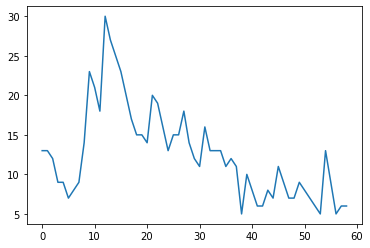

In [195]:
plt.plot(top_playlist["count"])

In [196]:
top_playlist["playlist_appearance"] = 1
top_playlist.groupby(["artist_name","track_name"]).sum().sort_values("playlist_appearance",ascending=False).head(20)

count  \
artist_name            track_name                                     
A Boogie Wit da Hoodie Drowning (feat. Kodak Black)              20   
Rihanna                Work                                       8   
Lil Uzi Vert           XO TOUR Llif3                             23   
Lorde                  Royals                                     5   
MAGIC!                 Rude                                       6   
Major Lazer            Cold Water (feat. Justin Bieber & MØ)     13   
Migos                  Bad and Boujee (feat. Lil Uzi Vert)       14   
                       Slippery (feat. Gucci Mane)               15   
                       T-Shirt                                   25   
Miley Cyrus            We Can't Stop                              8   
Post Malone            Congratulations                           30   
                       White Iverson                             12   
Rae Sremmurd           Black Beatles                             18   
                       Come Get Her                              13   
Rob $tone              Chill Bill                                15   
Kodak Black            Tunnel Vision                             15   
Sam Smith              Stay With Me                              13   
Shawn Mendes           Stitches                                  11   
The Chainsmokers       Closer                                    13   
                       Don't Let Me Down                          9   

                                                              artist_rep_interval  \
artist_name            track_name                                                   
A Boogie Wit da Hoodie Drowning (feat. Kodak Black)                             0   
Rihanna                Work                                                     0   
Lil Uzi Vert           XO TOUR Llif3                                            0   
Lorde                  Royals                                                   0   
MAGIC!                 Rude                                                     0   
Major Lazer            Cold Water (feat. Justin Bieber & MØ)                    0   
Migos                  Bad and Boujee (feat. Lil Uzi Vert)                      0   
                       Slippery (feat. Gucci Mane)                              0   
                       T-Shirt                                                  0   
Miley Cyrus            We Can't Stop                                            0   
Post Malone            Congratulations                                          0   
                       White Iverson                                            0   
Rae Sremmurd           Black Beatles                                            0   
                       Come Get Her                                             0   
Rob $tone              Chill Bill                                               0   
Kodak Black            Tunnel Vision                                            0   
Sam Smith              Stay With Me                                             0   
Shawn Mendes           Stitches                                                 0   
The Chainsmokers       Closer                                                   0   
                       Don't Let Me Down                                        0   

                                                              song_rep_interval  \
artist_name            track_name                                                 
A Boogie Wit da Hoodie Drowning (feat. Kodak Black)                         100   
Rihanna                Work                                                 100   
Lil Uzi Vert           XO TOUR Llif3                                        100   
Lorde                  Royals                                               100   
MAGIC!                 Rude                                                 100   
Major Lazer            Cold Water (feat. Justin

In [197]:
top_playlist.head(50)

,track_uri,artist_uri,artist_name,track_name,count,artist_rep_interval,song_rep_interval,playlist_appearance
0,spotify:track:6DNtNfH8hXkqOX1sjqmI7p,spotify:artist:738wLrAtLtCtFOLvQBXOXp,Major Lazer,Cold Water (feat. Justin Bieber & MØ),13,0,100,1
1,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,spotify:artist:69GGBxA162lTqCwzJG5jLp,The Chainsmokers,Closer,13,0,100,1
2,spotify:track:6WhzFzROw3aq3rPWjgYlxr,spotify:artist:4u5smJBskI6Adzv08PuiUP,Kiiara,Gold,12,0,100,1
3,spotify:track:0QsvXIfqM0zZoerQfsI9lm,spotify:artist:69GGBxA162lTqCwzJG5jLp,The Chainsmokers,Don't Let Me Down,9,0,100,1
4,spotify:track:2Z8WuEywRWYTKe1NybPQEW,spotify:artist:3YQKmKGau1PzlVlkL1iodx,Twenty One Pilots,Ride,9,0,100,1
5,spotify:track:4OZEu0Vwq0RB2LAq14v99n,spotify:artist:540vIaP2JwjQb9dm3aArA4,DJ Snake,Middle,7,0,100,1
6,spotify:track:14WWzenpaEgQZlqPq2nk4v,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Rihanna,Work,8,0,100,1
7,spotify:track:1xznGGDReH1oQq0xzbwXa3,spotify:artist:3TVXtAsR1Inumwj472S9r4,Drake,One Dance,9,0,100,1
8,spotify:track:7yyRTcZmCiyzzJlNzGC9Ol,spotify:artist:5M0lbkGluOPXLeFjApw8r8,DRAM,Broccoli (feat. Lil Yachty),14,0,100,1
9,spotify:track:5hTpBe8h35rJ67eAWHQsJx,spotify:artist:3Gm5F95VdRxW3mqCn8RPBJ,Aminé,Caroline,23,0,100,1


In [198]:
r.groupby(["artist_name","track_name"]).sum().reset_index().sort_values("count",ascending=False).head(50)[["artist_name","track_name","count"]]

,artist_name,track_name,count
40,Post Malone,Congratulations,30
16,Future,Mask Off,27
38,Migos,T-Shirt,25
3,Aminé,Caroline,23
32,Lil Uzi Vert,XO TOUR Llif3,23
10,Drake,Fake Love,21
0,A Boogie Wit da Hoodie,Drowning (feat. Kodak Black),20
4,Big Sean,Bounce Back,20
26,KYLE,iSpy (feat. Lil Yachty),19
42,Rae Sremmurd,Black Beatles,18


In [65]:
spotify.connect()
report = spotify.retrieve("created_lists")
spotify.disconnect()

In [32]:
report["new_id"] = [str(x)[:10] for x in report["_id"].unique()]

In [66]:
report.groupby(["seed_song","follower_based"]).mean().sort_values("playlist_size",ascending=False).head(20)

,,count,playlist_size
seed_song,follower_based,,
Congratulations_by_Post Malone,True,3.311676,210.000000
HUMBLE._by_Kendrick Lamar,True,3.318479,210.000000
I - Street Album Version_by_Petey Pablo,False,8.414062,192.000000
Congratulations_by_Post Malone,False,10.145161,124.000000
HUMBLE._by_Kendrick Lamar,False,10.153226,124.000000
Sorry Not Sorry_by_Bryson Tiller,False,10.099462,124.000000
Broccoli (feat. Lil Yachty)_by_DRAM,False,10.396552,116.000000
Brother_by_July Talk,False,10.286885,110.590164
Broccoli (feat. Lil Yachty)_by_DRAM,True,2.442854,101.000000
